# Vorstellung des Datensatzes:

Der Datensatz haben wir von Kaggle heruntergeladen. Die Daten für den Human Development Index stammen aus UNDP (2018), die Daten für das jährliche BIP (ggf. pro Kopf) stammen aus der Weltbank (World Bank World Development Indicators, 2018) und die Daten für die Suizidraten stammen aus "Suicide in the Twenty-First Century" von Szamil (2017) sowie aus der WHO ("Suicide prevention", 2018). Der CSV-Datensatz ist in Long Format und beschreibt die Entwicklung der Suizidraten nach Altersgruppen, Generationen und Geschlechtern für verschiedene Länder in dem Zeitraum 1985 bis 2016. Gleichzeitig haben wir in benachbarten Spalten Daten zum BIP, zum Pro-Kopf-BIP (jeweils in gegenwärtigen US-Dollar) und zum HDI, was Rahmen für interessante Analyse anbietet. Damit wir uns mit dem Datensatz vertraut machen, lesen wir ihn mit Hilfe von Pandas in Python ein:

In [1]:
# Alle notwendige Bibliotheken Laden
import pandas as pd #wir importieren erstmal pandas (mit Abkürzung "pd"), um die Funktionen der Bibliothek anwenden zu können
import numpy as np
import matplotlib.pyplot as plt #importiert die Bibliothek mit Kürzel "plt"

%matplotlib inline 

In [2]:
suizid_file = "daten/master.csv"
suizid_daten=pd.read_csv(suizid_file)
suizid_daten.head(14)

country  year     sex          age  suicides_no  population  \
0   Albania  1987    male  15-24 years           21      312900   
1   Albania  1987    male  35-54 years           16      308000   
2   Albania  1987  female  15-24 years           14      289700   
3   Albania  1987    male    75+ years            1       21800   
4   Albania  1987    male  25-34 years            9      274300   
5   Albania  1987  female    75+ years            1       35600   
6   Albania  1987  female  35-54 years            6      278800   
7   Albania  1987  female  25-34 years            4      257200   
8   Albania  1987    male  55-74 years            1      137500   
9   Albania  1987  female   5-14 years            0      311000   
10  Albania  1987  female  55-74 years            0      144600   
11  Albania  1987    male   5-14 years            0      338200   
12  Albania  1988  female    75+ years            2       36400   
13  Albania  1988    male  15-24 years           17      319200   

    suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0                6.71  Albania1987           NaN      2,156,624,900   
1                5.19  Albania1987           NaN      2,156,624,900   
2                4.83  Albania1987           NaN      2,156,624,900   
3                4.59  Albania1987           NaN      2,156,624,900   
4                3.28  Albania1987           NaN      2,156,624,900   
5                2.81  Albania1987           NaN      2,156,624,900   
6                2.15  Albania1987           NaN      2,156,624,900   
7                1.56  Albania1987           NaN      2,156,624,900   
8                0.73  Albania1987           NaN      2,156,624,900   
9                0.00  Albania1987           NaN      2,156,624,900   
10               0.00  Albania1987           NaN      2,156,624,900   
11               0.00  Albania1987           NaN      2,156,624,900   
12               5.49  Albania1988           NaN      2,126,000,000   
13               5.33  Albania1988           NaN      2,126,000,000   

    gdp_per_capita ($)       generation  
0                  796     Generation X  
1                  796           Silent  
2                  796     Generation X  
3                  796  G.I. Generation  
4                  796          Boomers  
5                  796  G.I. Generation  
6                  796           Silent  
7                  796          Boomers  
8                  796  G.I. Generation  
9                  796     Generation X  
10                 796  G.I. Generation  
11                 796     Generation X  
12                 769  G.I. Generation  
13                 769     Generation X

In [3]:
# Liste aller unterschiedlichen Altersgruppen
alters_gruppen = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
print(alters_gruppen)

['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']


Wir sehen, dass wir pro Jahr für jedes Land Daten zu 6 verschiedenen Altersgruppen (jeweils nach Geschlecht) haben.

# Verteilung der Suzidenraten nach Altersgruppen & Geschlecht

In [130]:
# erstelle Klassen Namen für Suizidraten
suizid_raten_klassen = ["{} – {}".format(start, start + 5) for start in np.arange(0, 50, 5)]

In [131]:
def suizidraten_haufigkeit(sex):
    suizidraten_haufigkeit = pd.DataFrame()
    for alters_gruppe in alters_gruppen:
        suizidraten_haufigkeit[alters_gruppe] = np.histogram([suizid_daten.query('age==@alters_gruppe & sex==@sex')["suicides/100k pop"]], bins=10, range=[0, 50])[0]

    # Damit die Spalten Names umbennant werden
    suizidraten_haufigkeit.rename(index={index: value for index, value in enumerate(suizid_raten_klassen)}, inplace=True)
    return suizidraten_haufigkeit


In [134]:
from matplotlib.ticker import PercentFormatter
def suizid_raten_haufigkeit_visualisieren(sex, title_beschriftung, datei_name, alters_gruppen):
    names = suizid_raten_klassen
    df = suizidraten_haufigkeit(sex)

    # Prozent berechnen
    for i in df.index:
        df.loc[i]=df.loc[i]*100/sum(df.loc[i])

    # Hilfe Variablen zum Plotten
    r=range(len(names))
    btm=df.iloc[:,0]-df.iloc[:,0]

    stack_order= alters_gruppen
    colors = ['#FF3380', '#CCCC00', '#66E64D', '#4D80CC', '#9900B3', '#E64D66']

    plt.figure(figsize=(16,10))
    # Wenn die ursprüngliche Spaltenreihenfolge in Ordnung ist, ersetzen Sie einfach "stack_order" durch "df".
    for i,j in zip(stack_order,colors): 
        plt.bar(r,df[i],bottom=btm,color=j,label=i.replace("years", "Jahre"))
        btm=btm+df[i]


    plt.xticks(r, names, fontsize=15)
    # Prozent Format für y Achse
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.yticks(fontsize=15)
    plt.xlabel("Suizide pro 100.000 Einwohner", fontsize=20, labelpad=20)
    plt.ylabel("Häufigkeit", fontsize=20, labelpad=20)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", fontsize=15, borderaxespad=0)
    plt.title(title_beschriftung, pad=70, fontsize=20)
    plt.tight_layout()
    plt.savefig(datei_name, dpi=96)
    plt.show() 

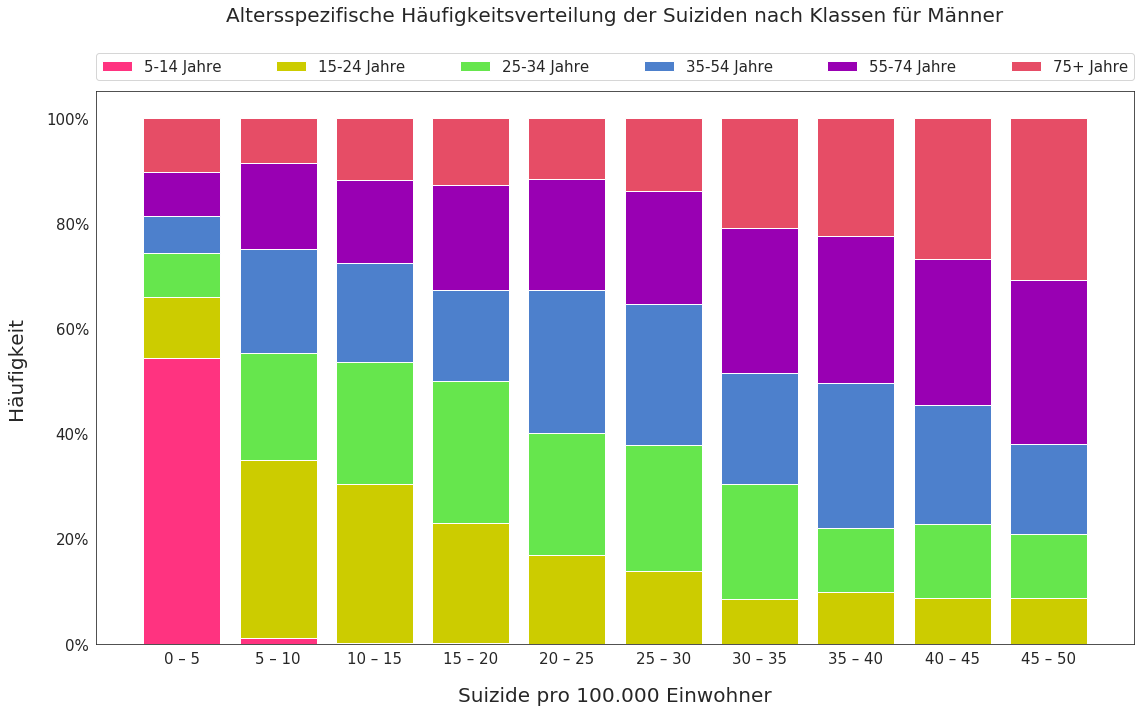

In [135]:
suizid_raten_haufigkeit_visualisieren("male", "Altersspezifische Häufigkeitsverteilung der Suiziden nach Klassen für Männer", "images/maenner-suizidraten-in-altersgruppen", alters_gruppen)


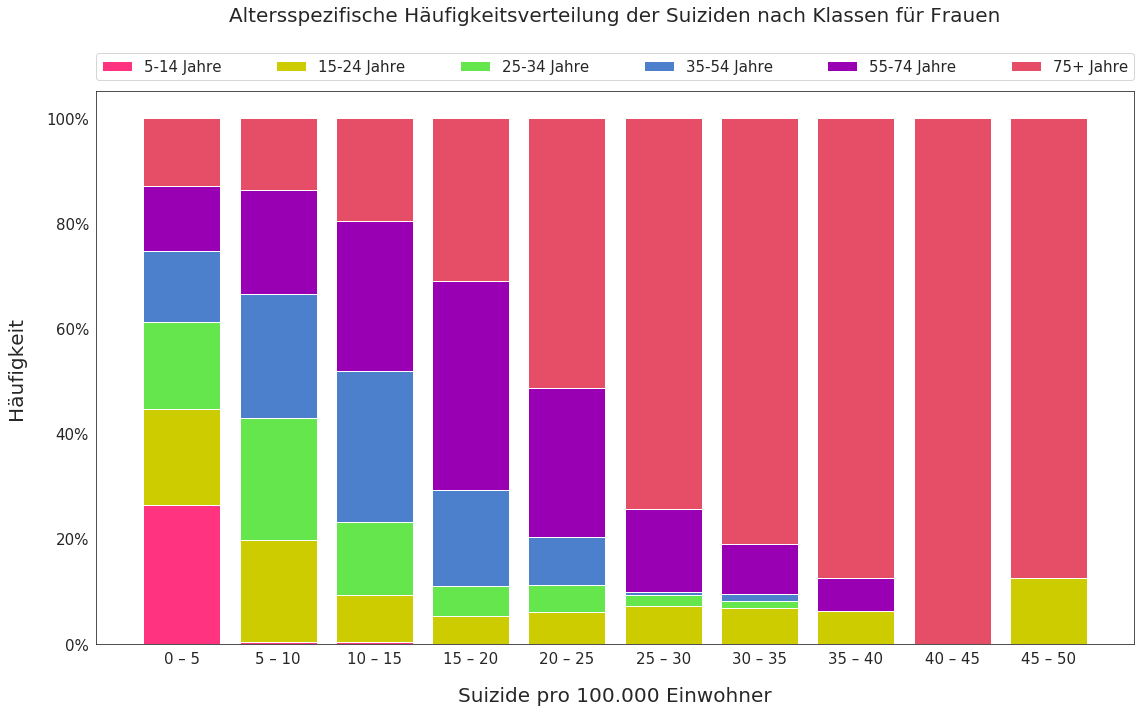

In [136]:
suizid_raten_haufigkeit_visualisieren("female", "Altersspezifische Häufigkeitsverteilung der Suiziden nach Klassen für Frauen", "images/frauen-suizidraten-in-altersgruppen", alters_gruppen)


# Visualisierung der Welt

Wir wollen uns die Suiziden in der ganzen Welt auf einer Weltkarte visualisieren. Dazu brauchen wir Geodaten, und zwar ein shapefile mit Weltkoordinaten. Die Geodaten haben wir uns aus Natural Earth (https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/) beschafft (Version 4.1.0).

Wir wollen für jedes Land pro Jahr einen Wert haben. Je nachdem, wie groß dieser Wert ist, wollen wir die Fläche des Landes auf der Weltkarte entsprechend einfärben. Also wollen wir unser DataFrame erstmal so manipulieren, dass wir die Differenzierung nach Geschlechtern und Altersgruppen ausblenden. Wir könnten bspw. das "geschlechtsaggregierende" DataFrame suizid_alle nehmen und die Durchschnittswerte über alle Altersgruppen ausrechnen, mit denen wir dann auf der Weltkarte arbeiten werden. Der Wert, mit dem wir arbeiten werden, ist die Anzahl der Suiziden pro 100.000 Einwohner.

In [9]:
mann_filter = suizid_daten["sex"] == "male" 
suizid_mann = suizid_daten[mann_filter] #dieses DataFrame enthält nur Männer
frau_filter = suizid_daten["sex"] == "female"
suizid_frau = suizid_daten[frau_filter] #dieses DataFrame enthält nur Frauen
suizid_mann = suizid_mann.sort_values(["age","country"]) #sortieren 
suizid_frau = suizid_frau.sort_values(["age", "country"]) #beide DataFrames sind gleich sortiert. Das wird sehr wichtig sein
suizid_mann.reset_index(inplace = True)
suizid_frau.reset_index(inplace = True)
list(suizid_daten.columns.values) #anzeigen der Spaltennamen
suizid_alle = pd.DataFrame(columns = ["country", "year", "sex", "age", "suicides_no", "population", "suicides/100k pop",
"country-year",  "HDI for year", " gdp_for_year ($) ", "gdp_per_capita ($)", "generation"])
suizid_alle = suizid_mann[["country", "year", "age", "country-year", "HDI for year", " gdp_for_year ($) ", \
                           "gdp_per_capita ($)", "generation"]].copy()
suizid_alle["population"] = suizid_mann["population"] + suizid_frau["population"]
suizid_alle["suicides_no"] = suizid_mann["suicides_no"] + suizid_frau["suicides_no"]
suizid_alle["suicides/100k pop"] = suizid_alle["suicides_no"] / suizid_alle["population"]
suizid_alle["suicides/100k pop"] = suizid_alle["suicides/100k pop"] * 100000
#suizid_alle["suicides/100k pop"] = suizid_mann["suicides/100k pop"] + suizid_frau["suicides/100k pop"]

suizid_alle.head()

country  year          age country-year  HDI for year  gdp_for_year ($)   \
0  Albania  1987  15-24 years  Albania1987           NaN      2,156,624,900   
1  Albania  1988  15-24 years  Albania1988           NaN      2,126,000,000   
2  Albania  1989  15-24 years  Albania1989           NaN      2,335,124,988   
3  Albania  1992  15-24 years  Albania1992           NaN        709,452,584   
4  Albania  1993  15-24 years  Albania1993           NaN      1,228,071,038   

   gdp_per_capita ($)    generation  population  suicides_no  \
0                 796  Generation X      602600           35   
1                 769  Generation X      614800           25   
2                 833  Generation X      623400           17   
3                 251  Generation X      556100           16   
4                 437  Generation X      528600           28   

   suicides/100k pop  
0           5.808165  
1           4.066363  
2           2.726981  
3           2.877180  
4           5.297011

In [10]:
suizid_alle["age"].unique() #Ausgabe aller einzigartigen Werte für "age" (Altersgruppe)

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [11]:
filter_15_24 = suizid_alle["age"] == "15-24 years" 
suizid_15_24 = suizid_alle[filter_15_24] 
filter_15_24 = suizid_alle["age"] == "15-24 years" 
suizid_15_24 = suizid_alle[filter_15_24] 
suizid_15_24 = suizid_15_24.sort_values(["country", "year"])
suizid_15_24.reset_index(inplace = True)

filter_25_34 = suizid_alle["age"] == "25-34 years" 
suizid_25_34 = suizid_alle[filter_15_24] 
filter_25_34 = suizid_alle["age"] == "25-34 years" 
suizid_25_34 = suizid_alle[filter_25_34] 
suizid_25_34 = suizid_25_34.sort_values(["country", "year"])
suizid_25_34.reset_index(inplace = True)

filter_35_54 = suizid_alle["age"] == "35-54 years" 
suizid_35_54 = suizid_alle[filter_35_54] 
filter_35_54 = suizid_alle["age"] == "35-54 years" 
suizid_35_54 = suizid_alle[filter_35_54]
suizid_35_54 = suizid_35_54.sort_values(["country", "year"])
suizid_35_54.reset_index(inplace = True)

filter_5_14 = suizid_alle["age"] == "5-14 years" 
suizid_5_14 = suizid_alle[filter_5_14] 
filter_5_14 = suizid_alle["age"] == "5-14 years" 
suizid_5_14 = suizid_alle[filter_5_14] 
suizid_5_14 = suizid_5_14.sort_values(["country", "year"])
suizid_5_14.reset_index(inplace = True)

filter_55_74 = suizid_alle["age"] == "55-74 years" 
suizid_55_74 = suizid_alle[filter_55_74] 
filter_55_74 = suizid_alle["age"] == "55-74 years" 
suizid_55_74 = suizid_alle[filter_55_74] 
suizid_55_74 = suizid_55_74.sort_values(["country", "year"])
suizid_55_74.reset_index(inplace = True)

filter_75_more = suizid_alle["age"] == "75+ years" 
suizid_75_more = suizid_alle[filter_75_more] 
filter_75_more = suizid_alle["age"] == "75+ years" 
suizid_75_more = suizid_alle[filter_75_more] 
suizid_75_more = suizid_75_more.sort_values(["country", "year"])
suizid_75_more.reset_index(inplace = True)


suizid_welt = pd.DataFrame(columns = ["country", "year", "suicides_no", "population", "suicides/100k pop",
    "country-year",  "HDI for year", " gdp_for_year ($) ", "gdp_per_capita ($)"])

suizid_welt = suizid_alle[["country", "year", "country-year", "HDI for year", " gdp_for_year ($) ", \
                           "gdp_per_capita ($)"]].copy()

suizid_welt["population"] = suizid_15_24["population"] + suizid_25_34["population"] + suizid_35_54["population"] + \
suizid_5_14["population"] + suizid_55_74["population"] + suizid_75_more["population"]

suizid_welt["suicides_no"] = suizid_15_24["suicides_no"] + suizid_25_34["suicides_no"] + suizid_35_54["suicides_no"] + \
suizid_5_14["suicides_no"] + suizid_55_74["suicides_no"] + suizid_75_more["suicides_no"]

suizid_welt["suicides/100k pop"] = suizid_welt["suicides_no"]/suizid_welt["population"]
suizid_welt["suicides/100k pop"] = suizid_welt["suicides/100k pop"] * 100000

suizid_welt.head() 

country  year country-year  HDI for year  gdp_for_year ($)   \
0  Albania  1987  Albania1987           NaN      2,156,624,900   
1  Albania  1988  Albania1988           NaN      2,126,000,000   
2  Albania  1989  Albania1989           NaN      2,335,124,988   
3  Albania  1992  Albania1992           NaN        709,452,584   
4  Albania  1993  Albania1993           NaN      1,228,071,038   

   gdp_per_capita ($)  population  suicides_no  suicides/100k pop  
0                 796   2709600.0         73.0           2.694125  
1                 769   2764300.0         63.0           2.279058  
2                 833   2803100.0         68.0           2.425886  
3                 251   2822500.0         47.0           1.665190  
4                 437   2807300.0         73.0           2.600363

Nun haben wir für jedes Land pro Jahr jeweils eine einzige Größe, die die Suiziden widerspiegelt. 

In [12]:
import sys #Damit können wir überprüfen, ob bestimmte Packages/Bibliotheken bei uns vorhanden sind
'geopandas' in sys.modules #wir prüfen, ob die Bibliothek geopandas vorhanden ist
!pip install geopandas #sie ist nicht vorhanden, deshalb installieren wir sie mittels pip
import geopandas as gpd #für die Visualisierung mittels Weltskarte werden wir die Bibliothek geopandas benutzen
shapefile = 'daten/ne_10m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']] #shapefile mittels geopandas einlesen
gdf.columns = ['country', 'country_code', 'geometry'] #Spalten umbenennen
gdf.head()

  Using cached https://files.pythonhosted.org/packages/21/80/da2a33c9201cd4ce693f4aa6189efc9ef1a48bec1c3b02c3ce9908b07fec/geopandas-0.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/89/4a/193cd6a75e51062c85f4e1cd6f312b3bbda6e26ba7510f152ef5016f0b16/Fiona-1.8.6-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/16/59/43869adef45ce4f1cf7d5c3aef1ea5d65d449050abdda5de7a2465c5729d/pyproj-2.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/38/b6/b53f19062afd49bb5abd049aeed36f13bf8d57ef8f3fa07a5203531a0252/Shapely-1.6.4.post2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e9/da/824b92d9942f4e472702488857914bdd50f73021efea15b4cad9aca8ecef/click_plugins-1.1.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e4/be/30a58b4b0733850280d01f8bd132591b4668ed5c7046761098d665ac2174/cligj-0.5.0-py3-none-any.whl
You are using pip

country country_code                                           geometry
0  Indonesia          IDN  (POLYGON ((117.7036079039552 4.163414542001791...
1   Malaysia          MYS  (POLYGON ((117.7036079039552 4.163414542001791...
2      Chile          CHL  (POLYGON ((-69.51008875199994 -17.506588197999...
3    Bolivia          BOL  POLYGON ((-69.51008875199994 -17.5065881979999...
4       Peru          PER  (POLYGON ((-69.51008875199994 -17.506588197999...

In [13]:
print(gdf[gdf['country'] == 'Antarctica'])
#Die Zeile für 'Antarctica' entfernen wir, weil wir sie nicht brauchen
gdf = gdf.drop(gdf.index[159])

        country country_code  \
172  Antarctica          ATA   

                                              geometry  
172  (POLYGON ((-51.73064133499992 -82.062556536999...  


Erstmal wollen wir eine Weltkarte erstellen, die die Lage für das Jahr 2010 anzeigt. Dafür müssen wir die Daten nach dem Jahr 2010 filtern und anschließend den Geodaten hinzufügen. Da wir mittels Ländernamen die beiten DataFrames zusammenfügen wollen, sollen wir erstmal sicherstellen, ob gleiche Länder in beiden DataFrames gleich benannt sind. Dazu rufen wir die einzigartigen Werte der Ländernamen aus beiden DataFrames auf:

In [14]:
suizid_daten["country"].nunique() #im ursprünglichen Datensatz gibt es 101 Lönder

101

In [15]:
gdf = gdf.sort_values(["country"]) #wir sorteren erstmal nach Ländernamen zum besseren Überblick
gdf["country"].nunique() #in den Geodaten gibt es 254 Länder bzw. Territorien, die teilweise unterschiedlich benannt sind

254

In [16]:
land_gdf = gdf["country"].unique() #Angabe aller einzigartiger Ländernamen als eine Liste aus den Geodaten
land_suizid = suizid_welt["country"].unique() #Alphabetisch sortieren
land_gdf = sorted(land_gdf) #Angabe aller einzigartigen Ländernamen als eine Liste aus den Geodaten
land_suizid = sorted(land_suizid) #Alphabetisch sortieren
print("GEODATEN:", "\n", land_gdf, "\n", "SUIZIDDATEN:", "\n", land_suizid)
#Umbennennung, sodass gleiche Länder gleich benannt sind
suizid_welt.replace(to_replace = "Bahamas", value = "The Bahamas", inplace = True) 
suizid_welt.replace(to_replace = "Czech Republic", value = "Czechia", inplace = True)
suizid_welt.replace(to_replace = "Republic of Korea", value = "South Korea", inplace = True)
suizid_welt.replace(to_replace = "Serbia", value = "Republic of Serbia", inplace = True)
suizid_welt.replace(to_replace = "Russian Federation", value = "Russia", inplace = True)
suizid_welt.replace(to_replace = "United States", value = "United States of America", inplace = True)

GEODATEN: 
 ['Afghanistan', 'Akrotiri Sovereign Base Area', 'Aland', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Ashmore and Cartier Islands', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bajo Nuevo Bank (Petrel Is.)', 'Bangladesh', 'Barbados', 'Baykonur Cosmodrome', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Clipperton Island', 'Colombia', 'Comoros', 'Cook Islands', 'Coral Sea Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Cyprus No Mans Area', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Dhekelia Sovereign Base Area', 'Djibouti', 'Dominica', 'Domi

In [17]:
weltfilter_2010 = suizid_welt["year"] == 2010 #wir erstellen eine Maske für 2010
suizid_welt_2010 = suizid_welt[weltfilter_2010] #filtern für 2010
#Achtung, suizid_welt_2010 enthält Duplikate!
suizid_welt_2010 = suizid_welt_2010.dropna(subset=["suicides_no"]) #um die fehlenden Zeilen bereinigen
#zusammenfügen der beiden DataFrames durch "country"
#merged_suiziden_2010 = gdf.merge(suizid_welt_2010, left_on = "country", right_on = "country", how = "left")
#merged_suiziden_2010.fillna('No data', inplace = True) 
#fehlende Werte im neuen DataFrame werden mit dem String "No data" ersetzt
#Das machen wir, weil JSON "NaN"-Werte falsch interpretiert
suizid_welt_2010.describe()

year  HDI for year  gdp_per_capita ($)    population   suicides_no  \
count    87.0     83.000000           87.000000  8.700000e+01     87.000000   
mean   2010.0      0.795542        24113.793103  2.276737e+07   2729.137931   
std       0.0      0.085806        22593.886293  3.922617e+07   6484.215525   
min    2010.0      0.611000          991.000000  9.423600e+04      0.000000   
25%    2010.0      0.733500         7436.000000  2.814582e+06    126.500000   
50%    2010.0      0.807000        13874.000000  8.668869e+06    537.000000   
75%    2010.0      0.877000        36507.000000  2.274460e+07   2104.500000   
max    2010.0      0.940000       111328.000000  2.469130e+08  38090.000000   

       suicides/100k pop  
count          87.000000  
mean            9.794564  
std             8.304584  
min             0.000000  
25%             3.506276  
50%             7.645582  
75%            13.135971  
max            37.959257

Probieren, eine Weltkarte mit matplotlib und geopandas zu zeichnen.

  Using cached https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-any.whl
You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


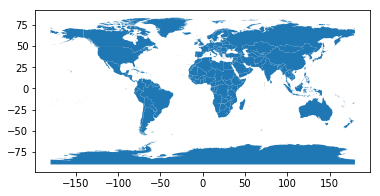

In [18]:
!pip install descartes #diese Bibliothek wird von Python im Hintergrund gebraucht, um die Karte zu plotten
gdf.plot() #Anschauung der Weltkarte

In [19]:
suizid_welt_2010.head()

country  year   country-year  HDI for year  gdp_for_year ($)   \
21     Albania  2010    Albania2010         0.722     11,926,953,259   
74   Argentina  2010  Argentina2010         0.811    423,627,422,092   
98     Armenia  2010    Armenia2010         0.721      9,260,284,938   
117      Aruba  2010      Aruba2010           NaN      2,467,703,911   
143  Australia  2010  Australia2010         0.927  1,144,260,547,873   

     gdp_per_capita ($)  population  suicides_no  suicides/100k pop  
21                 4359   2736025.0         96.0           3.508740  
74                11273  37578454.0       2943.0           7.831615  
98                 3460   2676225.0         73.0           2.727723  
117               25974     94832.0          7.0           7.381475  
143               54887  20853864.0       2425.0          11.628540

In [20]:
# das GeoDataFrame mit dem Suizid-DataFrame zusammenfügen
welt_suizid_2010_merged = gdf.set_index("country").join(suizid_welt_2010.set_index("country"))
welt_suizid_2010_merged.head() #Anschauung des zusammengefügten DataFrames

country_code  \
country                                     
Afghanistan                           AFG   
Akrotiri Sovereign Base Area          WSB   
Aland                                 ALD   
Albania                               ALB   
Algeria                               DZA   

                                                                       geometry  \
country                                                                           
Afghanistan                   POLYGON ((74.54235396300004 37.02166900600012,...   
Akrotiri Sovereign Base Area  POLYGON ((33.01563463629242 34.63442454100009,...   
Aland                         (POLYGON ((20.27759850400008 60.14215729400007...   
Albania                       POLYGON ((20.56714725800009 41.87318166200002,...   
Algeria                       POLYGON ((-4.821613117999902 24.99506459600009...   

                                year country-year  HDI for year  \
country                                                           
Afghanistan                      NaN          NaN           NaN   
Akrotiri Sovereign Base Area     NaN          NaN           NaN   
Aland                            NaN          NaN           NaN   
Albania                       2010.0  Albania2010         0.722   
Algeria                          NaN          NaN           NaN   

                              gdp_for_year ($)   gdp_per_capita ($)  \
country                                                               
Afghanistan                                 NaN                 NaN   
Akrotiri Sovereign Base Area                NaN                 NaN   
Aland                                       NaN                 NaN   
Albania                          11,926,953,259              4359.0   
Algeria                                     NaN                 NaN   

                              population  suicides_no  suicides/100k pop  
country                                                                   
Afghanistan                          NaN          NaN                NaN  
Akrotiri Sovereign Base Area         NaN          NaN                NaN  
Aland                                NaN          NaN                NaN  
Albania                        2736025.0         96.0            3.50874  
Algeria                              NaN          NaN                NaN

/opt/conda/lib/python3.6/site-packages/geopandas/plotting.py:404: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


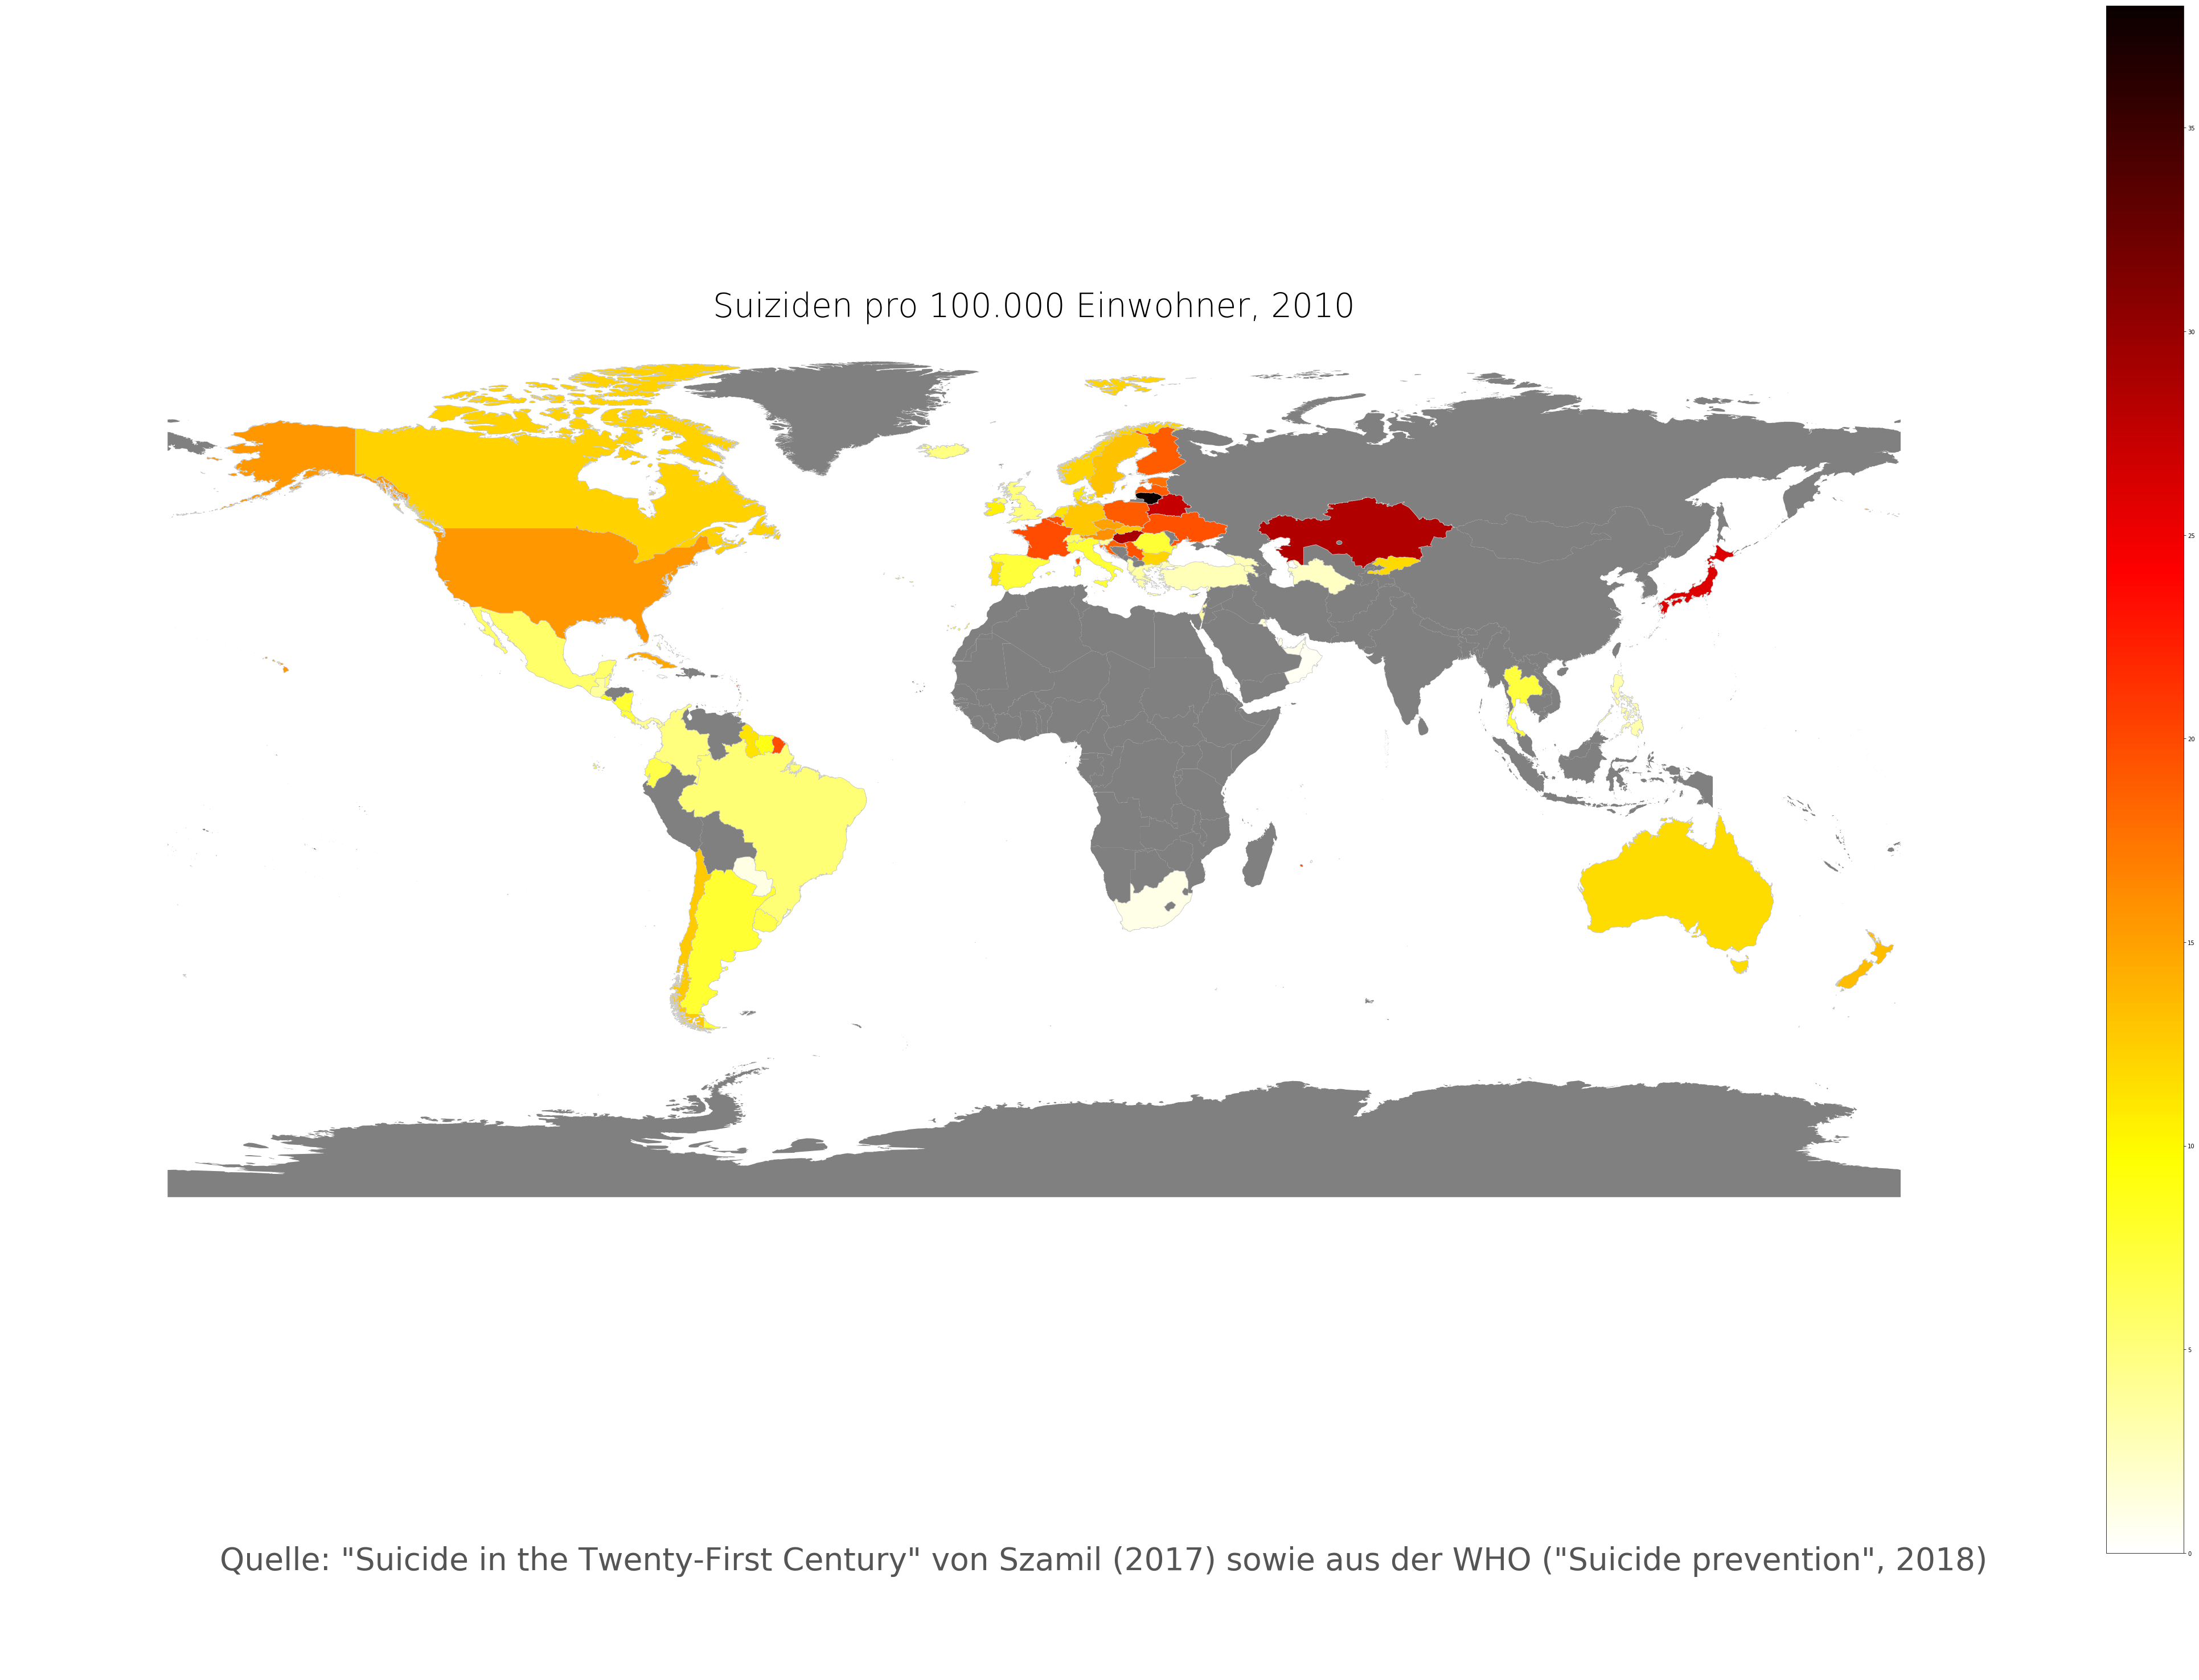

In [21]:
variable = "suicides/100k pop" # zu visualisierende Variable festlegen
fig, ax1  = plt.subplots(1, 1, figsize=(75, 50)) # Arbeitsrahmen für Matplotlib herstellen
ax2 = gdf.plot(1, color="grey", ax = ax1, figsize=(75, 50)) #graue Weltkarte mit der ersten Achse plotten
welt_suizid_2010_merged.dropna().plot(column=variable, cmap= "hot_r", linewidth = 0.8, ax = ax2, edgecolor = "0.8") #Weltkarte erstellen
#die Weltkarte mit den Suiziddaten plotten wir über die graue Weltkarte mit Entfernung der Länder mit fehlenden Werten 
ax2.axis("off") #zur Verfeinerung der Visualisierung entfernen wir die (an dieser Stelle) unbedeutende Achsen
ax2.set_title("Suiziden pro 100.000 Einwohner, 2010", fontdict={'fontsize': '58', 'fontweight' : '3'}) #Titel hinzufügen
#Annotation für die Datenquelle erstellen 
ax2.annotate('Quelle: "Suicide in the Twenty-First Century" von Szamil (2017) sowie aus der WHO ("Suicide prevention", 2018)',xy=(0.1, .08), 
xycoords= "figure fraction", horizontalalignment= "left", verticalalignment = "top", fontsize=55, color = "#555555")
sm = plt.cm.ScalarMappable(cmap = 'hot_r', norm = plt.Normalize(vmin = 0, vmax = 38)) #Colorbar als Legende erstellen
sm._A = [] # leeres array für die Datenbreite erstellen
#Colorbar oberhalb der Weltkarte erstellen mit Angabe der Legende, die wir in der vorherigen Zeile geschrieben haben
cbar = fig.colorbar(sm) 

In [22]:
#fig.savefig("welt_suizid_2010.png", dpi=300) #Ergebnis exportieren und speichern

Für viele Länder haben wir für dieses Jahr viele fehlende Werte. Aber für manche Regionen (Europa, Nord- und Südamerika) haben wir durchaus Daten.
Damit wir in der Zukunft ganz leicht eine globale Visualisierung für ein beliebiges Jahr machen können, ohne den alten Code kompliziert ändern zu müssen, definieren wir an dieser Stelle eine Funktion, die den Prozess beschleunigen und erleichtern soll:

In [23]:
def welt(jahr):
    weltfilter_jahr = suizid_welt["year"] == jahr #wir erstellen eine Maske für das Jahr
    suizid_welt_jahr = suizid_welt[weltfilter_jahr] #filtern für das Jahr
    suizid_welt_jahr = suizid_welt_jahr.dropna(subset=["suicides/100k pop"]) #um die fehlenden Zeilen bereinigen 
    welt_suizid_jahr_merged = gdf.set_index("country").join(suizid_welt_jahr.set_index("country"))
    variable = "suicides/100k pop" # zu visualisierende Variable festlegen
    fig, ax1  = plt.subplots(1, 1, figsize=(75, 50)) # Arbeitsrahmen für Matplotlib herstellen
    ax2 = gdf.plot(1, color="grey", ax = ax1, figsize=(75, 50)) #graue Weltkarte mit der ersten Achse plotten
    welt_suizid_jahr_merged.dropna(subset=["suicides/100k pop"]).plot(column=variable, cmap= "hot_r", linewidth = 0.8, ax = ax2, edgecolor = "0.8") #Weltkarte erstellen
    #die Weltkarte mit den Suiziddaten plotten wir über die graue Weltkarte mit Entfernung der Länder mit fehlenden Werten 
    ax2.axis("off") #zur Verfeinerung der Visualisierung entfernen wir die (an dieser Stelle) unbedeutende Achsen
    ax2.set_title("Suiziden pro 100.000 Einwohner, {}".format(jahr), fontdict={'fontsize': '58', 'fontweight' : '3'}) #Titel hinzufügen
    #Annotation für die Datenquelle erstellen 
    ax2.annotate('Quelle: "Suicide in the Twenty-First Century" von Szamil (2017) sowie aus der WHO ("Suicide prevention", 2018)',xy=(0.1, .08), 
    xycoords= "figure fraction", horizontalalignment= "left", verticalalignment = "top", fontsize=55, color = "#555555")
    sm = plt.cm.ScalarMappable(cmap = 'hot_r', norm = plt.Normalize(vmin = 0, vmax = 38)) #Colorbar als Legende erstellen
    sm._A = [] # leeres array für die Datenbreite erstellen
    #Colorbar oberhalb der Weltkarte erstellen mit Angabe der Legende, die wir in der vorherigen Zeile geschrieben haben
    cbar = fig.colorbar(sm)

/opt/conda/lib/python3.6/site-packages/geopandas/plotting.py:404: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


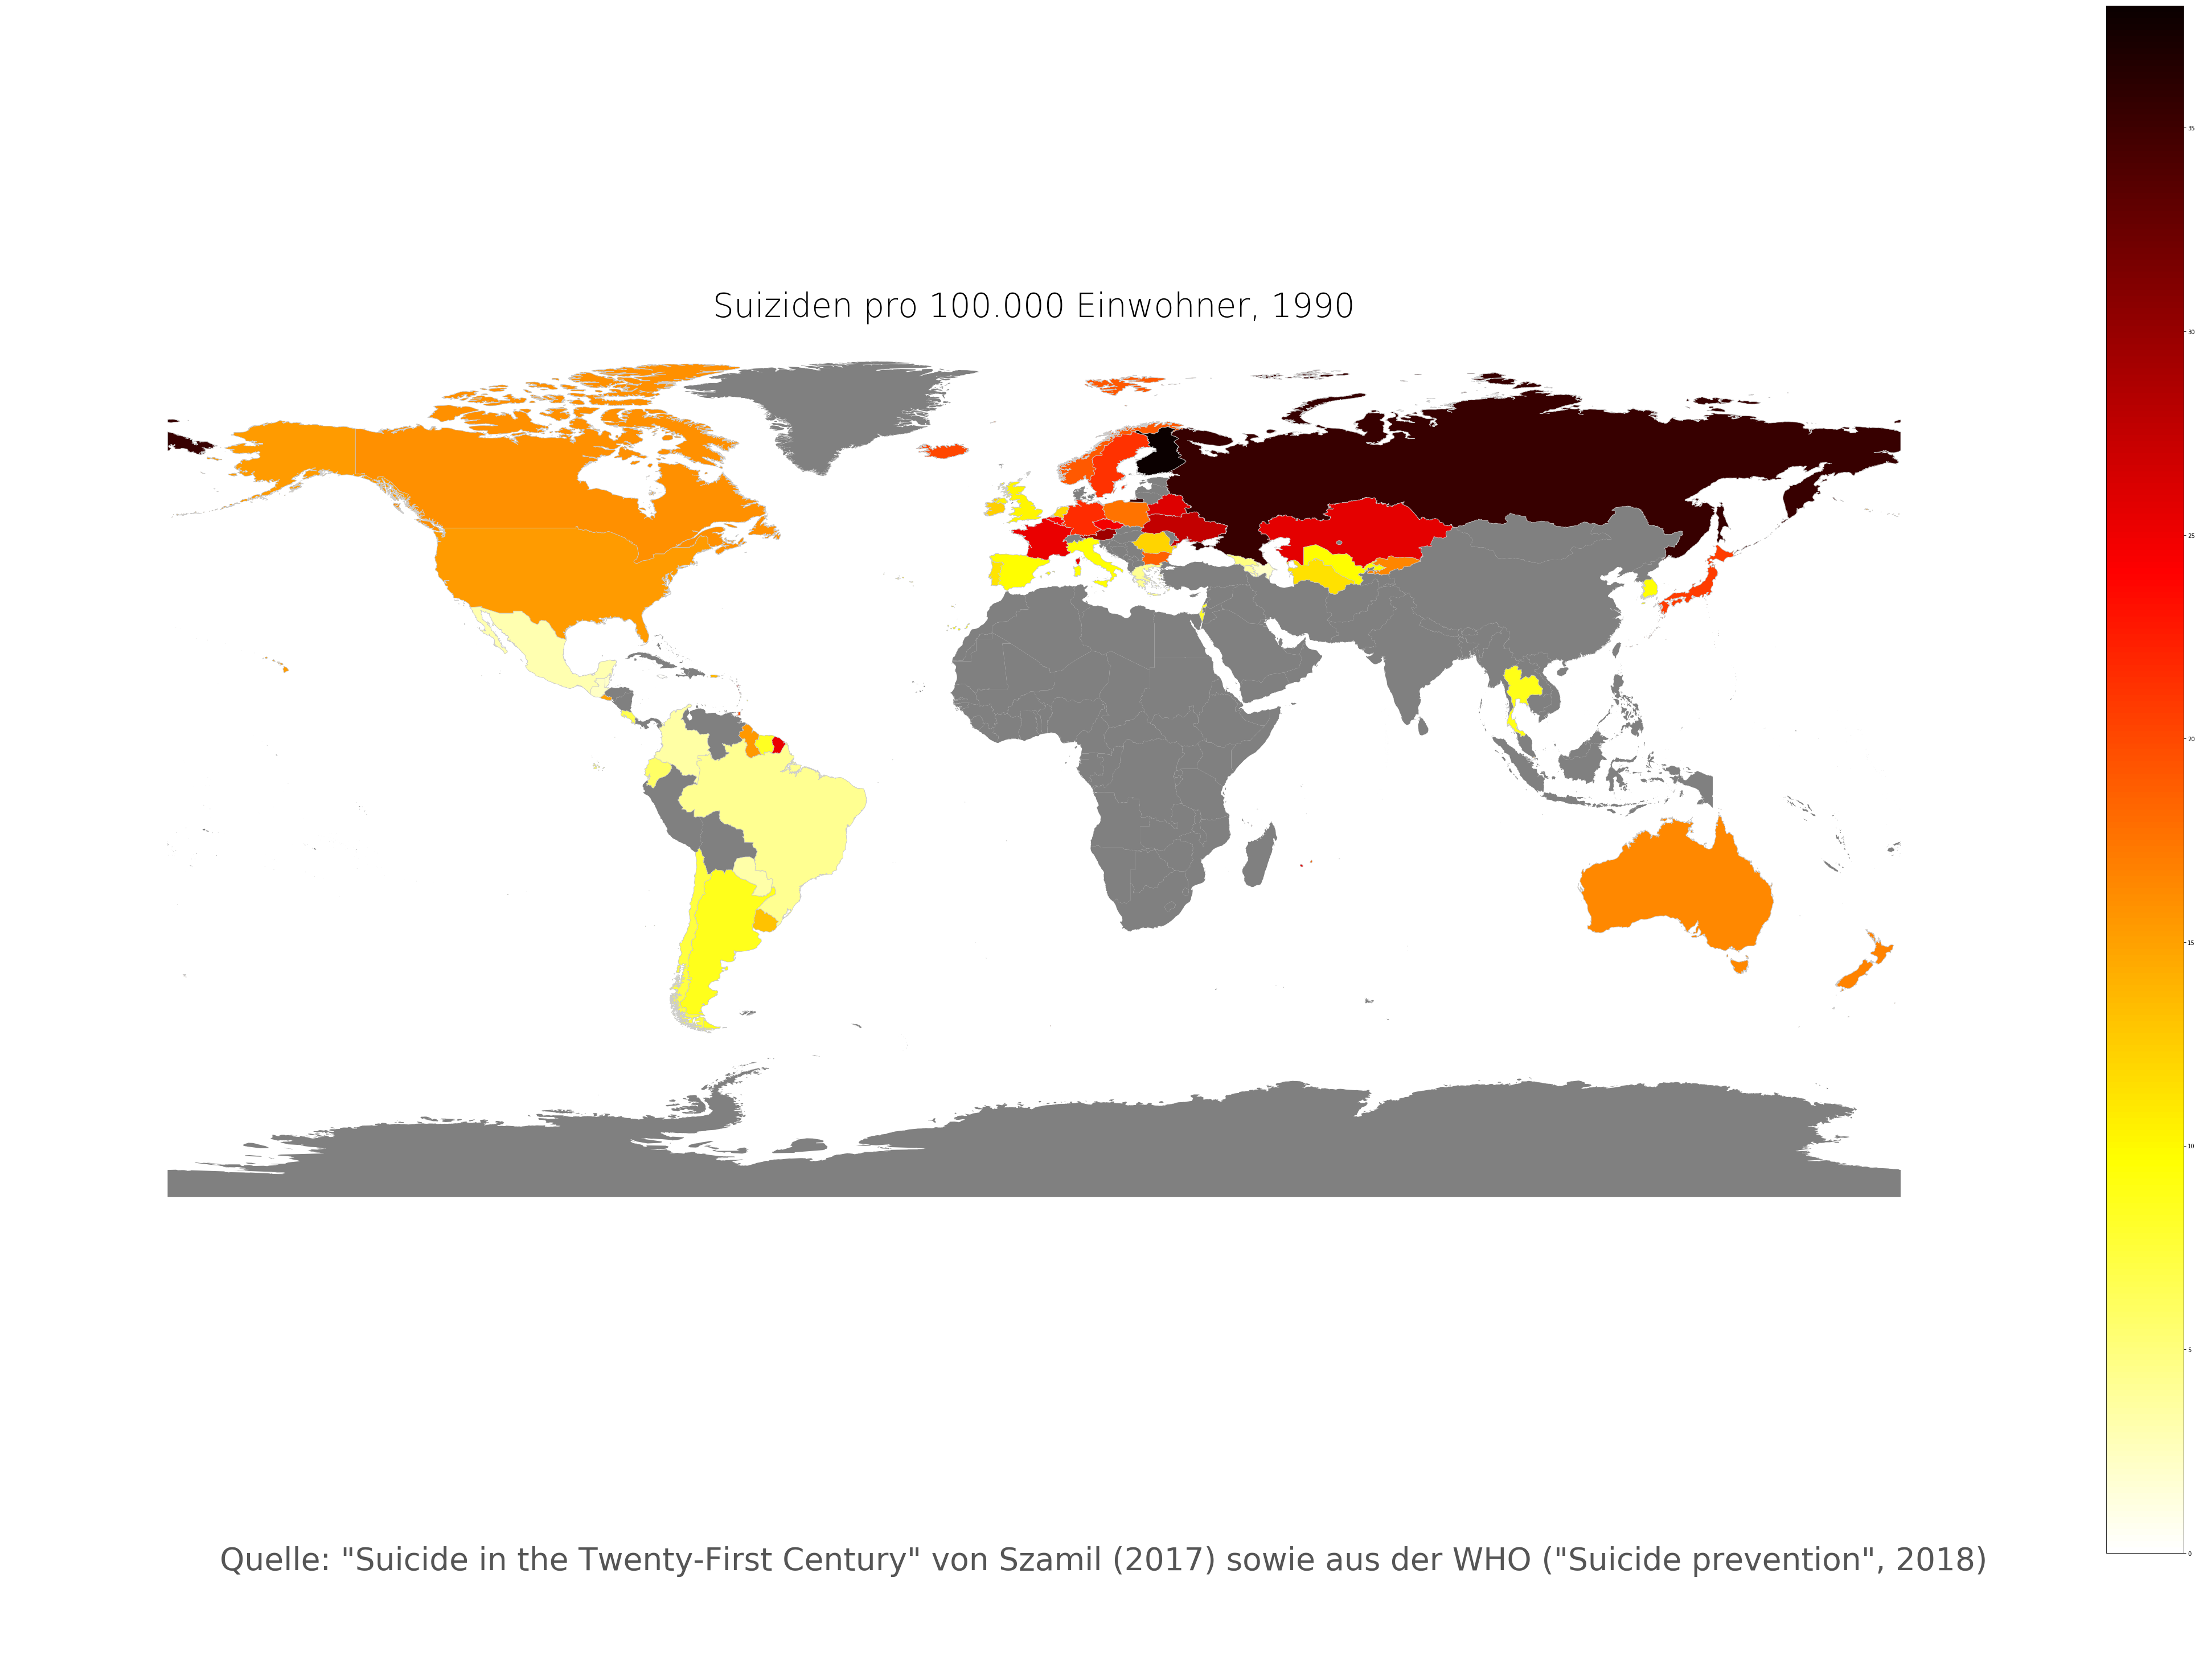

In [24]:
welt(1990)

/opt/conda/lib/python3.6/site-packages/geopandas/plotting.py:404: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


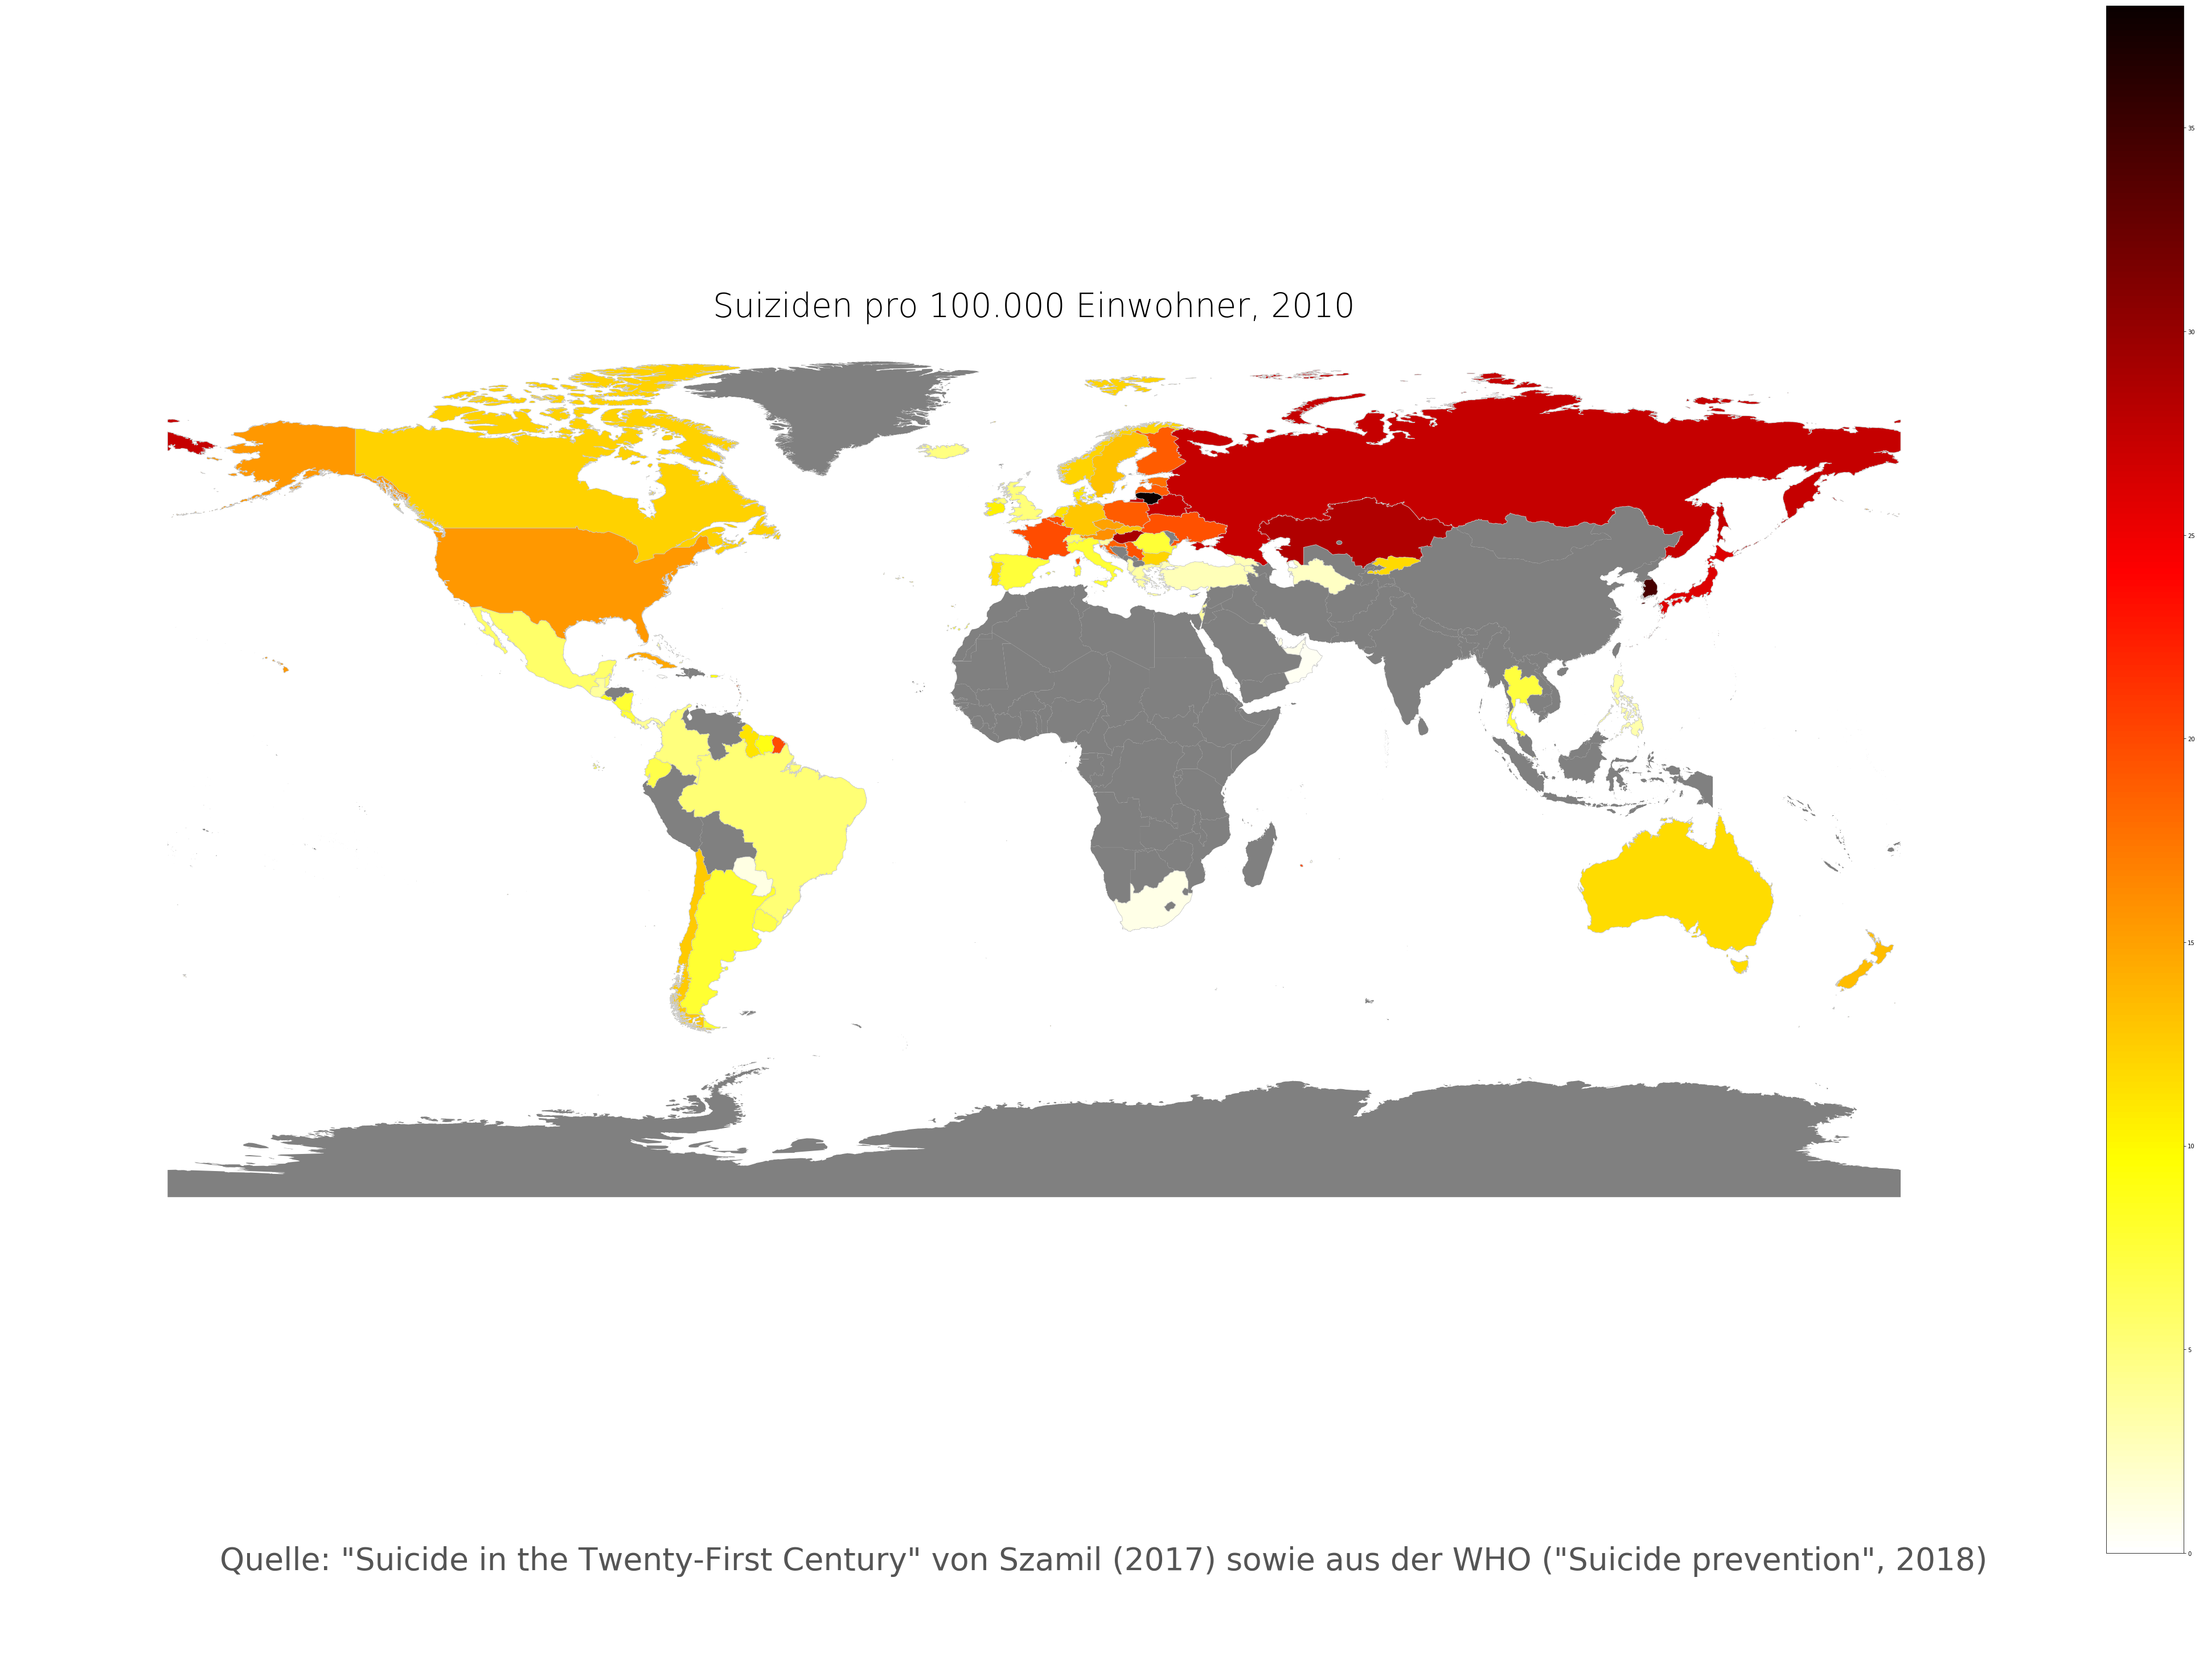

In [25]:
welt(2010)

Für die meisten afrikanischen und asiatischen Länder haben wir leider keine Daten. Aber für fast alle europäische Länder haben wir sie. Es wäre schöner, die Visualisierung für Europa zu machen:

In [26]:
gdf.total_bounds #wiedergibt die Grenzen, die wir später der europäischen Visualisierung entsprechend neu definieren werden

array([-180.        ,  -90.        ,  180.        ,   83.63410065])

In [27]:
def europa(jahr):
    weltfilter_jahr = suizid_welt["year"] == jahr #wir erstellen eine Maske für das Jahr
    suizid_welt_jahr = suizid_welt[weltfilter_jahr] #filtern für das Jahr
    suizid_welt_jahr = suizid_welt_jahr.dropna(subset=["suicides_no"]) #um die fehlenden Zeilen bereinigen
    welt_suizid_jahr_merged = gdf.set_index("country").join(suizid_welt_jahr.set_index("country"))
    variable = "suicides/100k pop" # zu visualisierende Variable festlegen
    fig, ax1  = plt.subplots(1, 1, figsize=(75, 50)) # Arbeitsrahmen für Matplotlib herstellen
    ax2 = gdf.plot(1, color="grey", ax = ax1, figsize=(75, 50)) #graue Weltkarte mit der ersten Achse plotten
    welt_suizid_jahr_merged.dropna().plot(column=variable, cmap= "hot_r", linewidth = 0.8, ax = ax2, edgecolor = "0.8") #Weltkarte erstellen
    #die Weltkarte mit den Suiziddaten plotten wir über die graue Weltkarte mit Entfernung der Länder mit fehlenden Werten 
    #ax2.axis("off") #zur Verfeinerung der Visualisierung entfernen wir die (an dieser Stelle) unbedeutende Achsen
    ax2.set_xlim(-26, 45)
    ax2.set_ylim(34, 73)
    ax2.set_title("Suiziden pro 100.000 Einwohner (Europa), {}".format(jahr), fontdict={'fontsize': '58', 'fontweight' : '3'}) #Titel hinzufügen
    #Annotation für die Datenquelle erstellen 
    ax2.annotate('Quelle: "Suicide in the Twenty-First Century" von Szamil (2017) sowie aus der WHO ("Suicide prevention", 2018)',xy=(0.1, .08), 
    xycoords= "figure fraction", horizontalalignment= "left", verticalalignment = "top", fontsize=55, color = "#555555")
    sm = plt.cm.ScalarMappable(cmap = 'hot_r', norm = plt.Normalize(vmin = 0, vmax = 38)) #Colorbar als Legende erstellen
    sm._A = [] # leeres array für die Datenbreite erstellen
    #Colorbar oberhalb der Weltkarte erstellen mit Angabe der Legende, die wir in der vorherigen Zeile geschrieben haben
    cbar = fig.colorbar(sm)

/opt/conda/lib/python3.6/site-packages/geopandas/plotting.py:404: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


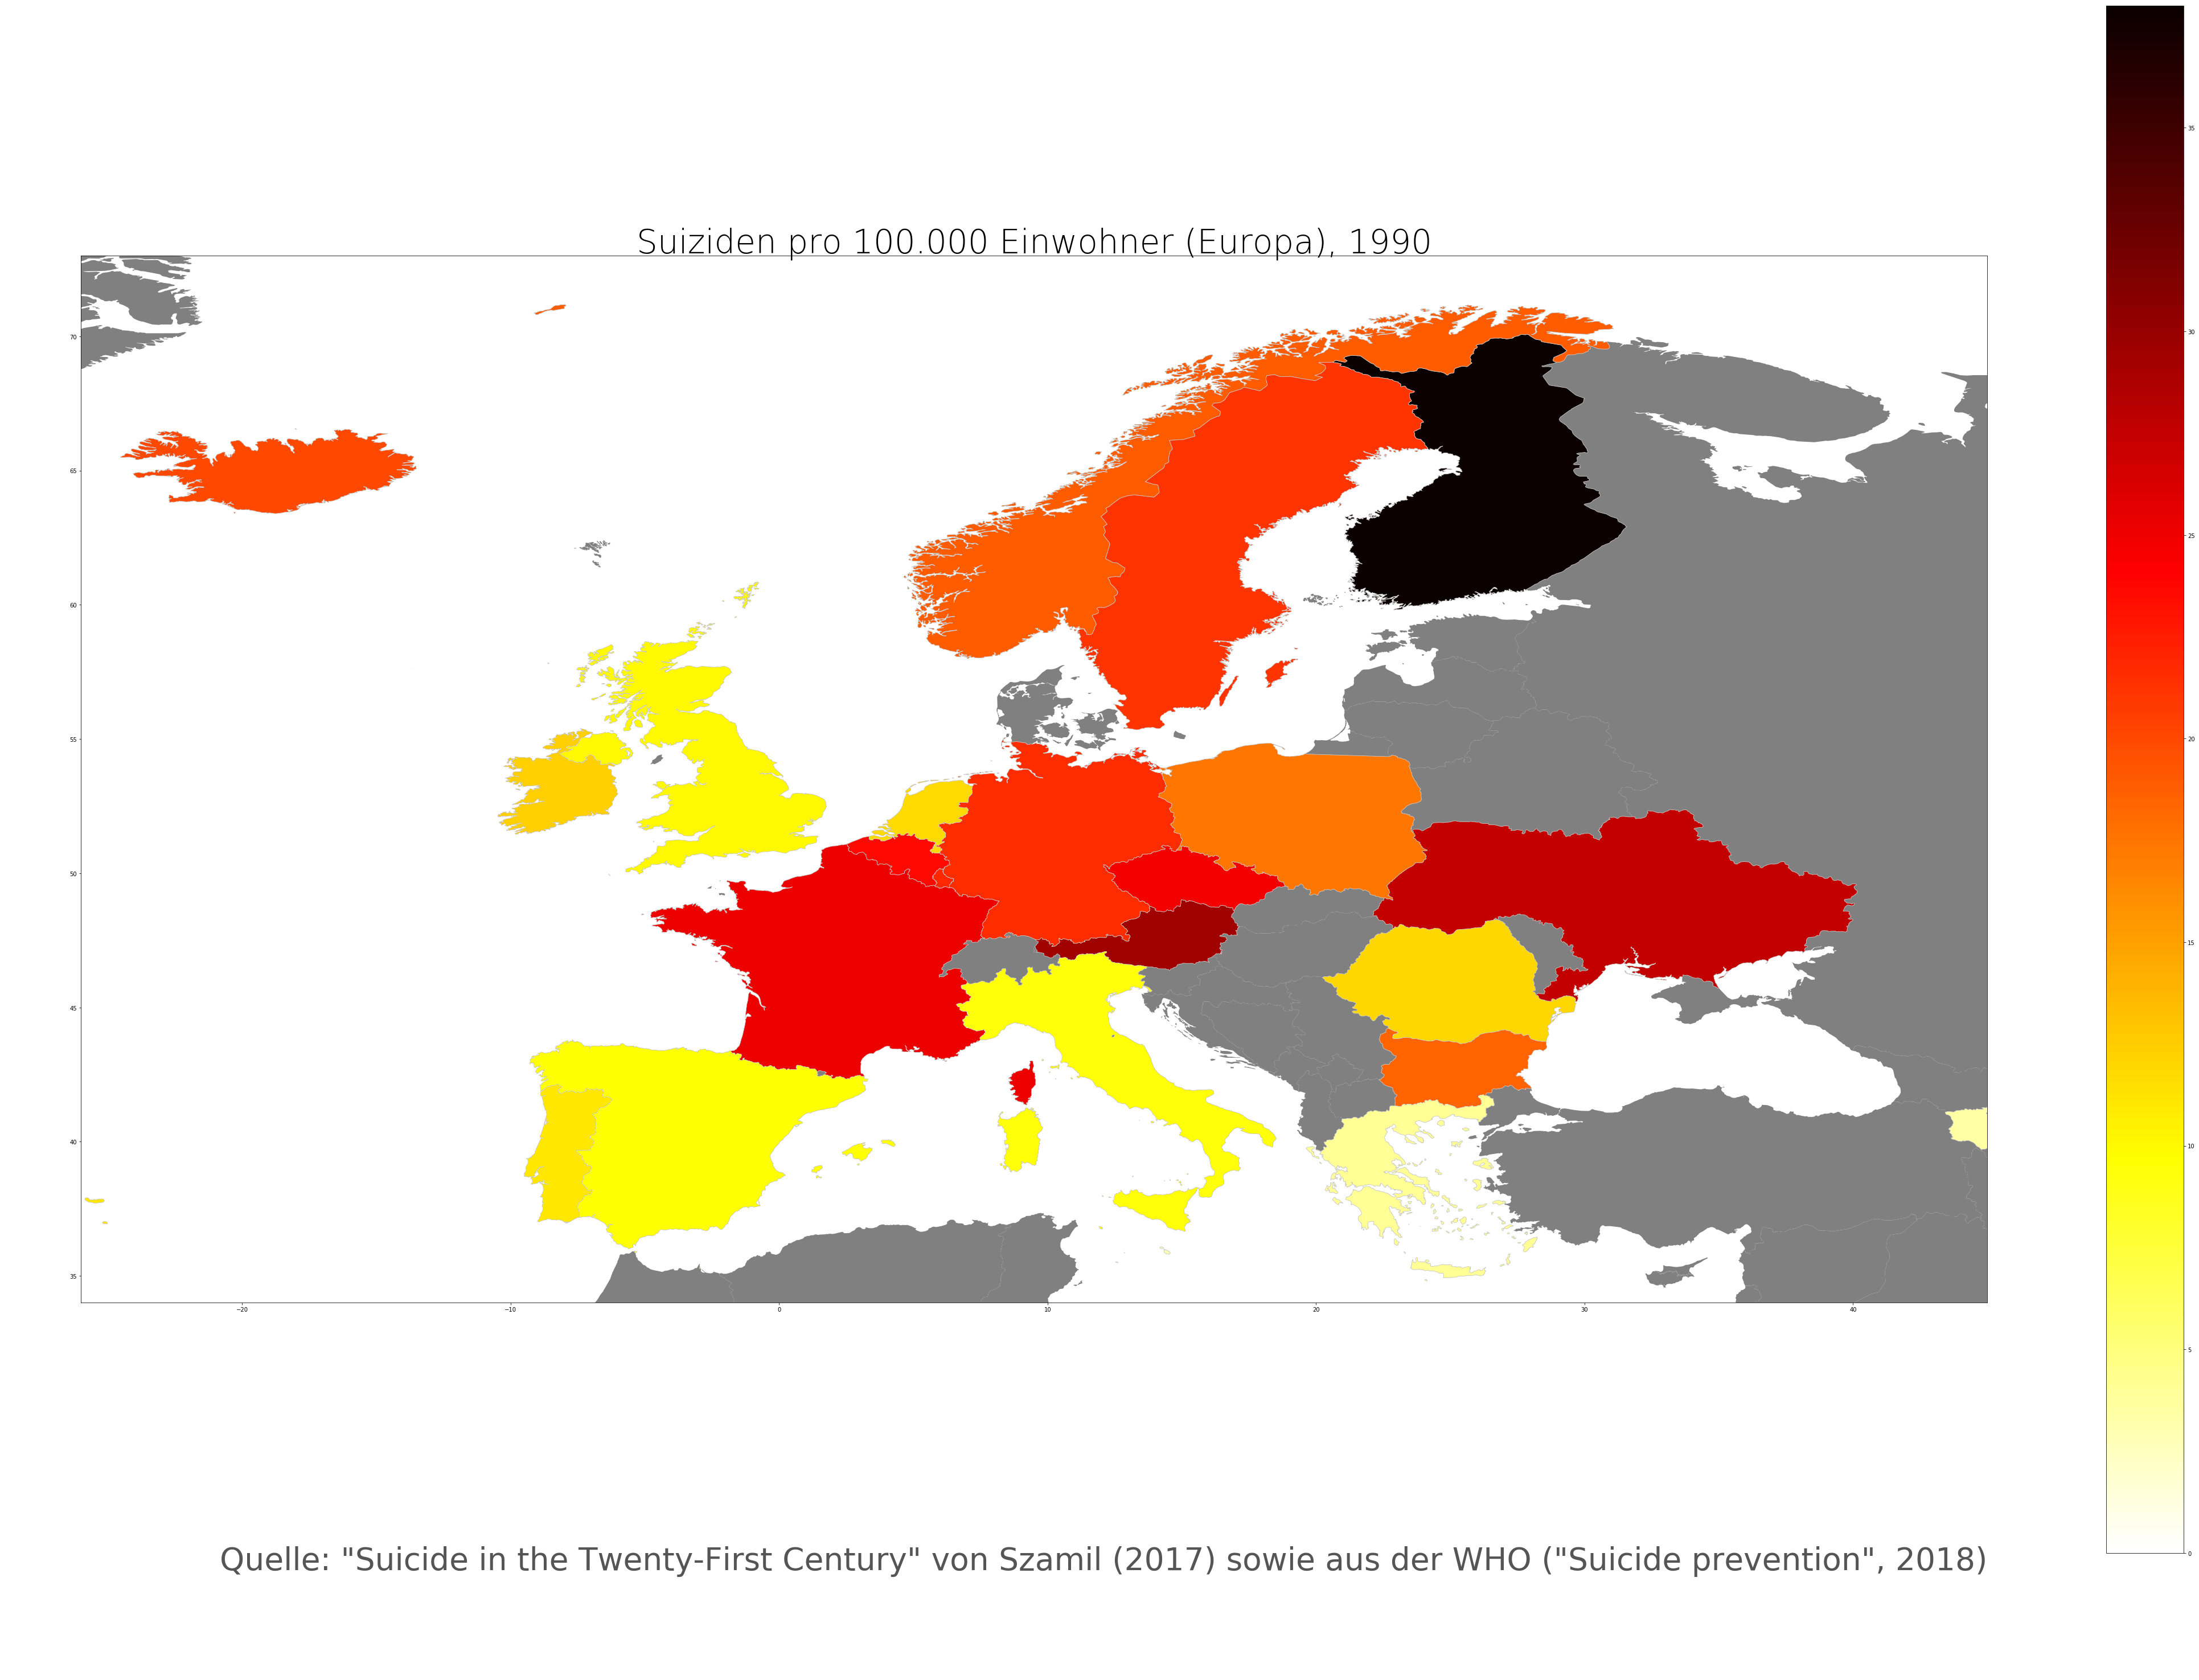

In [28]:
europa(1990)

In [29]:
#fig.savefig("europa_suizid_1990.png", dpi=300) #Ergebnis exportieren und speichern

Obwohl es im Geodatensatz aus Natural Earth separat dargestellt wird, betrachten wir die Krim als Teil der Ukraine.

/opt/conda/lib/python3.6/site-packages/geopandas/plotting.py:404: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


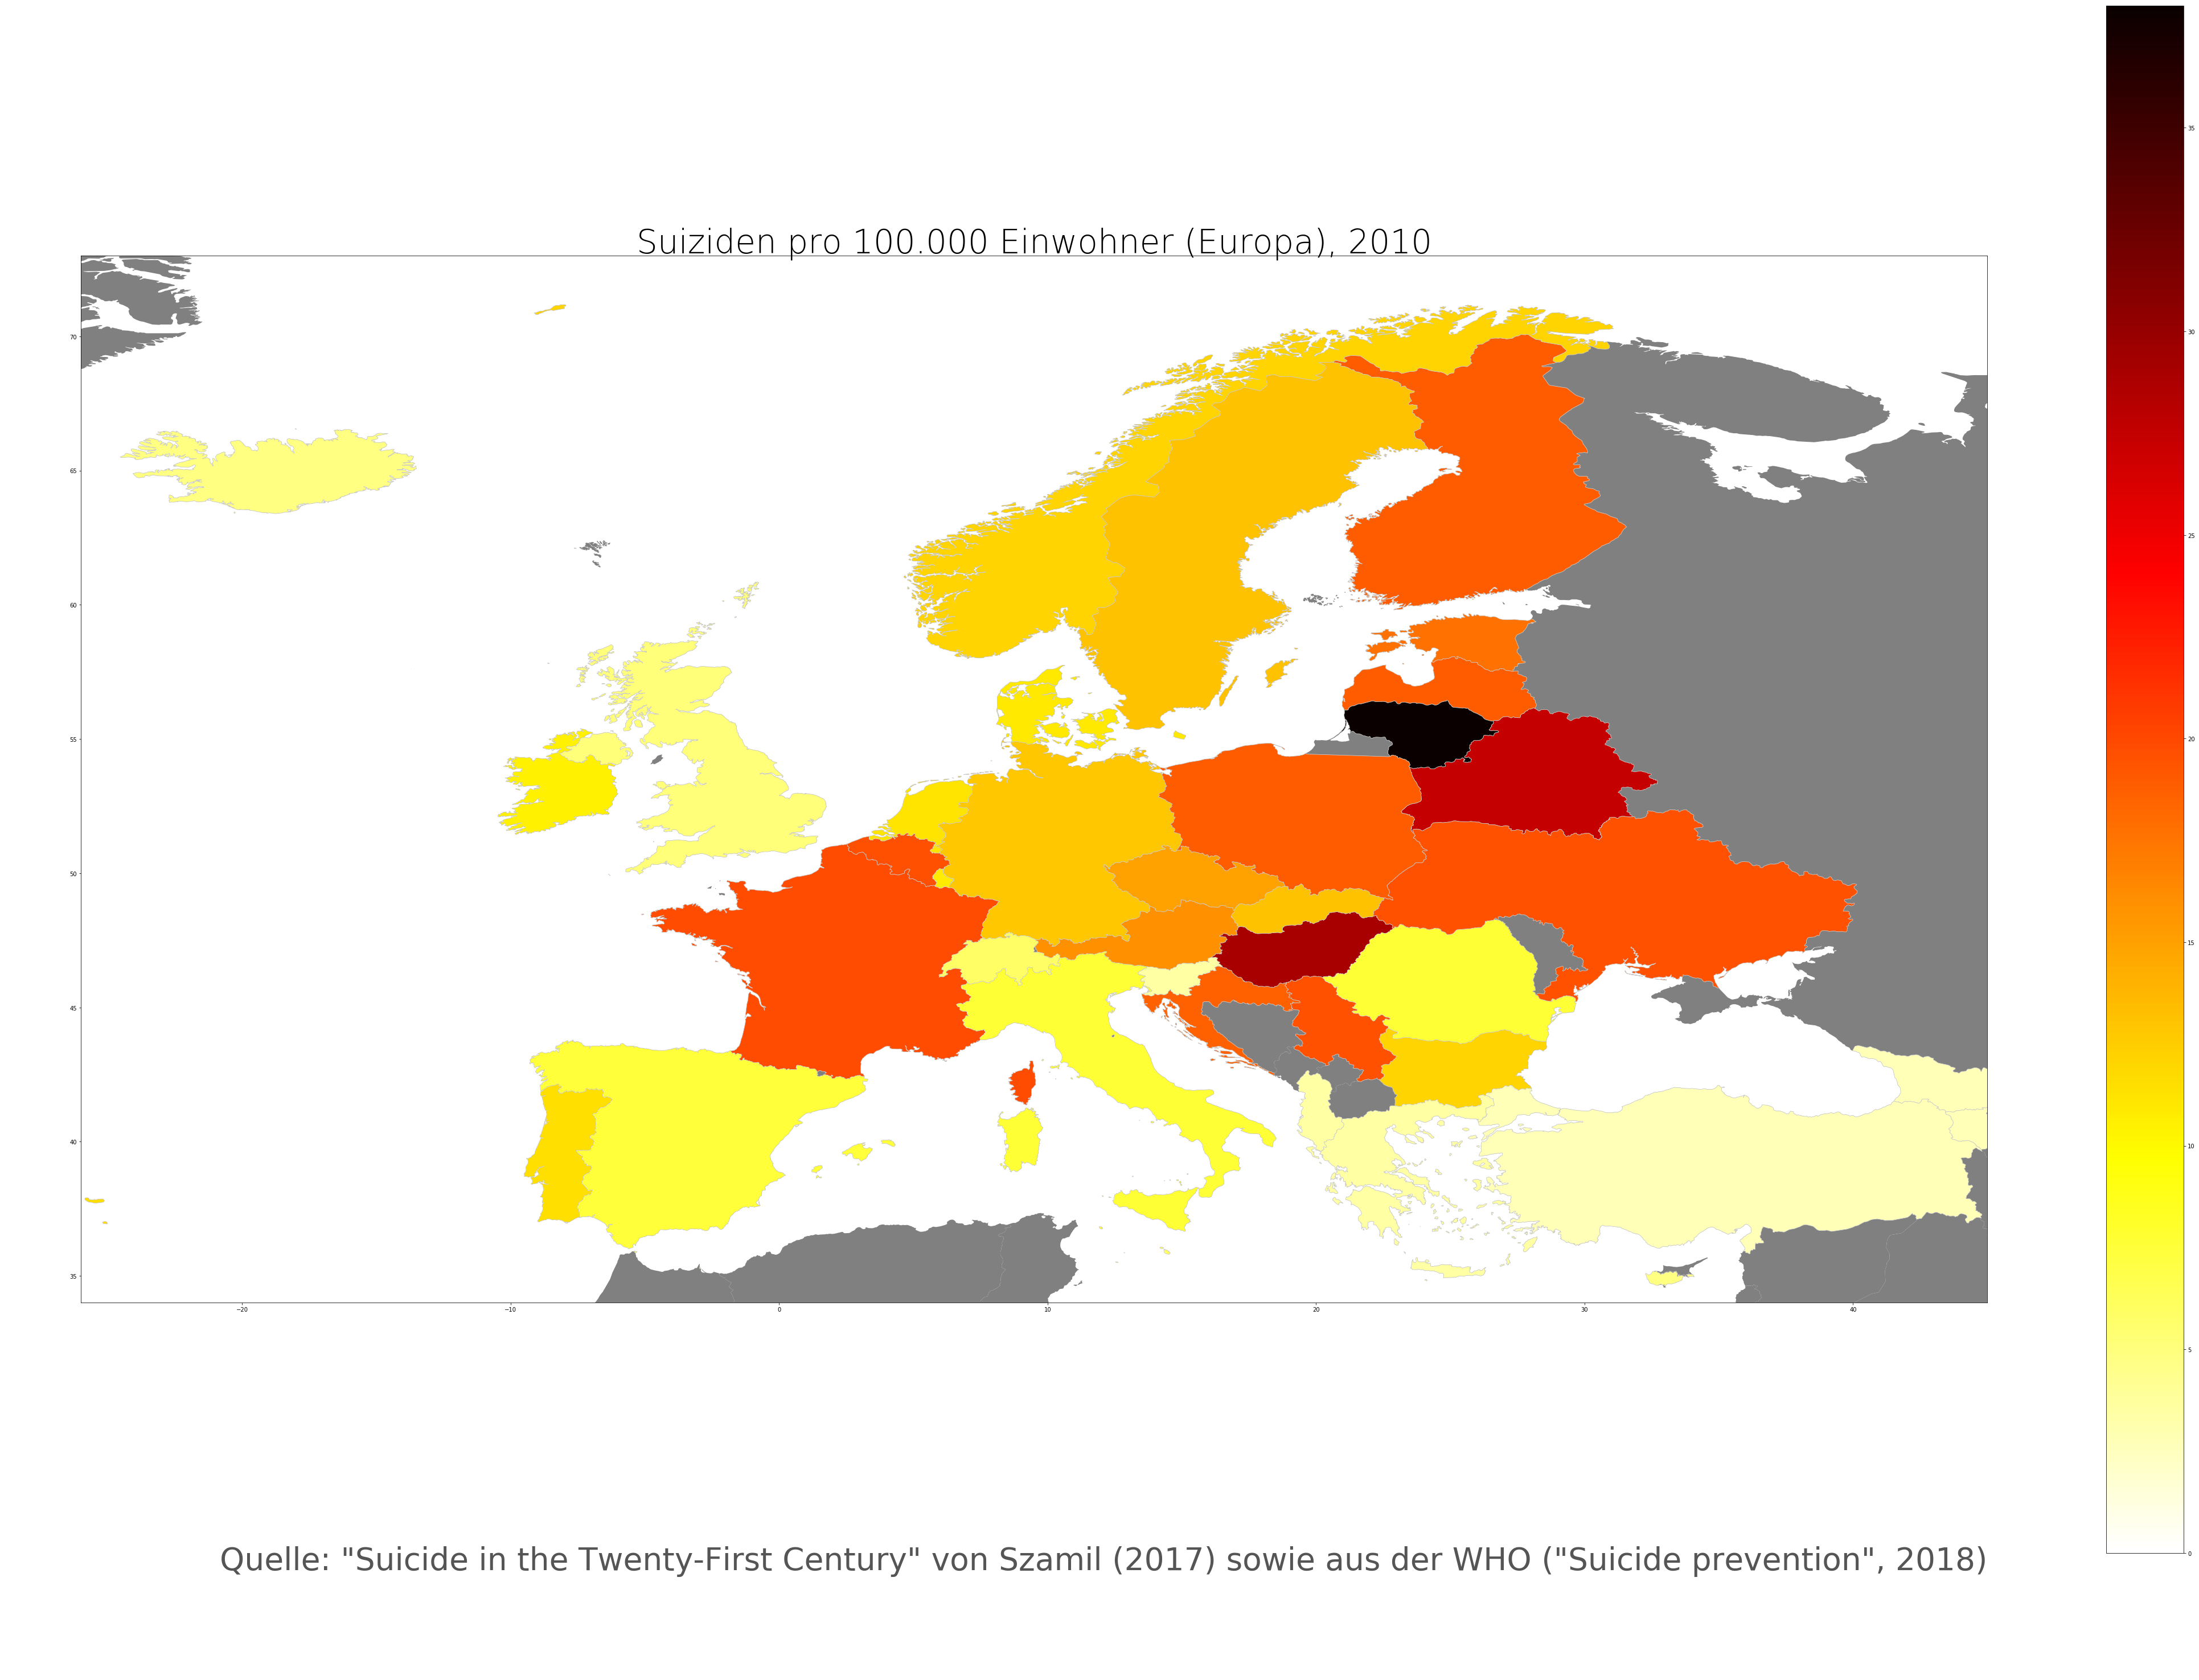

In [30]:
europa(2010)

In [31]:
#fig.savefig("europa_suizid_2010.png", dpi=300) #Ergebnis exportieren und speichern

# Suiziden in Japan

Im Folgenden werden wir uns die zeitliche Entwicklung der Suizidraten japanischer Männer anschauen, die von 25 bis 54 Jahre alt sind.

In [32]:
japan_filter = suizid_daten["country"]=="Japan" #wir schaffen eine Maske für das Land "Japan"
japan = suizid_daten[japan_filter] #und benutzen diese Maske, um das ursprüngliche DataFrame entsprechend zu filtern
altersgruppe_filter = japan["age"]=="35-54 years" #mit einer Maske wird eine Liste mit "True"/"False"-Werte erzeugt
japan_mittelalt = japan[altersgruppe_filter] #falls "True", wird bleibt die Zeile, falls "False", verschwindet die Zeile
mann_filter = japan_mittelalt["sex"] == "male" #wir wählen nur die Männer aus
japan_35_54_mann = japan_mittelalt[mann_filter] #und filtern
japan_35_54_mann.head(5) #wir lassen uns das Ergebnis anzeigen, damit wir prüfen, ob alles richtig ist

country  year   sex          age  suicides_no  population  \
13367   Japan  1985  male  35-54 years         6962    17833300   
13379   Japan  1986  male  35-54 years         7298    18094000   
13391   Japan  1987  male  35-54 years         6688    18218000   
13403   Japan  1988  male  35-54 years         6087    18287000   
13415   Japan  1989  male  35-54 years         5161    18310000   

       suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
13367              39.04    Japan1985         0.791  1,398,892,744,821   
13379              40.33    Japan1986           NaN  2,078,953,333,674   
13391              36.71    Japan1987           NaN  2,532,808,573,157   
13403              33.29    Japan1988           NaN  3,071,683,013,179   
13415              28.19    Japan1989           NaN  3,054,914,166,263   

       gdp_per_capita ($) generation  
13367               12401     Silent  
13379               18288     Silent  
13391               22137     Silent  
13403               26687     Silent  
13415               26389     Silent

Nun werden wir mit matplotlib den zeitlichen Trend visualisieren:

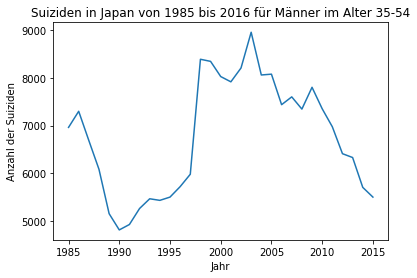

In [33]:
import matplotlib.pyplot as plt #importiert die Bibliothek mit Kürzel "plt"
%matplotlib inline 
plt.plot(japan_35_54_mann["year"], japan_35_54_mann["suicides_no"], label="35-54") #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer im Alter 35-54") #Wir betiteln die Grafik
plt.show()
plt.close()

Es lassen sich mehrkwürdige "Sprünge" in den Suiziden für diese Gruppe erkennen. Man kann sich die Frage stellen, was in den Jahren 1990 bis 1999 in Japan passiert ist, sodass die Anzahl der Suiziden für die Männer im Alter 35-54 so stark angestiegen ist. Interessant ist, ob ein vergleichbarer Trend in anderen japanischen Altersgruppen und bei den Frauen vorliegt.
Nun wollen wir uns die Entwicklungen zwischen verschiedenen Altersgruppen vergleichen:

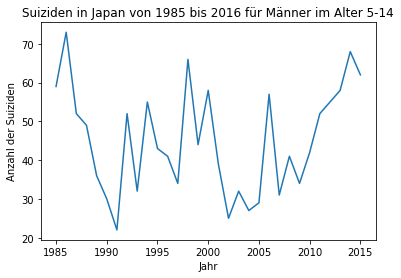

In [34]:
altersgruppe_filter = japan["age"]=="5-14 years"
japan_mittelalt = japan[altersgruppe_filter] 
mann_filter = japan_mittelalt["sex"] == "male" 
japan_5_14_mann = japan_mittelalt[mann_filter] #nun haben wir Jungen im Alter von 5 bis 15 Jahren ausgewählt.

plt.plot(japan_5_14_mann["year"], japan_5_14_mann["suicides_no"], label="5-14") #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer im Alter 5-14") #Wir betiteln die Grafik
plt.show()
plt.close()

Zum einfacheren Vergleich lassen wir uns die Trends für beide Altersgruppen zusammen anzeigen:

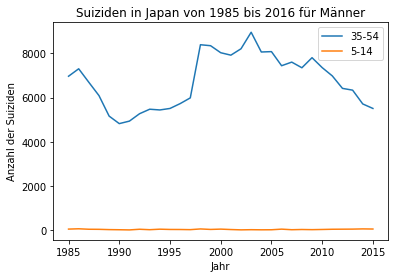

In [35]:
plt.plot(japan_35_54_mann["year"], japan_35_54_mann["suicides_no"], label="35-54") #x-Achse sei Jahr, y-Achse sei Suizidanzahl

plt.plot(japan_5_14_mann["year"], japan_5_14_mann["suicides_no"], label="5-14") #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer") #Wir betiteln die Grafik
plt.legend()
plt.show()

In der neuen "zusammengefügten" Grafik lassen sich die Schwankungen der jüngeren Altersgruppe, die aber in der vorgerigen Grafik offensichtlich waren, nicht erkennen. Hier hat man den Eindruck, dass der Trend gleich geblieben ist und es keine Schwankungen für die Jungen von 5 bis 14 Jahre vorliegen. Der Grund ist, dass die Anzahl der Suiziden für die jüngere Gruppe ungefähr von 25 bis 75 schwankt, währendessen für die Altersgruppe 35 bis 54 die gleiche Größe ungefähr von 4500 bis 8600 schwankt. In relativer Betrachtung ist die Anzahl der Suiziden für die junge Altersgruppe ohne große Bedeutung. Da es um eine (relativ) sehr geringe Anzahl von Suiziden handelt, ist es weniger wahrscheinlich, dass die einzelnen Schwankungen durch allgemeine Ereignisse und geschichtliche Hintergründe erklärt werden können. 
Wir wollen auch andere Altersgruppen (und Altersgruppen nach Geschlecht) miteinander ebenfalls vergleichen, aber für jede Gruppe code zu schreiben wäre zu mühsam. Wir benutzen loops:

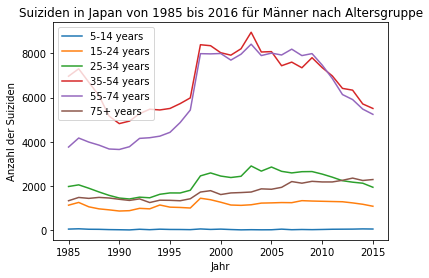

In [36]:
altersgruppenliste=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
#wir haben eine Liste erstellt, welche im loop benutzt wird, um über alle Altersgruppen zu iterieren
for i in altersgruppenliste: #Schleife fängt an
    altersgruppe_filter = japan["age"] == i #Iteration über ALtersgruppen
    japan_altersgruppe = japan[altersgruppe_filter] 
    mann_filter = japan_altersgruppe["sex"] == "male" 
    japan_mann = japan_altersgruppe[mann_filter]
    plt.plot(japan_mann["year"], japan_mann["suicides_no"], label="{}".format(i)) #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer nach Altersgruppe") #Wir betiteln die Grafik
plt.legend()

Nun haben wir die zeitliche Entwicklung der Suizidanzahl für alle Altersgruppen japanischer Männer in einer Grafik visualisiert. In allen Altersgruppen außer der jüngsten Kategorie kann man sehen, das die Suiziden im Zeitraum 1995-2000 bemerkenswert angestiegen sind. Wir wollen uns nun diesen Zeitraum näher anschauen: 

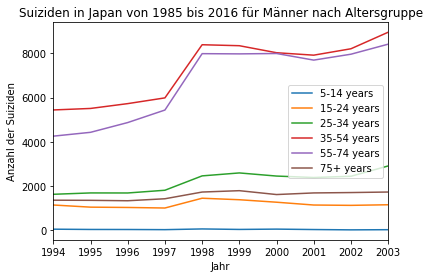

In [37]:
for i in altersgruppenliste: 
    altersgruppe_filter = japan["age"] == i
    japan_altersgruppe = japan[altersgruppe_filter] 
    mann_filter = japan_altersgruppe["sex"] == "male" 
    japan_mann = japan_altersgruppe[mann_filter]
    plt.plot(japan_mann["year"], japan_mann["suicides_no"], label="{}".format(i)) #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer nach Altersgruppe") #Wir betiteln die Grafik
plt.xlim(1994,2003) #wir schauen uns nur die Jahre 1993 bis 2003 an
plt.legend()

Bei näherer Betrachtung sehen wir, dass der "plötzliche" Anstieg der Suiziden von 1997 auf 1998 passiert ist. Es ist interessant, ob in den Jahren 1997-1998 etwas in Japan passiert ist, was diesen bemerkenswerten Anstieg der Anzahl Suiziden (für fast alle Altersgruppen) erklären könnte.

Ein Blick in die Geschichte zeigt uns, dass Anfang 1995 das Erdbeben von Kobe stattgefunden hat. Durch das Erdbeben (und seine unmittelbaren Folgen) sind über 4.000 Menschen gestorben, fast 15.000 Menschen wurden verletzt. Zudem sind ca. 300.000 Menschen obdachlos geworden. Eine mögliche Erklärung wäre, dass wegen des zwingenden Umzugs ihr Alltag sich drastisch geändert hat, was zu vielen unterschiedlichen Komplikationen in ihren Leben geführt hat. Dieser Prozess dauert vermutlich einige Jahre, und daher ist es vorstellbar, dass dieser Effekt erst 1997 in vermehrten Suiziden sich ausgedrückt hat.

Eine plausiblere Erklärung wäre die Finanzkrise Asiens, die 1997 anfing und negative Auswirkungen auf die ostasiatischen Länder hatte. Japan war auch betroffen und es gab eine Rezession. Viele Menschen haben ihre Arbeitsplätze und somit Einkommensquellen verloren, was den Anstieg der Suiziden ausgelöst haben könnte.

Es wäre gut, mit diesem Ansatz auch andere Länder zu betrachten. Es wäre aber zu aufwendig, für jedes Land den Code neu zu schreiben. Deshalb erstellen wir dafür eine eigene Funktion, die den Prozess beschleunigt und vereinfacht:

In [38]:
def landanalyse(argument): #es ist nur ein Argument anzugeben
    altersgruppenliste=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
    land_filter = suizid_daten["country"]==argument #das Argument wird der Name eines Landes sein
    land = suizid_daten[land_filter] #im nun gefilterten DataFrame haben wir die Daten für nur ein Land
    fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12)) #ein subplot für Männer, ein subplot für Frauen, hinreichend groß
    for i in altersgruppenliste: #wir iterieren über die Altersgruppen
        altersgruppe_filter = land["age"] == i 
        land_altersgruppe = land[altersgruppe_filter] 
        mann_filter = land_altersgruppe["sex"] == "male" #wir filtern nach Männern
        land_mann = land_altersgruppe[mann_filter] #DataFrame hat nun nur Männer eines bestimmten Landes
        ax1.plot(land_mann["year"], land_mann["suicides_no"], label="{}".format(i), marker="o", markersize=4) #plotten im ersten subplot
        ax1.set_xlabel('Jahr', fontsize=15) #Beschriftung der x-Achse
        ax1.set_ylabel("Anzahl der Suiziden", fontsize=15) #Beschriftung der y-Achse
    ax1.set_title("Suiziden in {} von 1985 bis 2016 für Männer nach Altersgruppe".format(argument), size = 15)
    ax1.legend(fontsize=15)  #Anzeigen der Legende
    for i in altersgruppenliste: #wir iterieren über die Altersgruppen
        altersgruppe_filter = land["age"] == i 
        land_altersgruppe = land[altersgruppe_filter] 
        frau_filter = land_altersgruppe["sex"] == "female" #wir filtern nach Frauen
        land_frau = land_altersgruppe[frau_filter] #DataFrame hat nun nur Frauen eines bestimmten Landes
        ax2.plot(land_frau["year"], land_frau["suicides_no"], label="{}".format(i), marker="o", markersize=4) #plotten im zweiten subplot
        ax2.set_xlabel('Jahr', fontsize=15) #Beschriftung der x-Achse
        ax2.set_ylabel("Anzahl der Suiziden", fontsize=15) #Beschriftung der y-Achse
    ax2.set_title("Suiziden in {} von 1985 bis 2016 für Frauen nach Altersgruppe".format(argument), size = 15)
    ax2.legend(fontsize=15) #Anzeigen der Legende

Yay, es hat funktioniert!


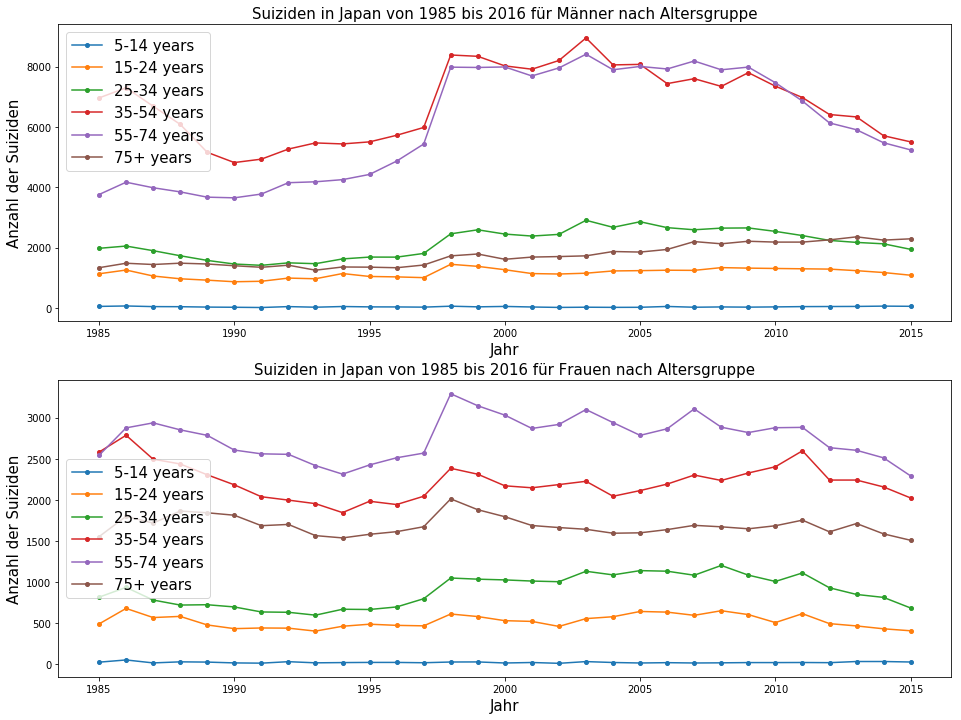

In [39]:
landanalyse("Japan") #wir prüfen, ob die Funktion funktioniert
print("Yay, es hat funktioniert!") #hätte es nicht funktioniert, käme es nicht zu dieser Zeile

Wir können uns verschiedene Länder anschauen:

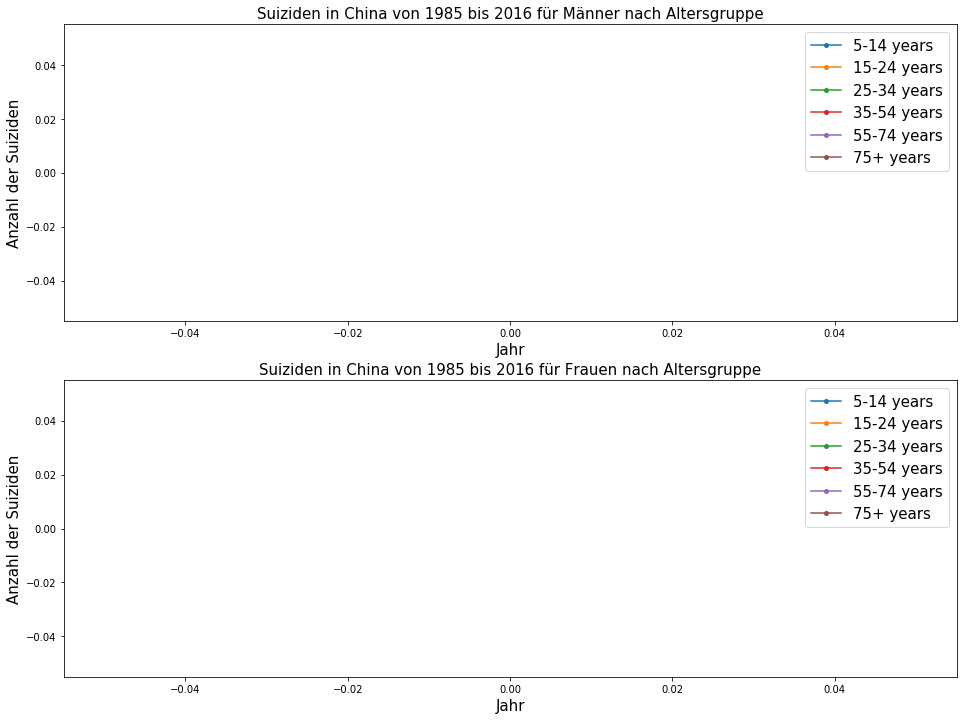

In [40]:
landanalyse("China")

Entweder haben wir den Namen für China falsch eingetippt, oder China ist nicht in unserem Datensatz repräsentiert. Nun wollen wir uns erinnern, für welche Länder wir Daten haben:

In [41]:
suizid_daten["country"].unique() #Ausgabe aller einzigartiger Werte der Spalte "country" aus unserem DataFrame

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Tatsächlich ist China nicht in unserem Datensazt repräsentiert. Wir können aber natürlich die Trends für andere Länder visualisieren:

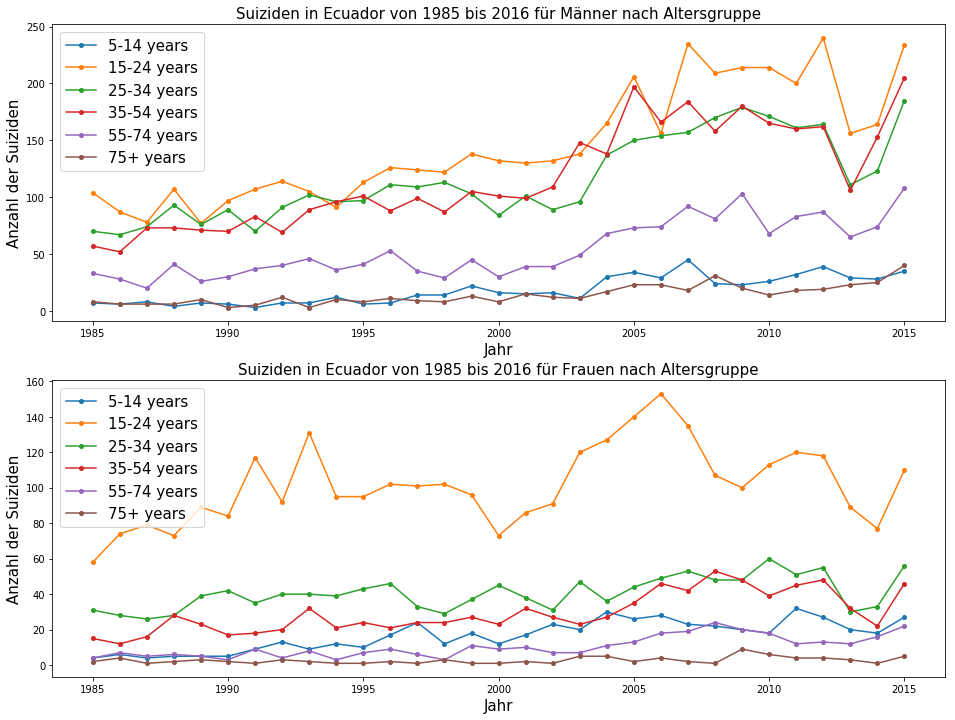

In [42]:
landanalyse("Ecuador")

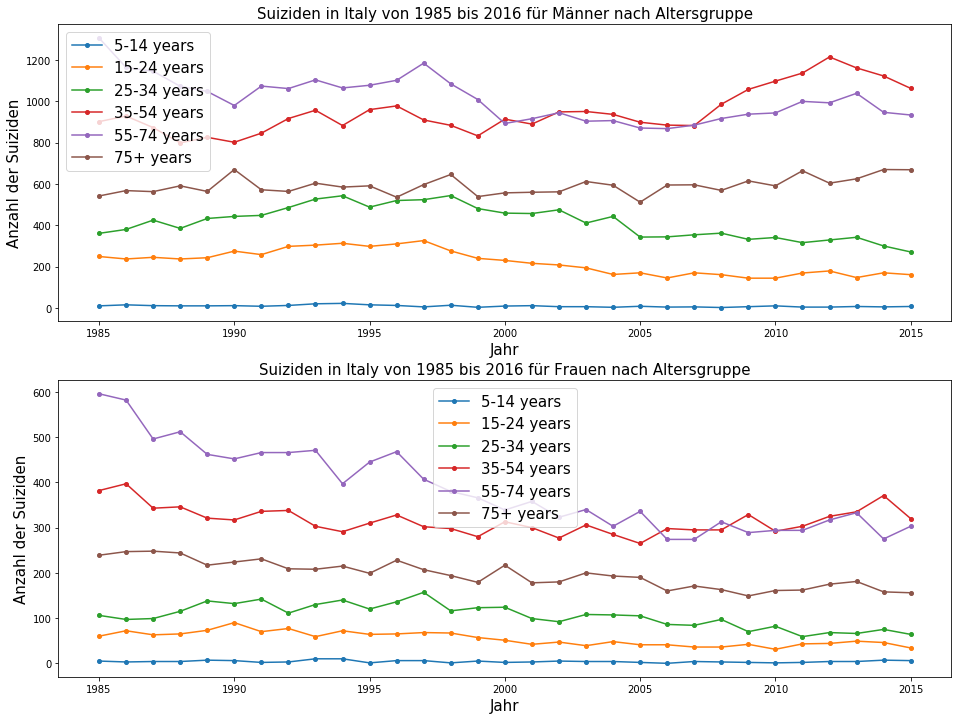

In [43]:
landanalyse("Italy")

# Suiziden in Ostasien

Jetzt wollen wir die zeitlichen Trends für verschiedene Länder miteinander vergleichen. Es wäre aber zu unübersichtlich, je Land zwei geschlechtsspezifische Graphen mit ihren jeweiligen Altersgruppen zu vergleichen. Zu diesem Zweck wäre es sinnvoll, dass wir die Daten in gewissen Maße aggregieren, sodass wir zumindest nicht mehr nach Geschlechtern differenzieren müssen (sonst hätte der visuelle Vergleich vier Grafiken, sodass es unübersichtlich wäre). Also wollen wir pro Land eine Grafik mit entsprechenden Linien für die Altersgruppen visualisieren, wobei in jeder Altersgruppe("Linie") sowohl Männer, als auch Frauen repräsentiert sein werden.

In [44]:
mann_filter = suizid_daten["sex"] == "male" 
suizid_mann = suizid_daten[mann_filter] #dieses DataFrame enthält nur Männer
frau_filter = suizid_daten["sex"] == "female"
suizid_frau = suizid_daten[frau_filter] #dieses DataFrame enthält nur Frauen
suizid_mann = suizid_mann.sort_values(["age","country"]) #sortieren 
suizid_frau = suizid_frau.sort_values(["age", "country"]) #beide DataFrames sind gleich sortiert. Das wird sehr wichtig sein
suizid_mann.reset_index(inplace = True)
suizid_frau.reset_index(inplace = True)
list(suizid_daten.columns.values) #anzeigen der Spaltennamen
suizid_alle = pd.DataFrame(columns = ["country", "year", "sex", "age", "suicides_no", "population", "suicides/100k pop",
"country-year",  "HDI for year", " gdp_for_year ($) ", "gdp_per_capita ($)", "generation"])
suizid_alle = suizid_mann[["country", "year", "age", "country-year", "HDI for year", " gdp_for_year ($) ", \
                           "gdp_per_capita ($)", "generation"]].copy()
suizid_alle["population"] = suizid_mann["population"] + suizid_frau["population"]
suizid_alle["suicides_no"] = suizid_mann["suicides_no"] + suizid_frau["suicides_no"]
suizid_alle["suicides/100k pop"] = suizid_alle["suicides_no"] / suizid_alle["population"]
suizid_alle["suicides/100k pop"] = suizid_alle["suicides/100k pop"] * 100000
#suizid_alle["suicides/100k pop"] = suizid_mann["suicides/100k pop"] + suizid_frau["suicides/100k pop"]

suizid_alle.head()

country  year          age country-year  HDI for year  gdp_for_year ($)   \
0  Albania  1987  15-24 years  Albania1987           NaN      2,156,624,900   
1  Albania  1988  15-24 years  Albania1988           NaN      2,126,000,000   
2  Albania  1989  15-24 years  Albania1989           NaN      2,335,124,988   
3  Albania  1992  15-24 years  Albania1992           NaN        709,452,584   
4  Albania  1993  15-24 years  Albania1993           NaN      1,228,071,038   

   gdp_per_capita ($)    generation  population  suicides_no  \
0                 796  Generation X      602600           35   
1                 769  Generation X      614800           25   
2                 833  Generation X      623400           17   
3                 251  Generation X      556100           16   
4                 437  Generation X      528600           28   

   suicides/100k pop  
0           5.808165  
1           4.066363  
2           2.726981  
3           2.877180  
4           5.297011

Wir wollen nun überprüfen, ob die Additionen richtig durchgeführt wurden und ob das funktioniert hat, indem wir die Werte für "suicides/100k pop", "population" und "suicides_no" aus suizid_frau und suizid_mann mit den entsprechenden Werten aus suizid_alle vergleichen, für eine beliebige Zeile.

In [45]:
suizid_alle.loc[536] #Aufrufen der 536. Zeile von suizid_alle. Damit werden wir die beiden geschlechtsspezifischen Zeilen vergleichen

country                      Croatia
year                            2000
age                      15-24 years
country-year             Croatia2000
HDI for year                   0.749
 gdp_for_year ($)     21,774,273,832
gdp_per_capita ($)              5288
generation              Generation X
population                    594600
suicides_no                       66
suicides/100k pop            11.0999
Name: 536, dtype: object

In [46]:
suizid_mann.loc[536]

index                           6434
country                      Croatia
year                            2000
sex                             male
age                      15-24 years
suicides_no                       57
population                    302700
suicides/100k pop              18.83
country-year             Croatia2000
HDI for year                   0.749
 gdp_for_year ($)     21,774,273,832
gdp_per_capita ($)              5288
generation              Generation X
Name: 536, dtype: object

In [47]:
suizid_frau.loc[536]

index                           6437
country                      Croatia
year                            2000
sex                           female
age                      15-24 years
suicides_no                        9
population                    291900
suicides/100k pop               3.08
country-year             Croatia2000
HDI for year                   0.749
 gdp_for_year ($)     21,774,273,832
gdp_per_capita ($)              5288
generation              Generation X
Name: 536, dtype: object

Die Werte sind passend. Es scheint, dass es funktioniert hat.

Da wir herausgefunden haben, dass das obige Verfahren das gewünschte Ergebnis liefert, wollen wir nun eine Funktion schreiben, die uns einen Vergleich zwischen zwei beliebigen Ländern ermöglichen wird. Wichtig ist, dass wir als zu vergleichende Größe nicht mehr die absolute Anzahl an Suiziden, sondern eine normierte Größe, nämlich die Anzahl der Suiziden pro 100.000 Einwohner nehmen. Der Grund dafür ist, dass unterschiedliche Länder unterschiedliche Bevölkerungsgrößen haben, weshalb ein direkter Vergleich anhand der absoluten Zahlen wenig Sinn macht.

In [48]:
def landvergleich(land1, land2):
    mann_filter = suizid_daten["sex"] == "male" 
    suizid_mann = suizid_daten[mann_filter] #dieses DataFrame enthält nur Männer
    frau_filter = suizid_daten["sex"] == "female"
    suizid_frau = suizid_daten[frau_filter] #dieses DataFrame enthält nur Frauen
    suizid_mann = suizid_mann.sort_values(["age","country"]) #sortieren 
    suizid_frau = suizid_frau.sort_values(["age", "country"]) #beide DataFrames sind gleich sortiert. Das wird sehr wichtig sein
    suizid_mann.reset_index(inplace = True)
    suizid_frau.reset_index(inplace = True)
    list(suizid_daten.columns.values) #anzeigen der Spaltennamen
    suizid_alle = pd.DataFrame(columns = ["country", "year", "sex", "age", "suicides_no", "population", "suicides/100k pop",
    "country-year",  "HDI for year", " gdp_for_year ($) ", "gdp_per_capita ($)", "generation"])
    suizid_alle = suizid_mann[["country", "year", "age", "country-year", "HDI for year", " gdp_for_year ($) ", \
                           "gdp_per_capita ($)", "generation"]].copy()
    suizid_alle["population"] = suizid_mann["population"] + suizid_frau["population"] #Aggregierter Wert für beide Geschlechter
    suizid_alle["suicides/100k pop"] = suizid_mann["suicides/100k pop"] + suizid_frau["suicides/100k pop"]
    suizid_alle["suicides_no"] = suizid_mann["suicides_no"] + suizid_frau["suicides_no"]
    
    altersgruppenliste=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"] #für Iteration
    land_filter = suizid_alle["country"]==land1 #das Argument wird der Name des ersten Landes sein
    land = suizid_alle[land_filter] #im nun gefilterten DataFrame haben wir die Daten für nur ein Land
    fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12)) #ein subplot für Land 1, ein subplot für Land 2, hinreichend groß
    for i in altersgruppenliste: #wir iterieren über die Altersgruppen
        altersgruppe_filter = land["age"] == i #wir erstellen eine Maske mit "True"- und "False"-Werten
        land_altersgruppe = land[altersgruppe_filter] #und filtern die Daten für das Land nach der anstehenden Altersgruppe
        ax1.plot(land_altersgruppe["year"], land_altersgruppe["suicides/100k pop"], label="{}".format(i), marker="o", markersize=4) #plotten im ersten subplot
        ax1.set_xlabel('Jahr', fontsize=15) #Beschriftung der x-Achse
        ax1.set_ylabel("Suiziden pro 100.000 Einwohner", fontsize=15) #Beschriftung der y-Achse
    ax1.set_title("Suizidraten in {} von 1985 bis 2016 nach Altersgruppe".format(land1), size = 15)
    ax1.legend(fontsize=15)  #Anzeigen der Legende
    land_filter = suizid_alle["country"]==land2 #das Argument wird der Name des zweiten Landes sein
    land = suizid_alle[land_filter] #im nun gefilterten DataFrame haben wir die Daten für nur ein Land
    for i in altersgruppenliste: #wir iterieren über die Altersgruppen
        altersgruppe_filter = land["age"] == i 
        land_altersgruppe = land[altersgruppe_filter] 
        ax2.plot(land_altersgruppe["year"], land_altersgruppe["suicides/100k pop"], label="{}".format(i), marker="o", markersize=4) #plotten im zweiten subplot
        ax2.set_xlabel('Jahr', fontsize=15) #Beschriftung der x-Achse
        ax2.set_ylabel("Suiziden pro 100.000 Einwohner", fontsize=15) #Beschriftung der y-Achse
    ax2.set_title("Suizidraten in {} von 1985 bis 2016 nach Altersgruppe".format(land2), size = 15)
    ax2.legend(fontsize=15) #Anzeigen der Legende

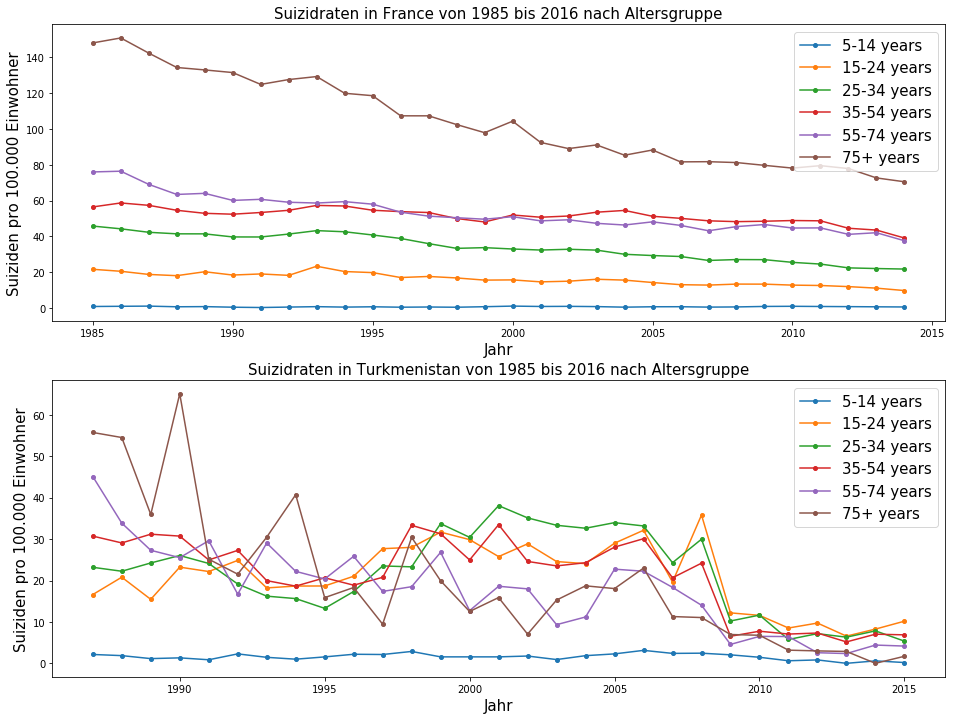

In [49]:
landvergleich("France", "Turkmenistan") #Visualisierung, die in jeder Altersgruppe beide Geschlechter beinhaltet

Wie wir oben bei der Betrachtung Japans festgestellt hatten, gab es 1997 eine Finanzkrise in Asien. Es wäre interessant zu sehen, ob in anderen ostasiatischen Ländern ebenfalls ein starker Anstieg der Suiziden im Jahre 1997 zu beobachten ist:

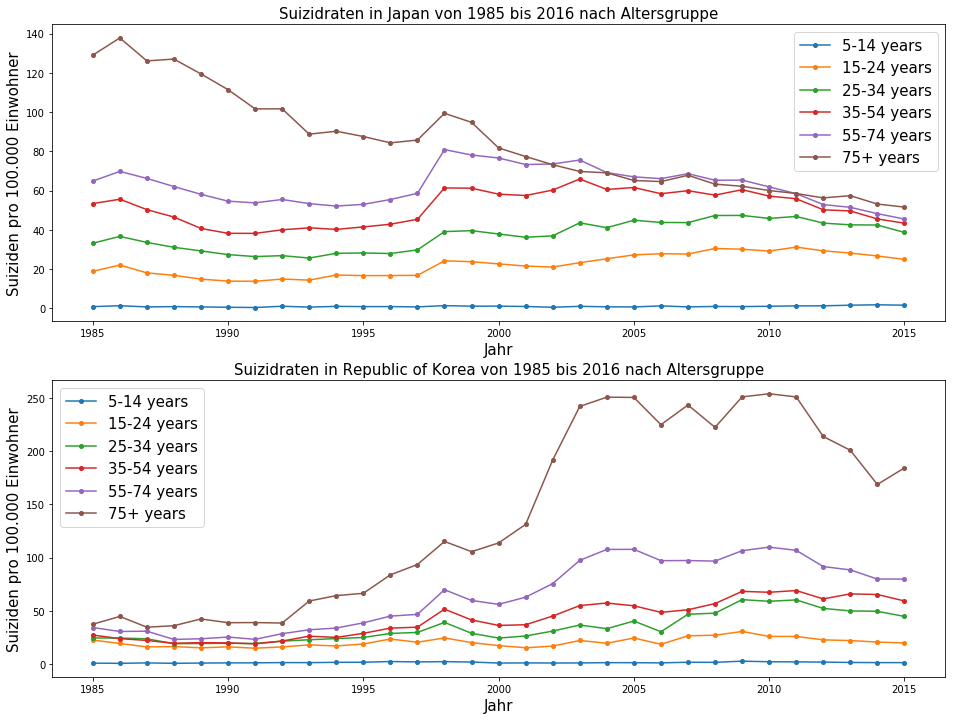

In [50]:
landvergleich("Japan", "Republic of Korea")

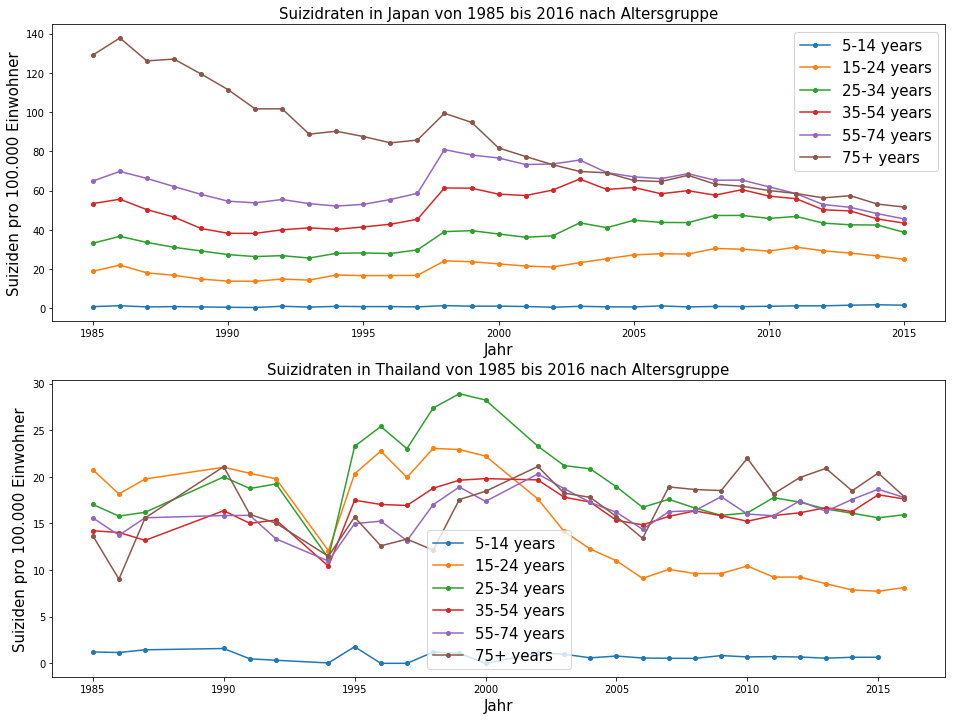

In [51]:
landvergleich("Japan", "Thailand")

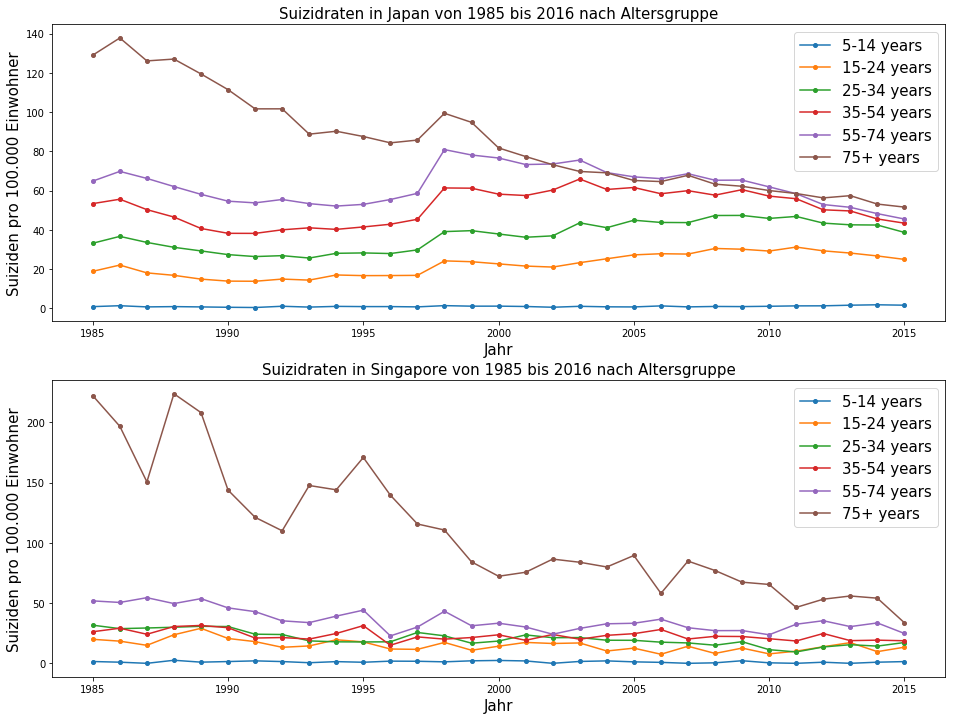

In [52]:
landvergleich("Japan", "Singapore")

# Zusammenhang zwischen Suizidraten & BIP

In [53]:
# Fasse die Variablen Werte "suicides_no", "gdp_per_capita ($)", "population" die Variablen nach country & year zusammen.
suizid_pivot_tabelle = suizid_daten.pivot_table(
        index='country',
        columns='year',
        values=['suicides_no', 'gdp_per_capita ($)', 'population'],
        aggfunc={'suicides_no': np.sum, 'gdp_per_capita ($)': np.mean, 'population': np.sum}
    )


In [54]:
# Pivot-Tabelle hat andere Format, dafür erstmal in "stack" - Long Format bringen 
# und dann to_records() anwenden um in DataFrame umwuwandeln
scatterplot_data = pd.DataFrame(suizid_pivot_tabelle.stack().to_records())

In [55]:
scatterplot_data.head()

country  year  gdp_per_capita ($)  population  suicides_no
0  Albania  1987               796.0   2709600.0         73.0
1  Albania  1988               769.0   2764300.0         63.0
2  Albania  1989               833.0   2803100.0         68.0
3  Albania  1992               251.0   2822500.0         47.0
4  Albania  1993               437.0   2807300.0         73.0

In [56]:
# erstelle neue Spalte für suizidraten
scatterplot_data["suicides/100k pop"] = scatterplot_data["suicides_no"] / scatterplot_data["population"] * 100000

In [57]:
scatterplot_data.head()

country  year  gdp_per_capita ($)  population  suicides_no  \
0  Albania  1987               796.0   2709600.0         73.0   
1  Albania  1988               769.0   2764300.0         63.0   
2  Albania  1989               833.0   2803100.0         68.0   
3  Albania  1992               251.0   2822500.0         47.0   
4  Albania  1993               437.0   2807300.0         73.0   

   suicides/100k pop  
0           2.694125  
1           2.279058  
2           2.425886  
3           1.665190  
4           2.600363

In [58]:
# Daten für alle Jahre außer 2016, da in 2016 Daten für viele Länder fehlen
scatterplot_data = scatterplot_data.query("year!=2016")

In [59]:
scatterplot_data.year.sort_values().unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

ß0: 7.119 ß1: 0.000
P-wert: 0.123 R2: 0.051


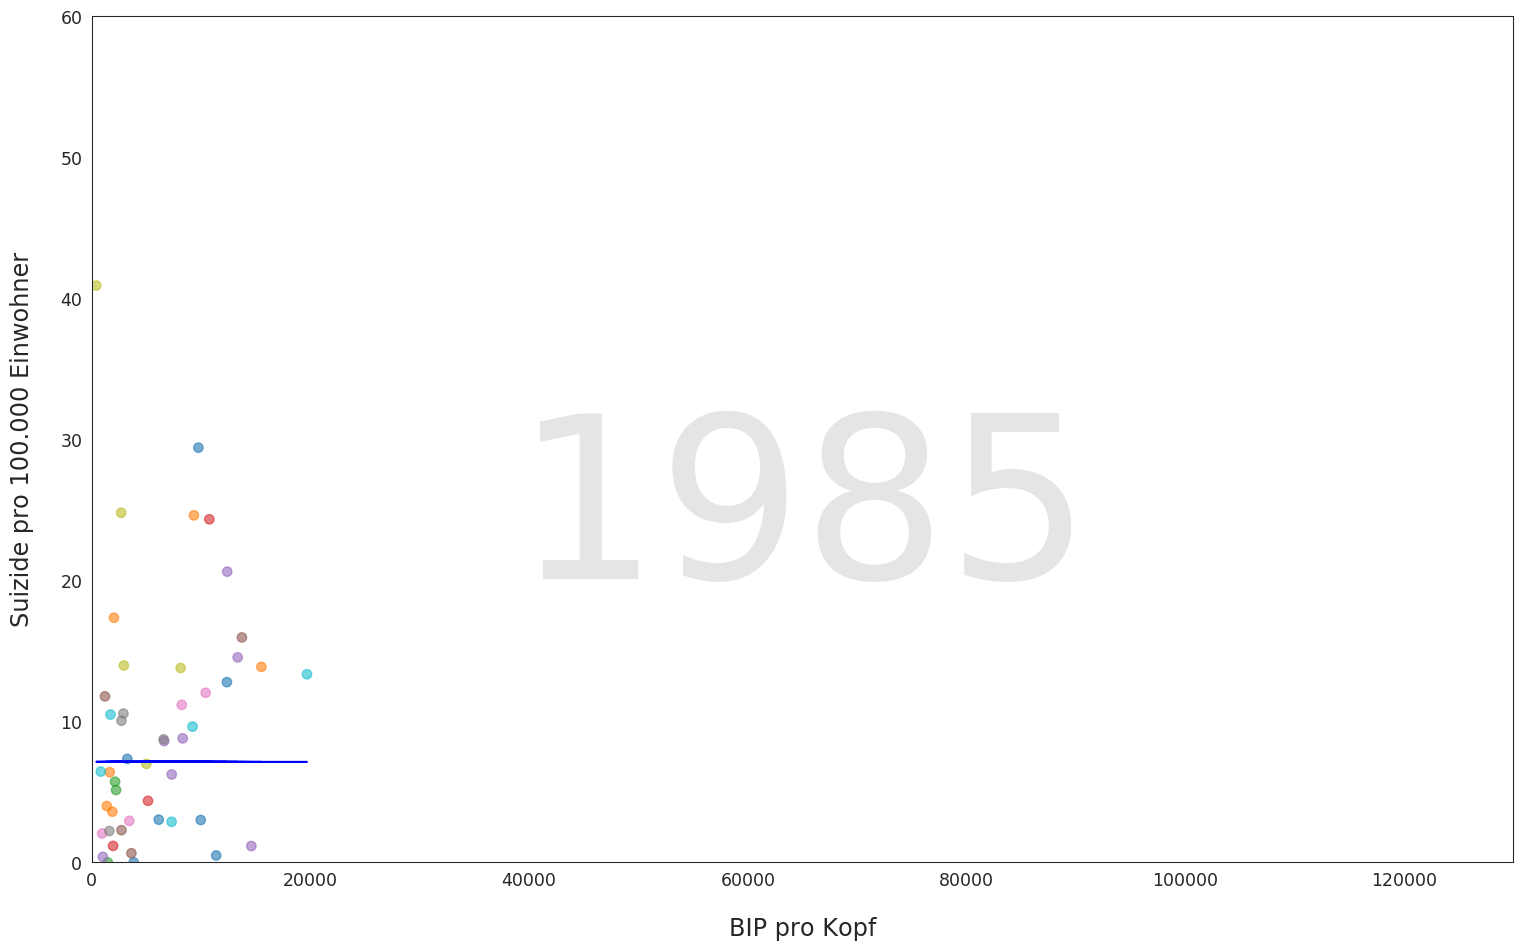

ß0: 4.798 ß1: 0.001
P-wert: 0.000 R2: 0.246


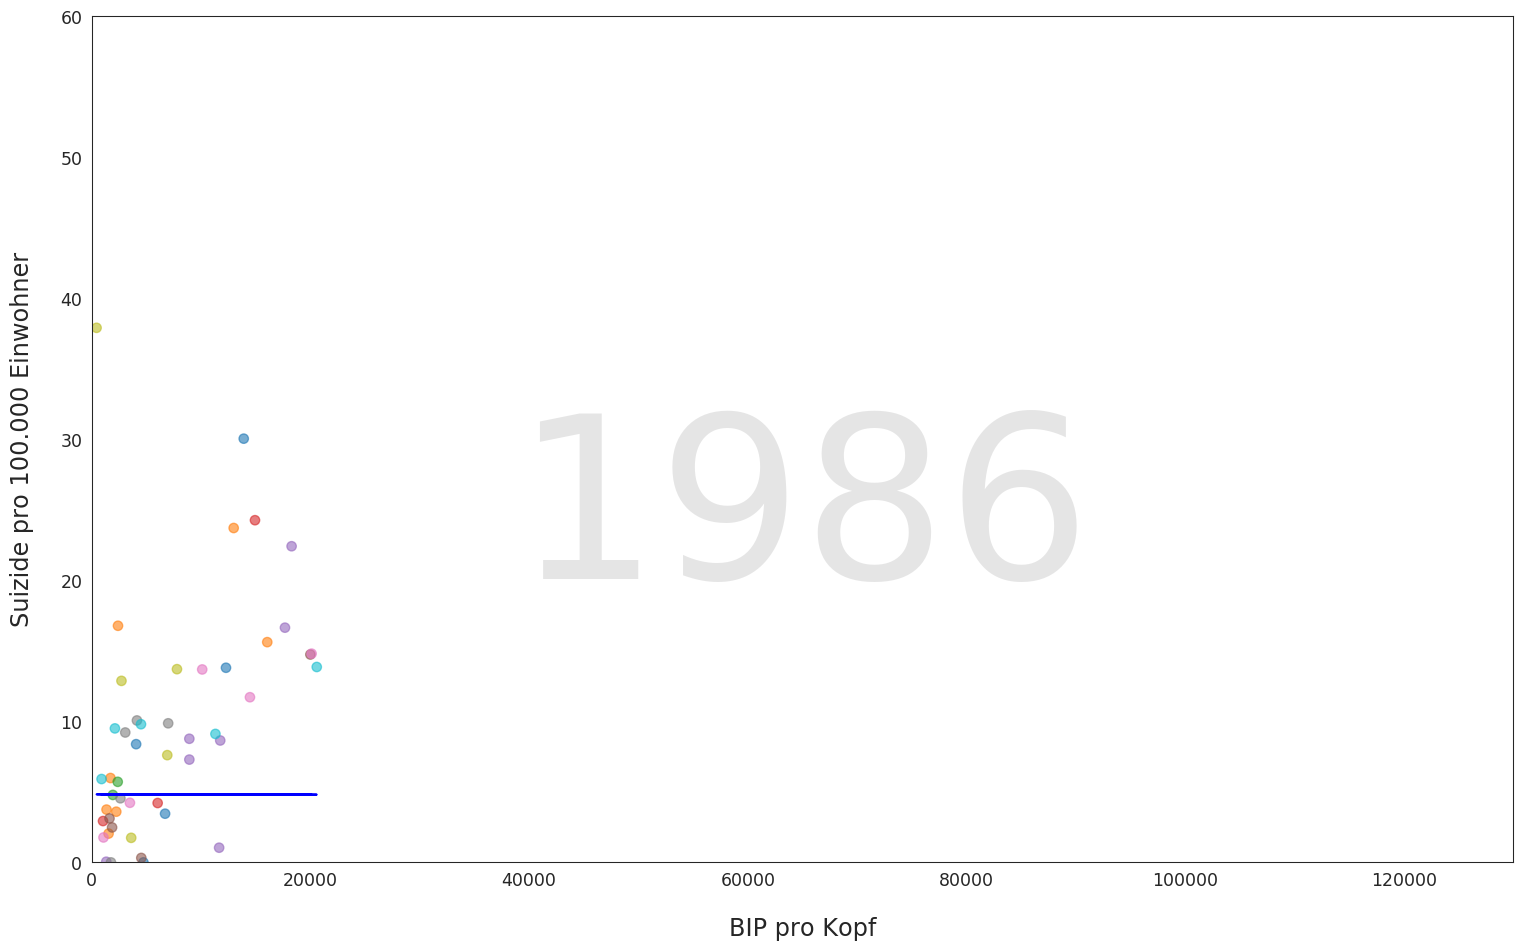

ß0: 4.440 ß1: 0.001
P-wert: 0.000 R2: 0.379


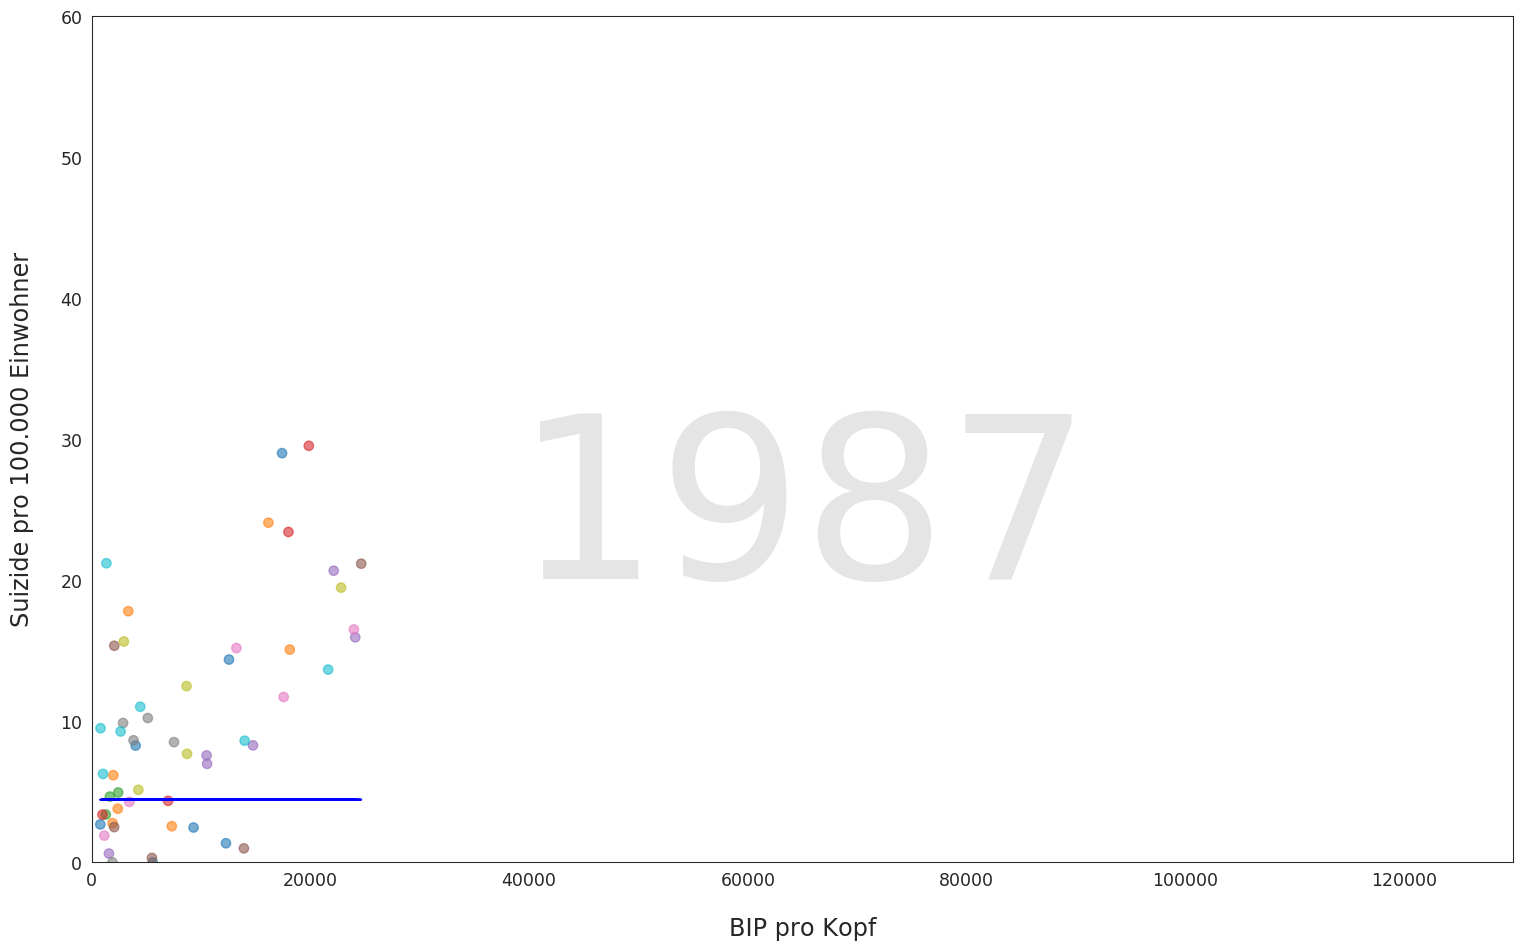

ß0: 5.596 ß1: 0.001
P-wert: 0.000 R2: 0.406


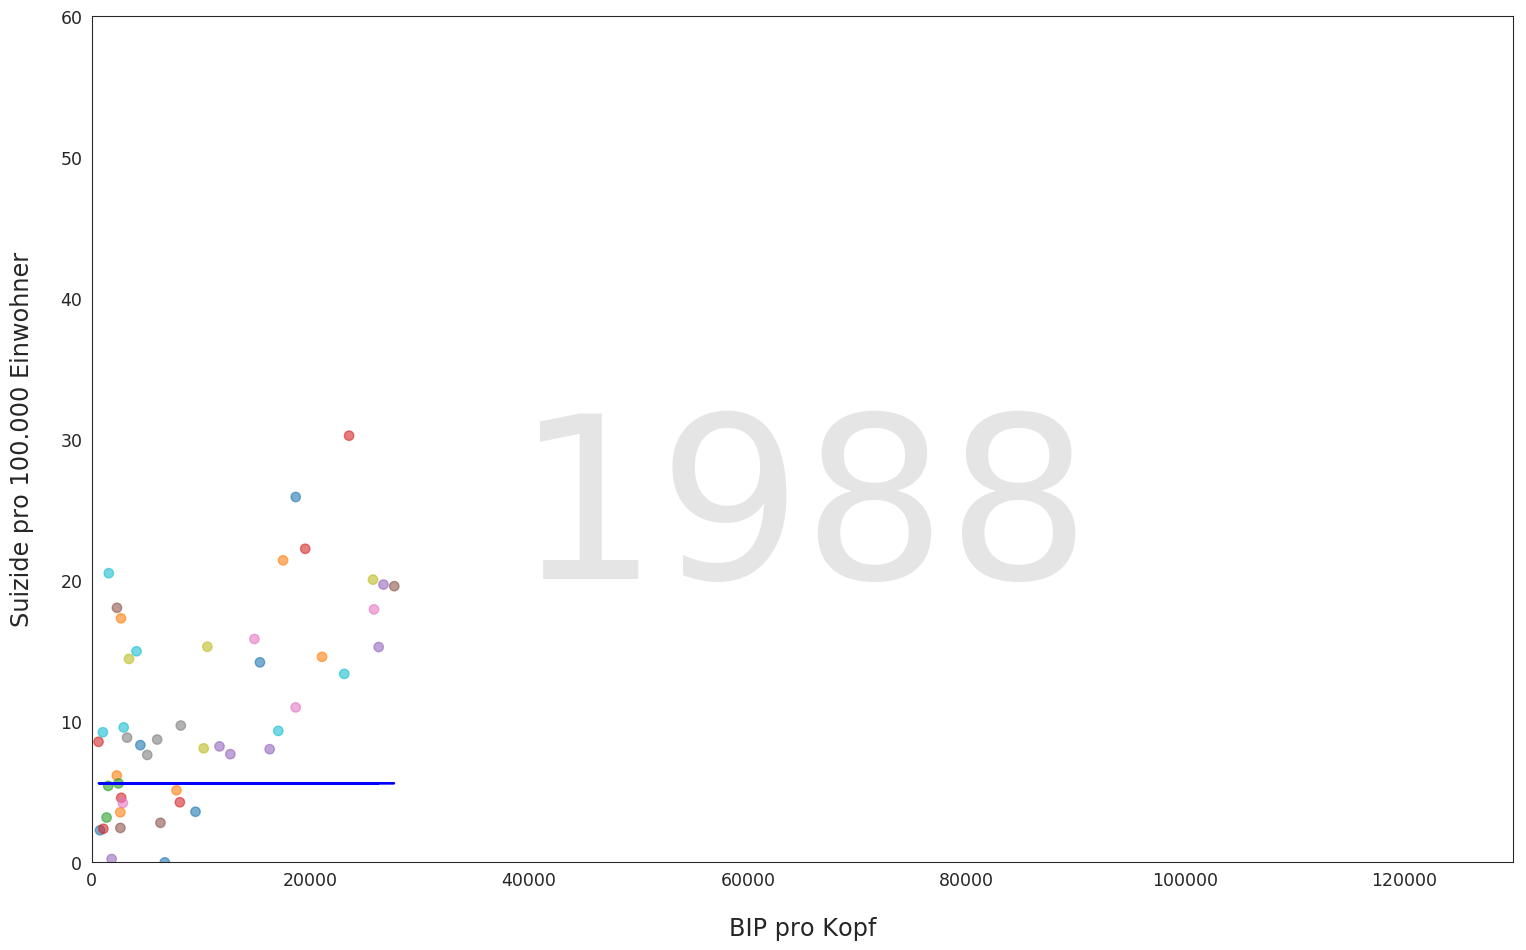

ß0: 6.788 ß1: 0.000
P-wert: 0.000 R2: 0.269


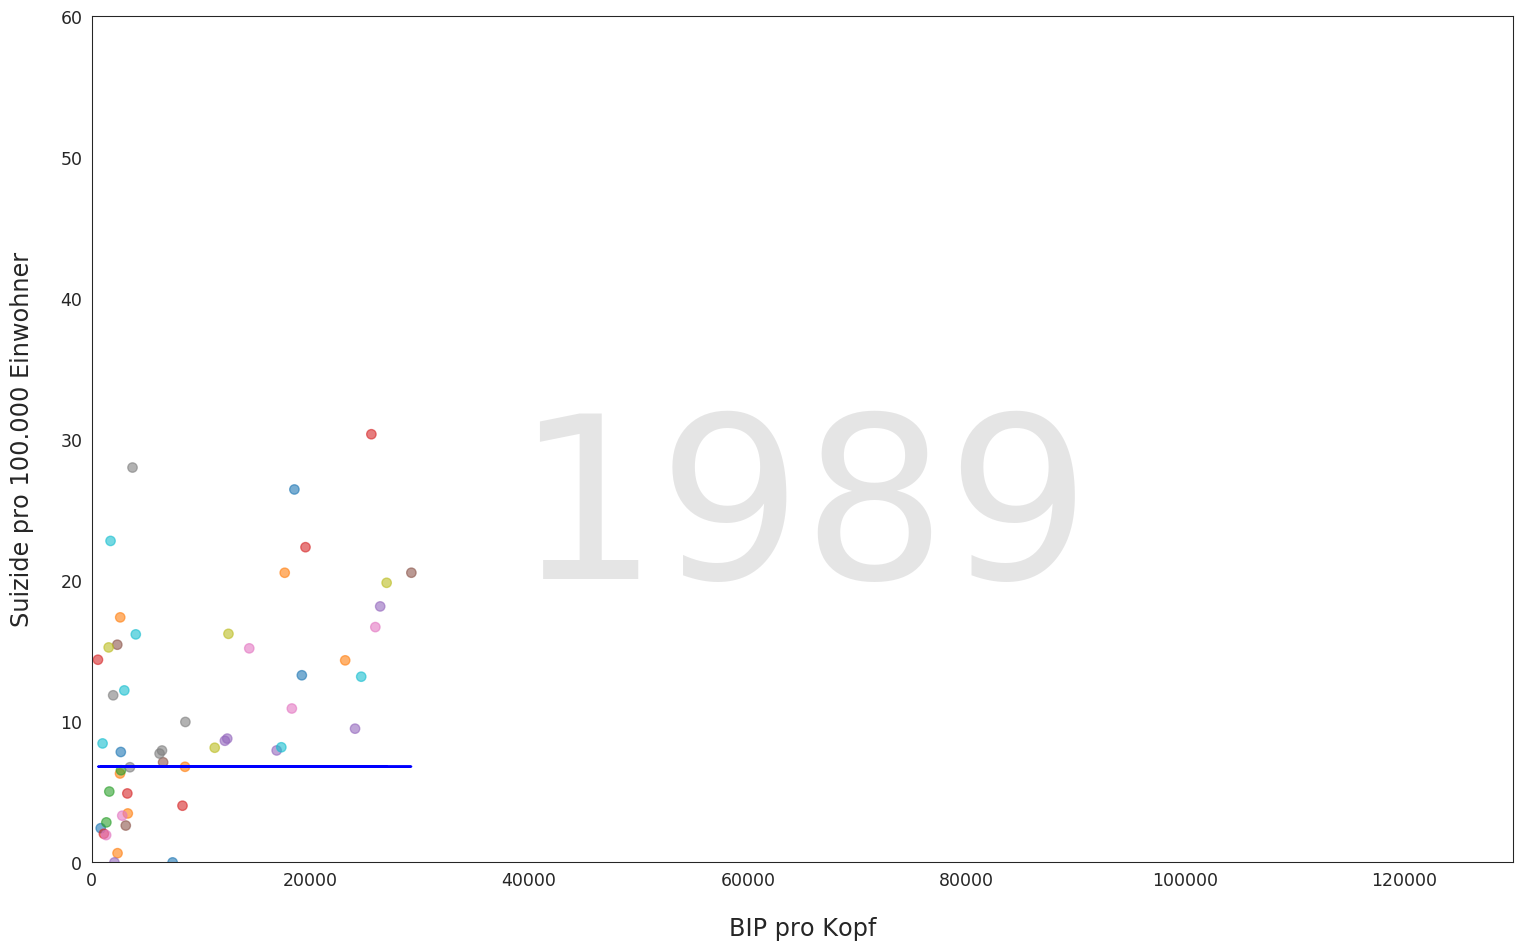

ß0: 7.563 ß1: 0.000
P-wert: 0.000 R2: 0.228


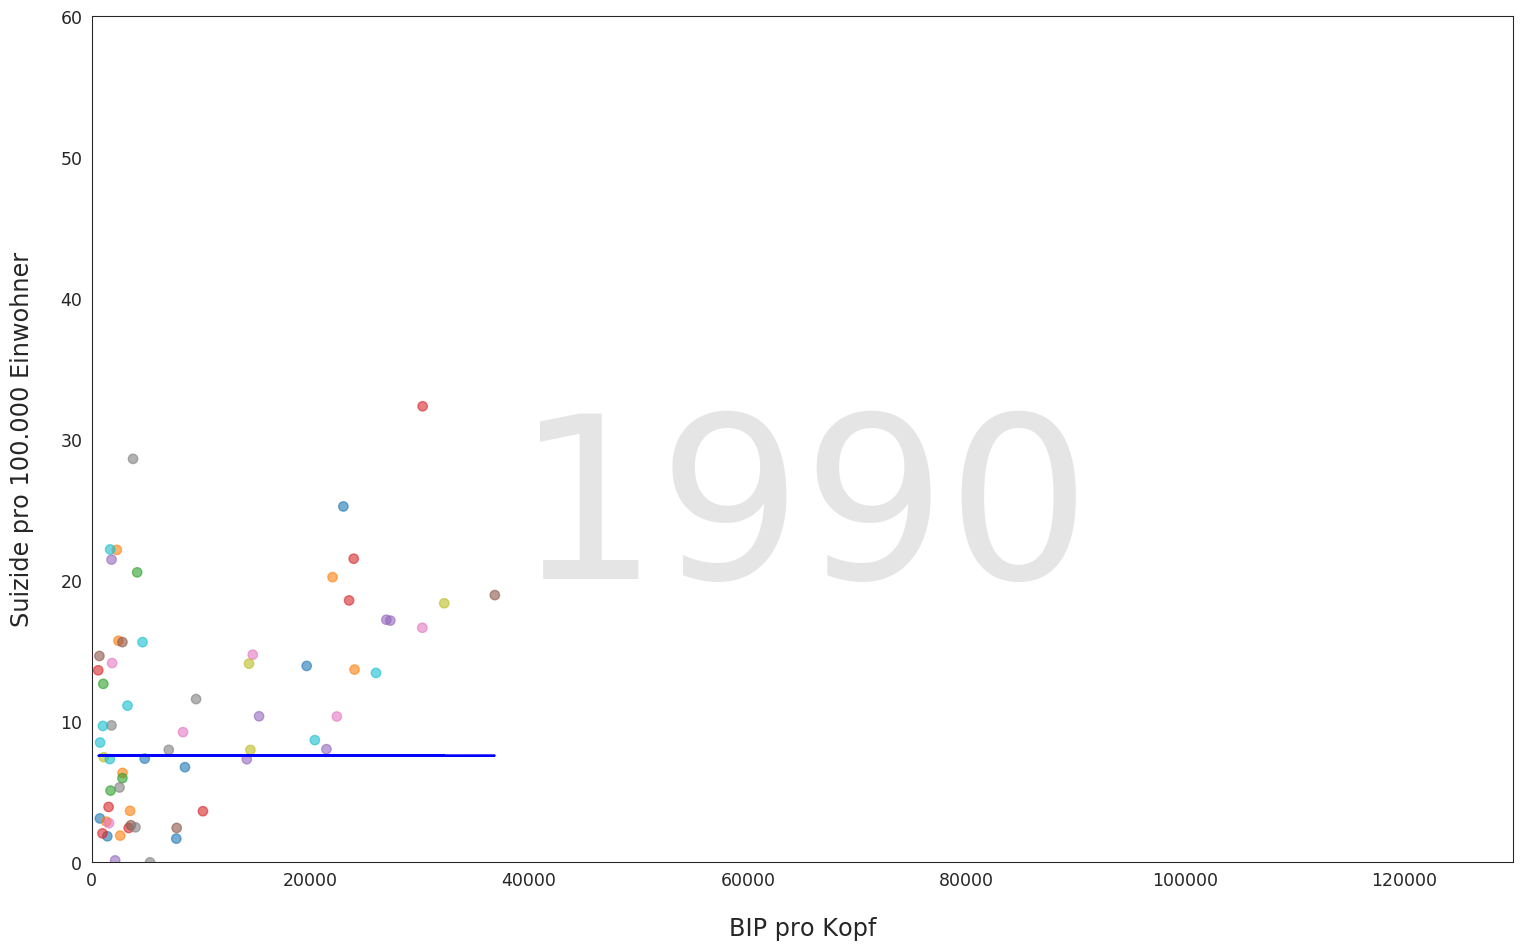

ß0: 8.802 ß1: 0.000
P-wert: 0.005 R2: 0.123


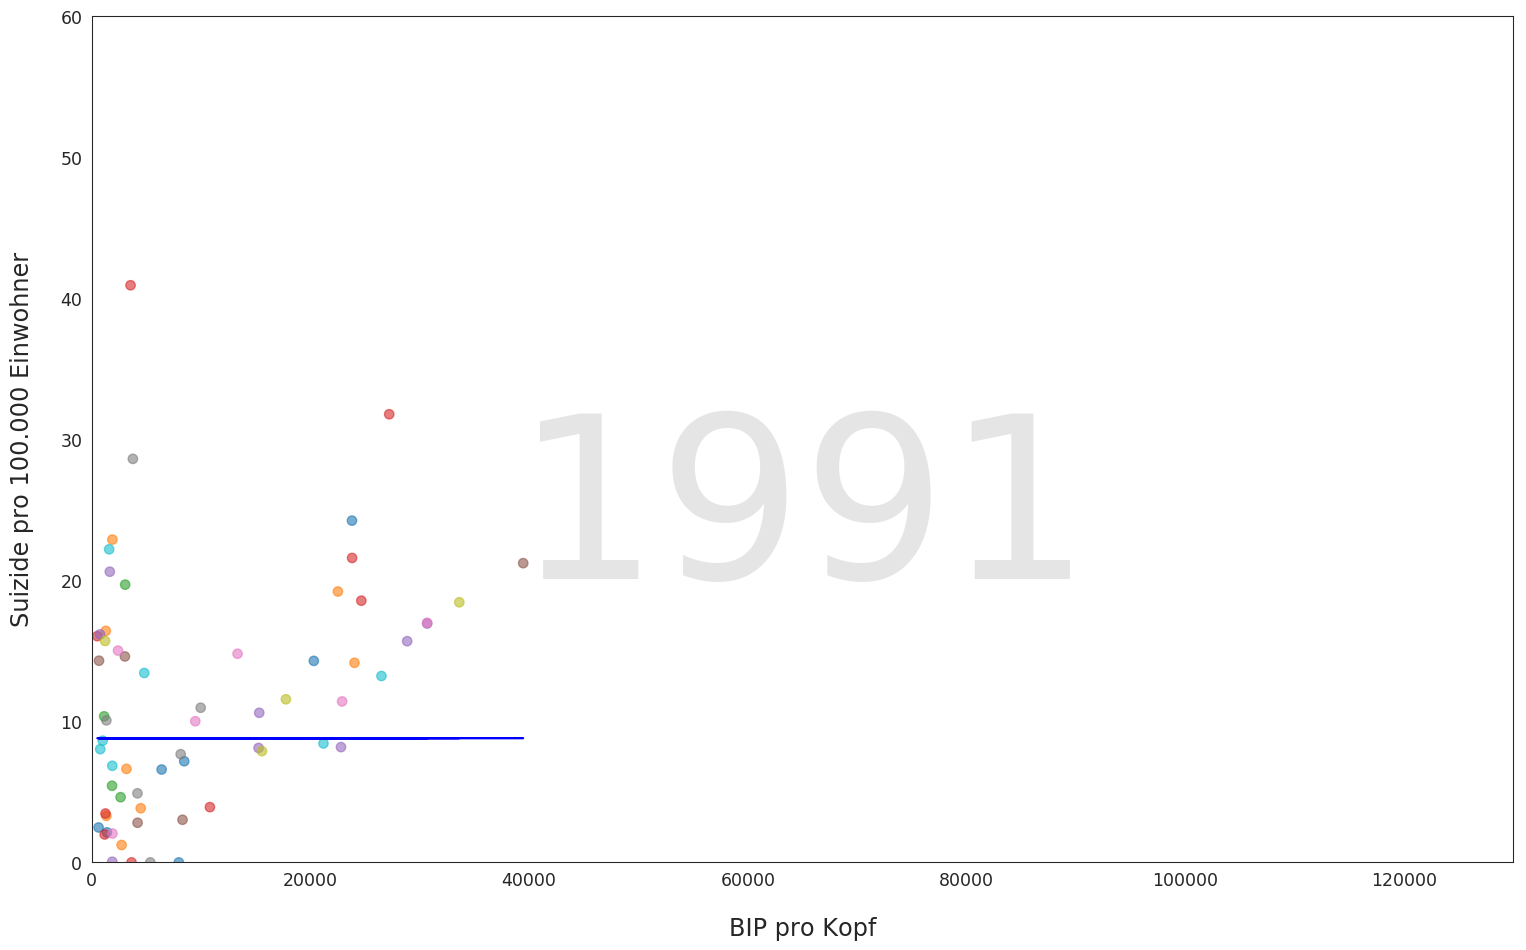

ß0: 9.922 ß1: 0.000
P-wert: 0.049 R2: 0.060


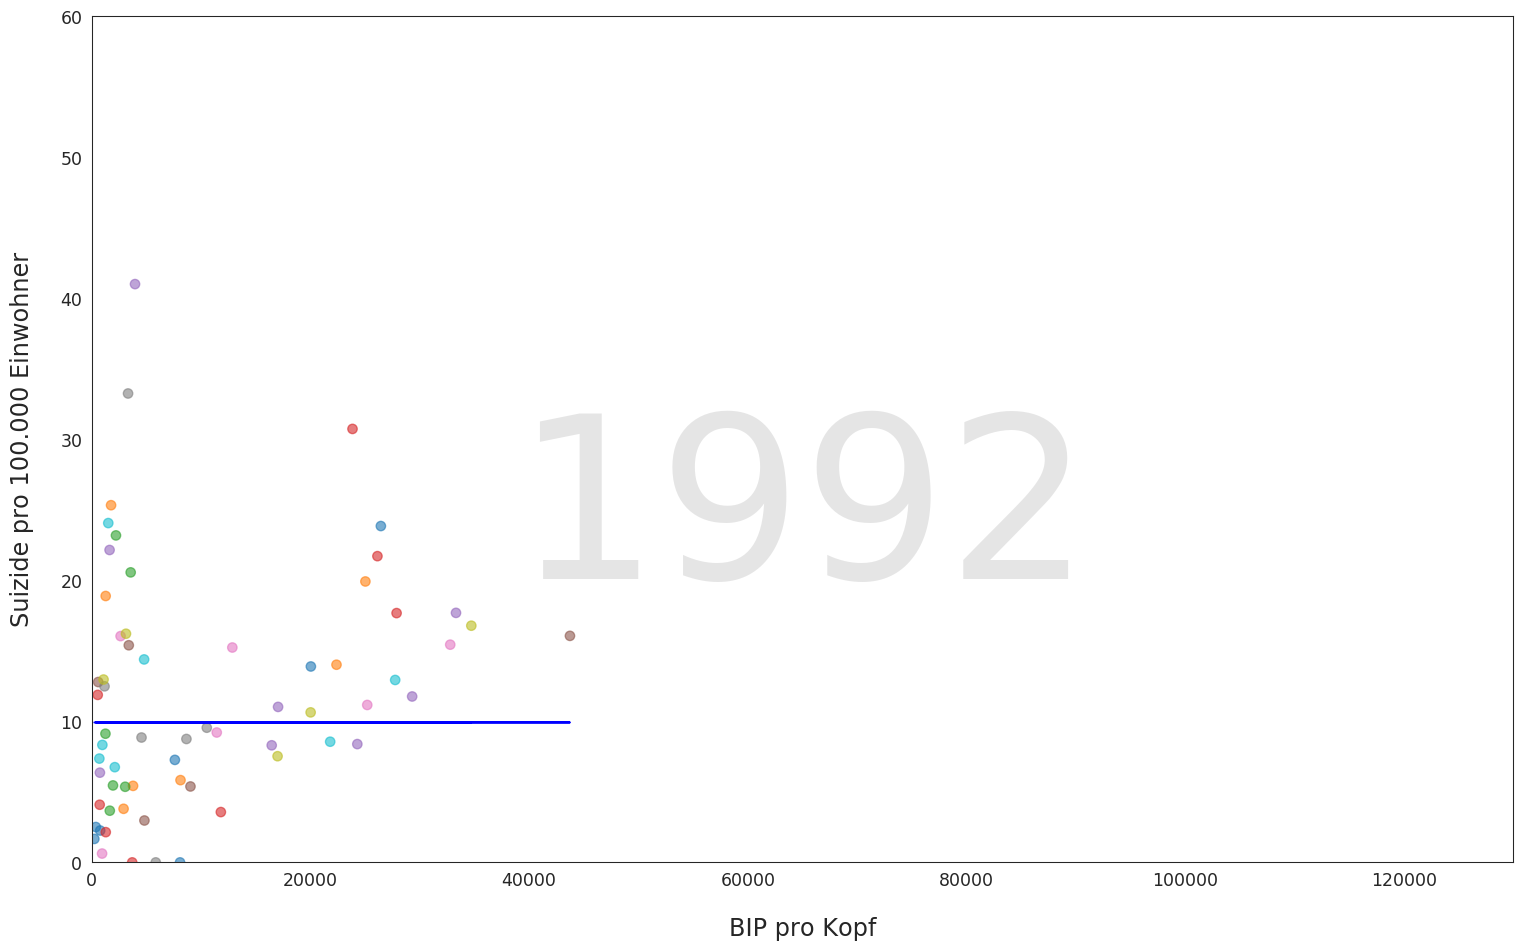

ß0: 10.962 ß1: 0.000
P-wert: 0.258 R2: 0.020


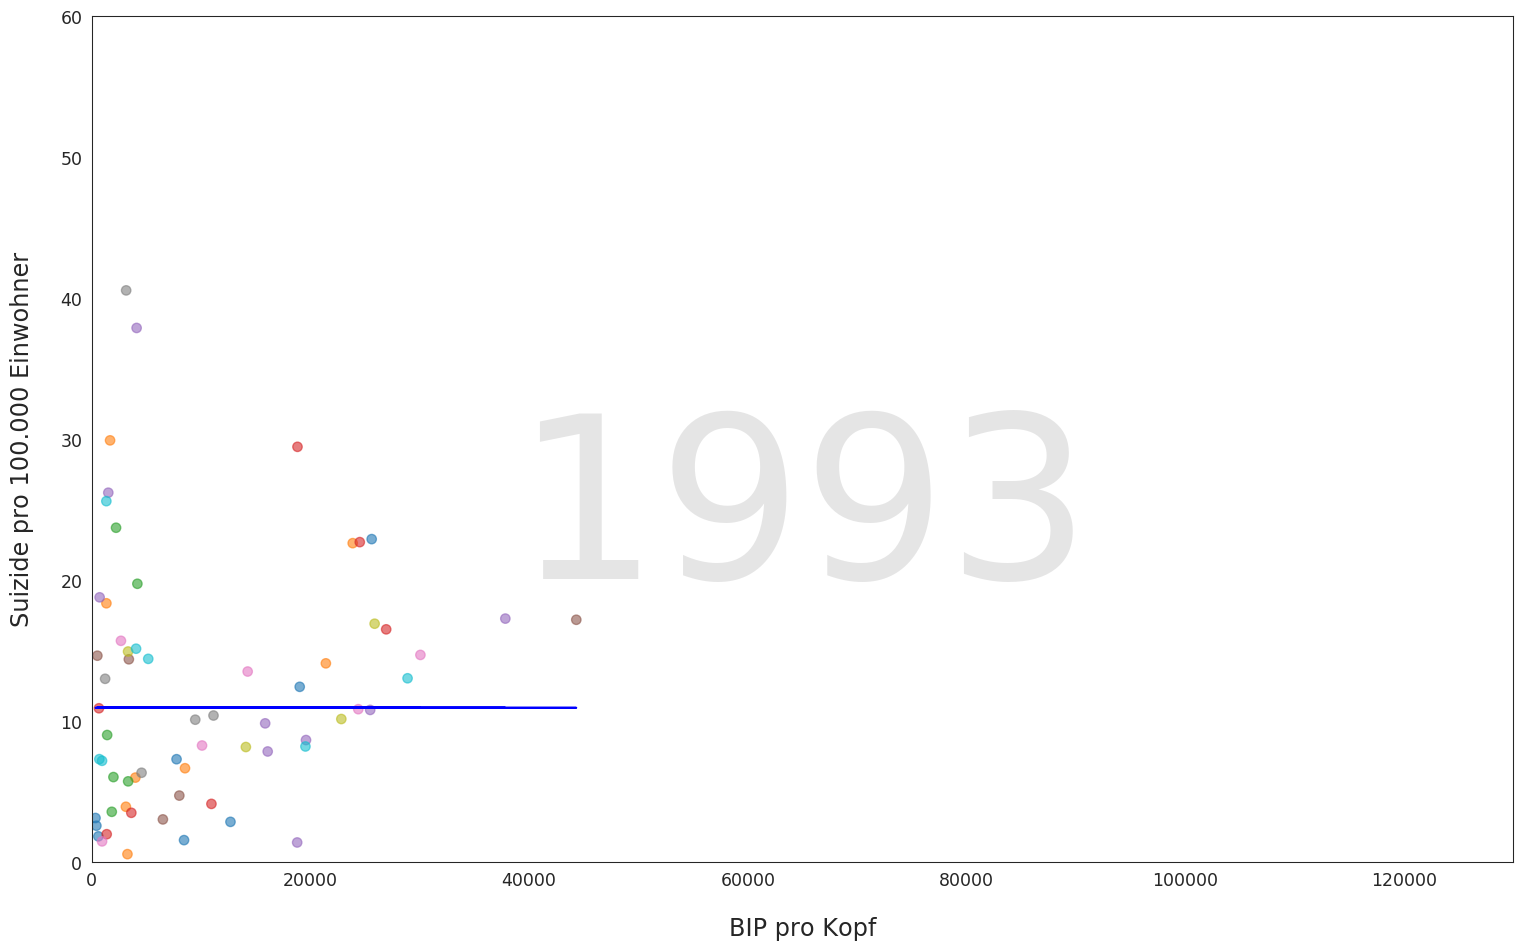

ß0: 10.461 ß1: 0.000
P-wert: 0.133 R2: 0.034


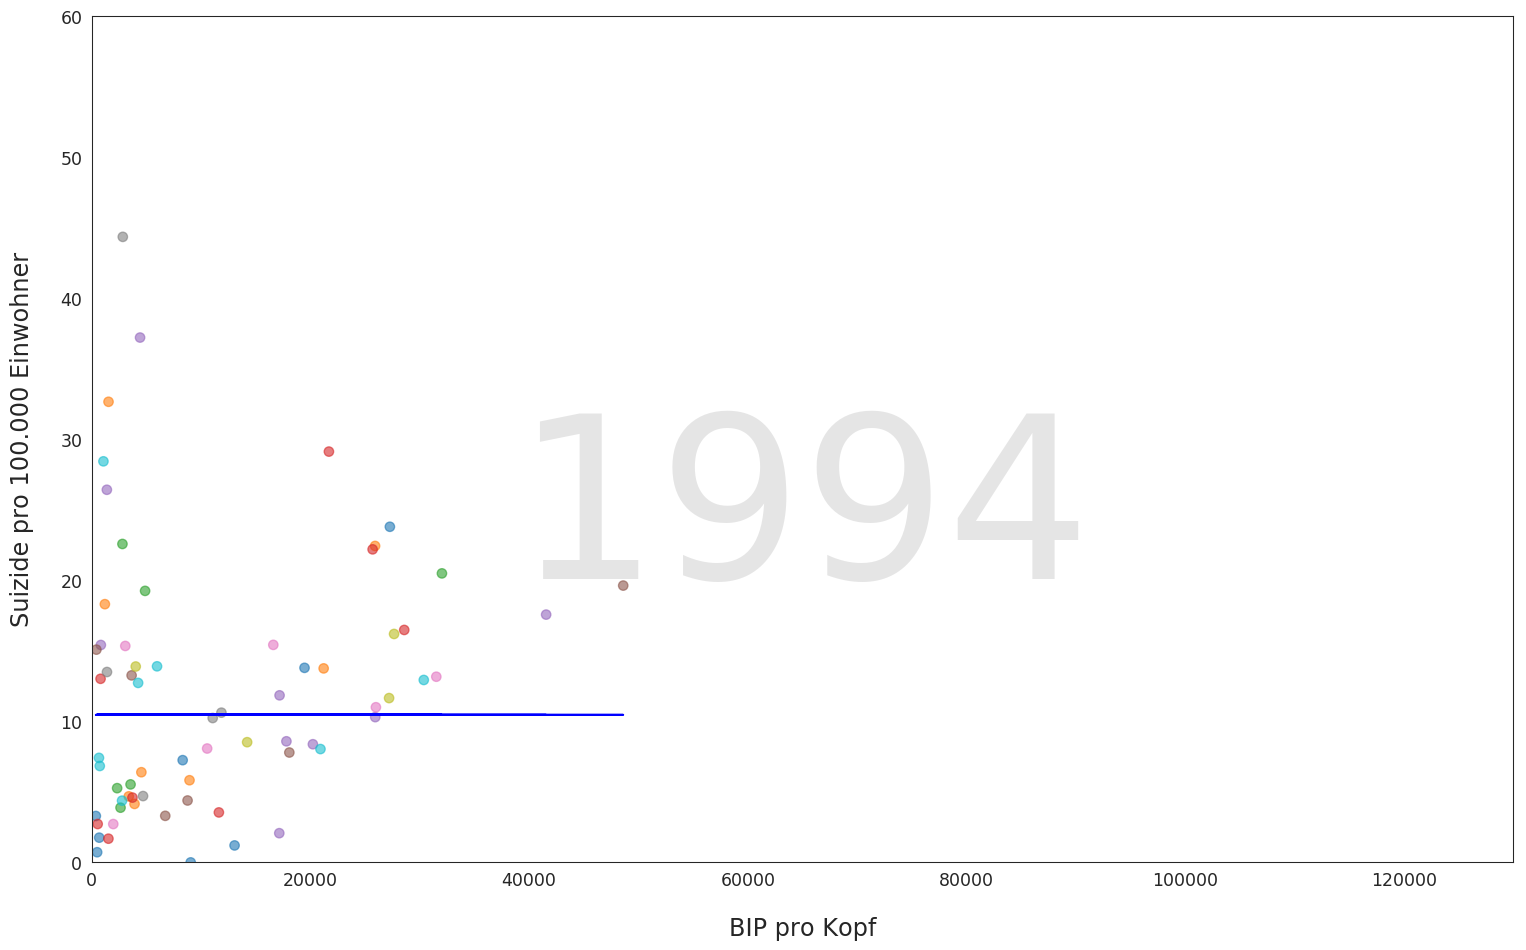

ß0: 13.199 ß1: 0.000
P-wert: 0.604 R2: 0.004


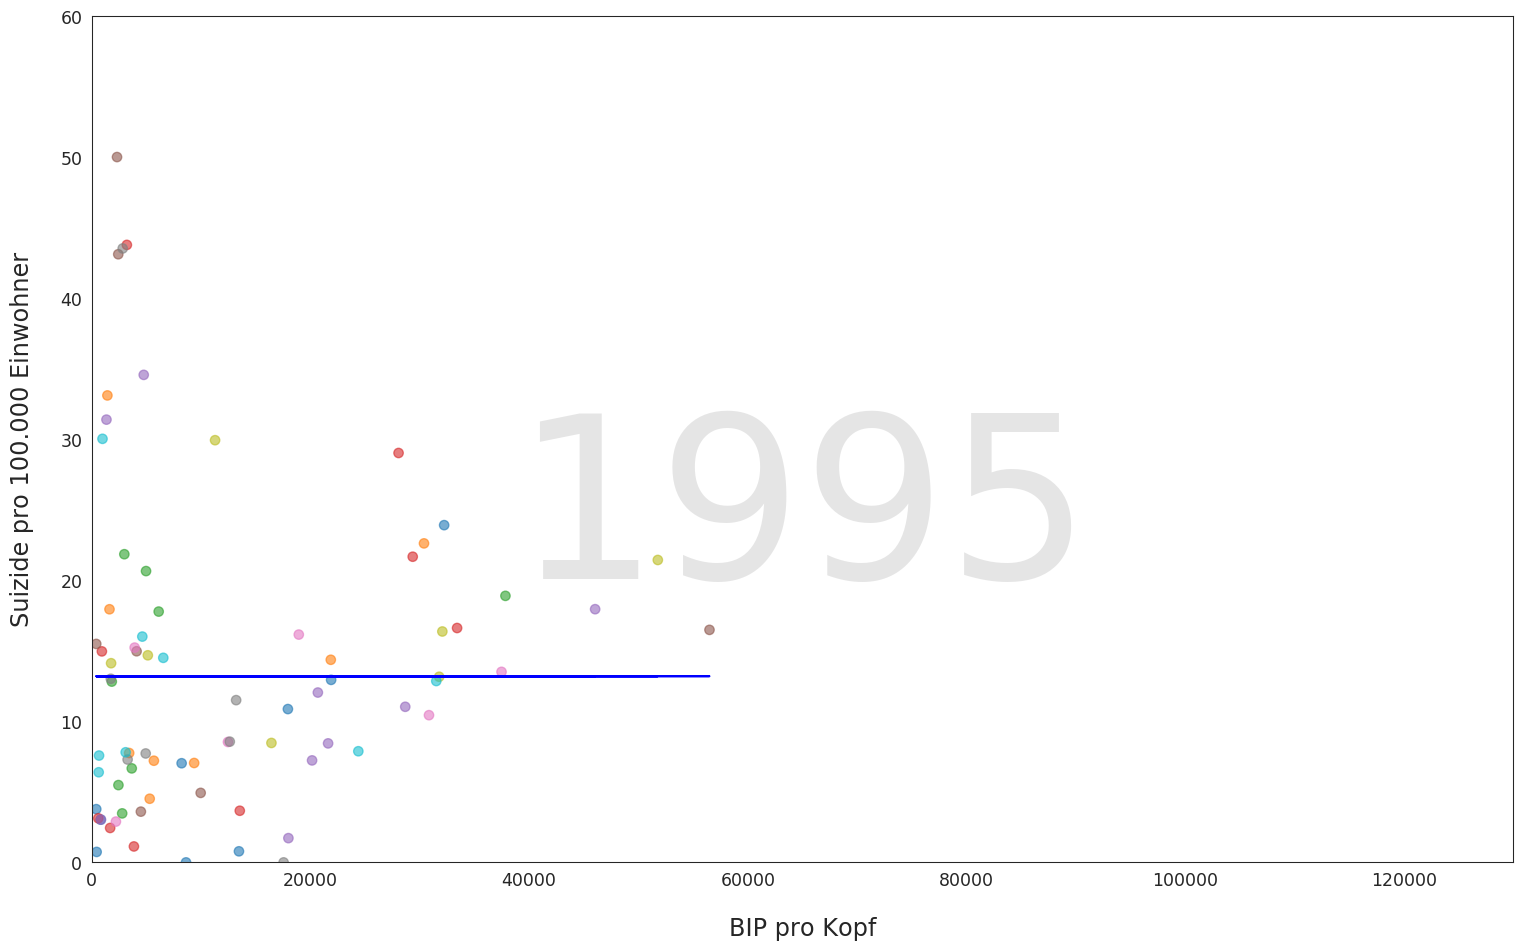

ß0: 13.247 ß1: 0.000
P-wert: 0.635 R2: 0.003


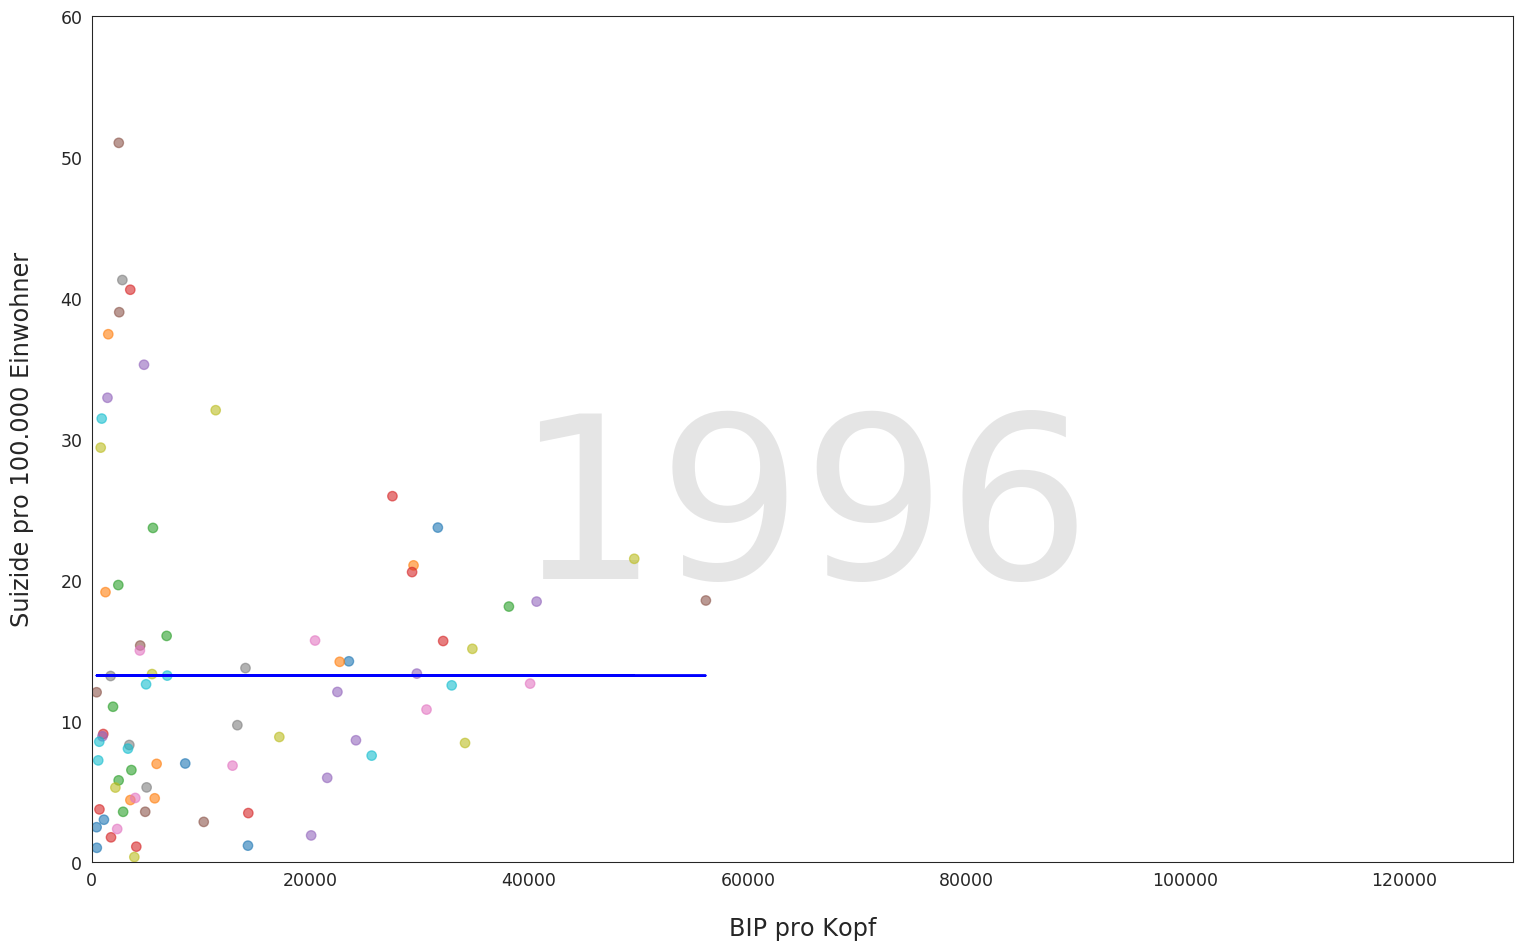

ß0: 12.939 ß1: 0.000
P-wert: 0.658 R2: 0.003


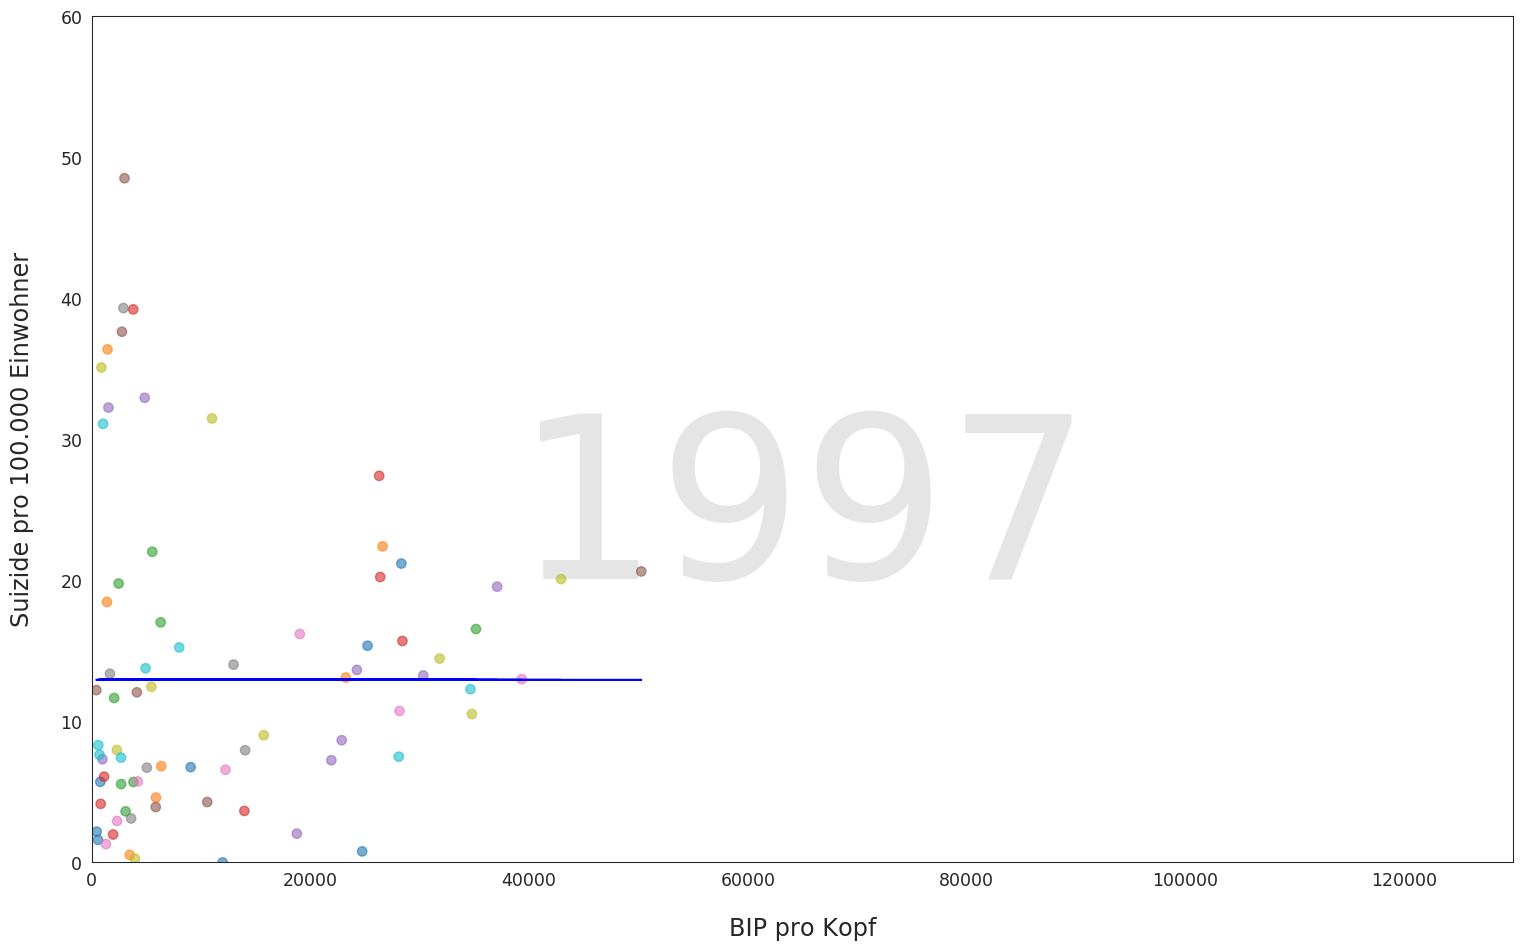

ß0: 13.161 ß1: 0.000
P-wert: 0.753 R2: 0.001


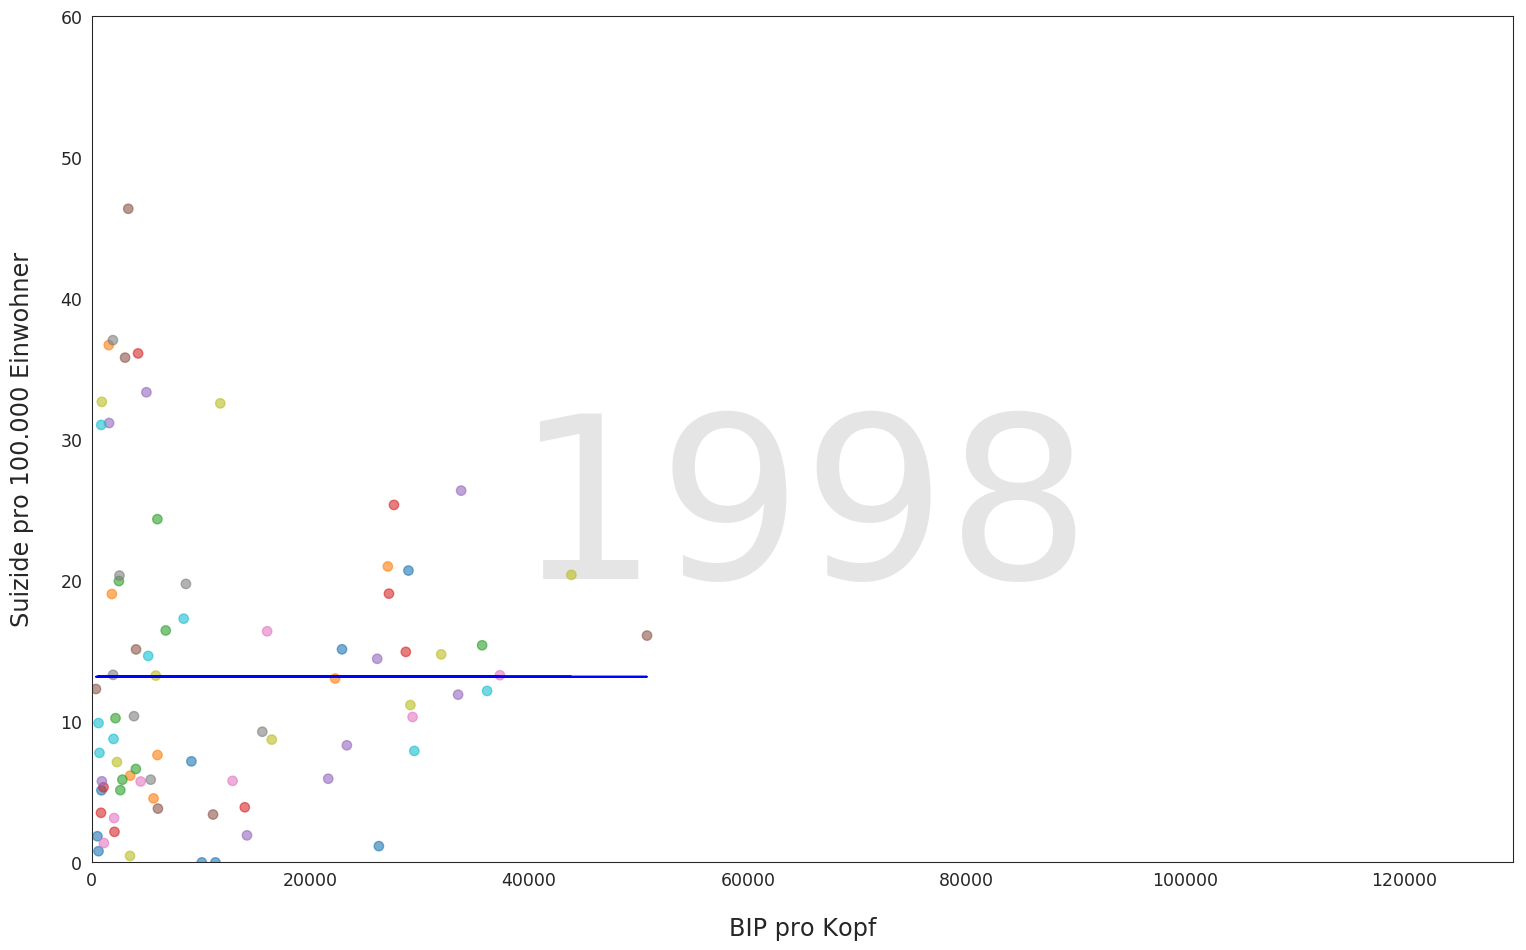

ß0: 13.505 ß1: -0.000
P-wert: 0.907 R2: 0.000


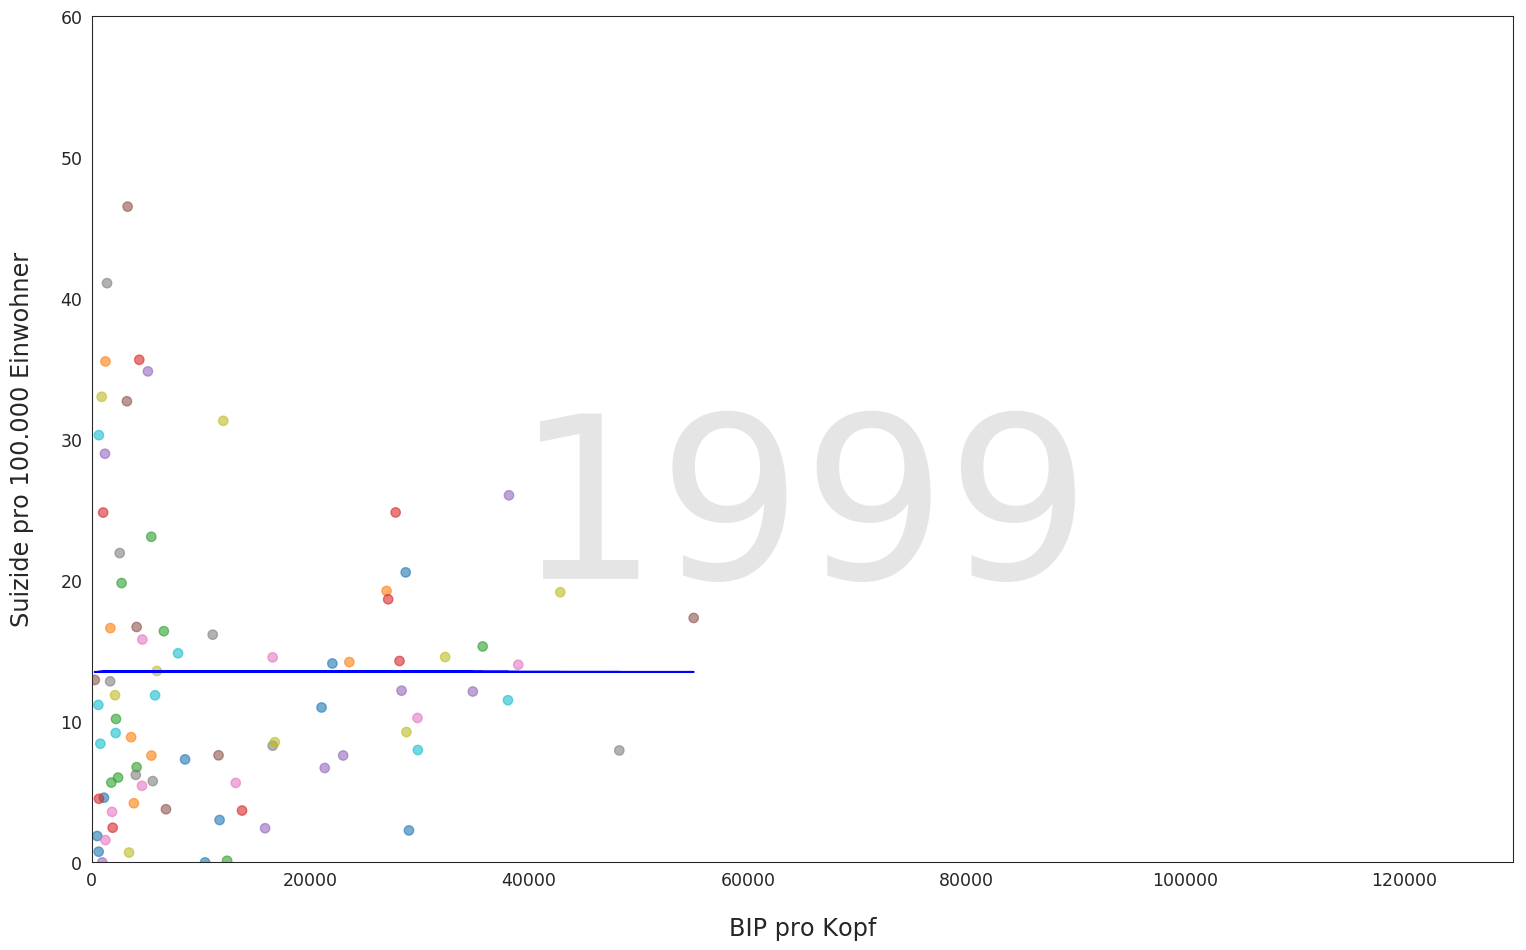

ß0: 12.488 ß1: 0.000
P-wert: 0.855 R2: 0.000


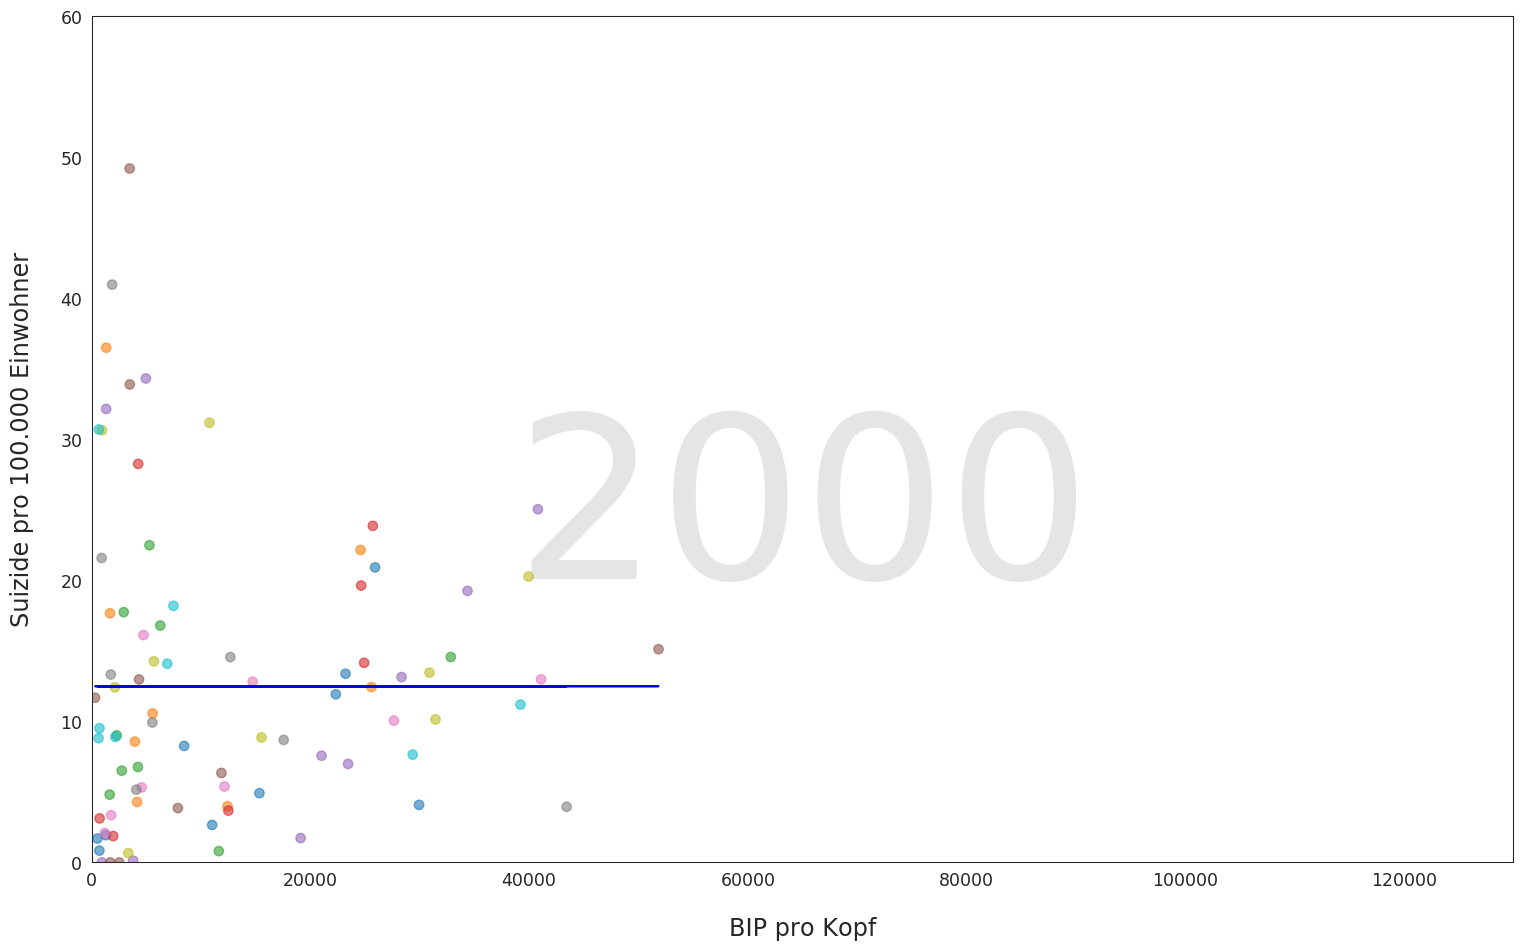

ß0: 12.331 ß1: 0.000
P-wert: 0.893 R2: 0.000


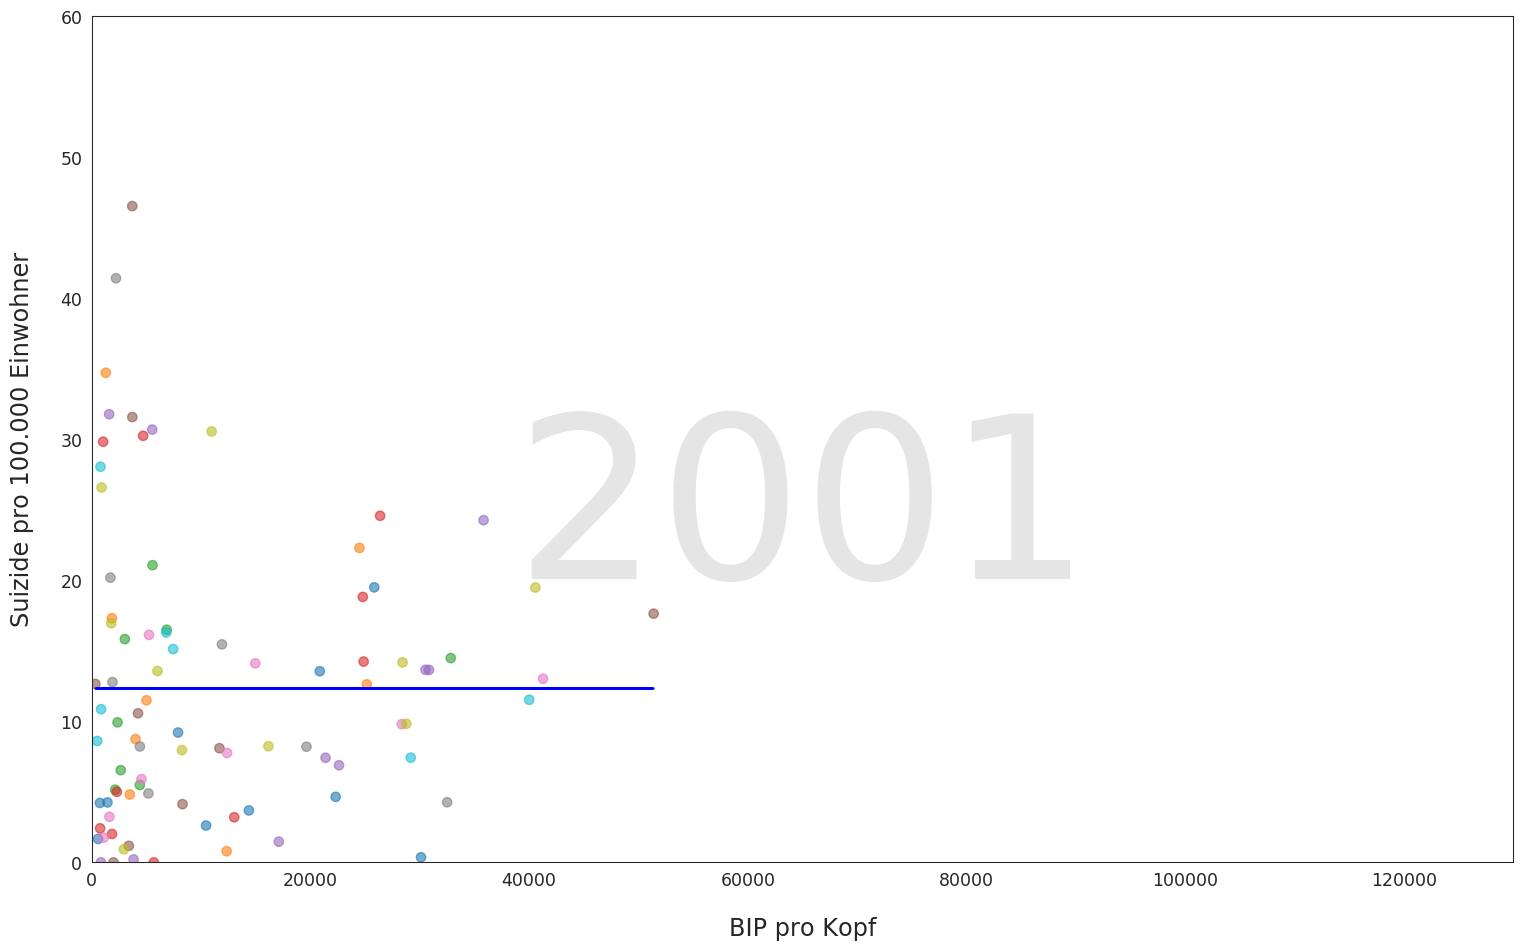

ß0: 12.258 ß1: 0.000
P-wert: 0.706 R2: 0.002


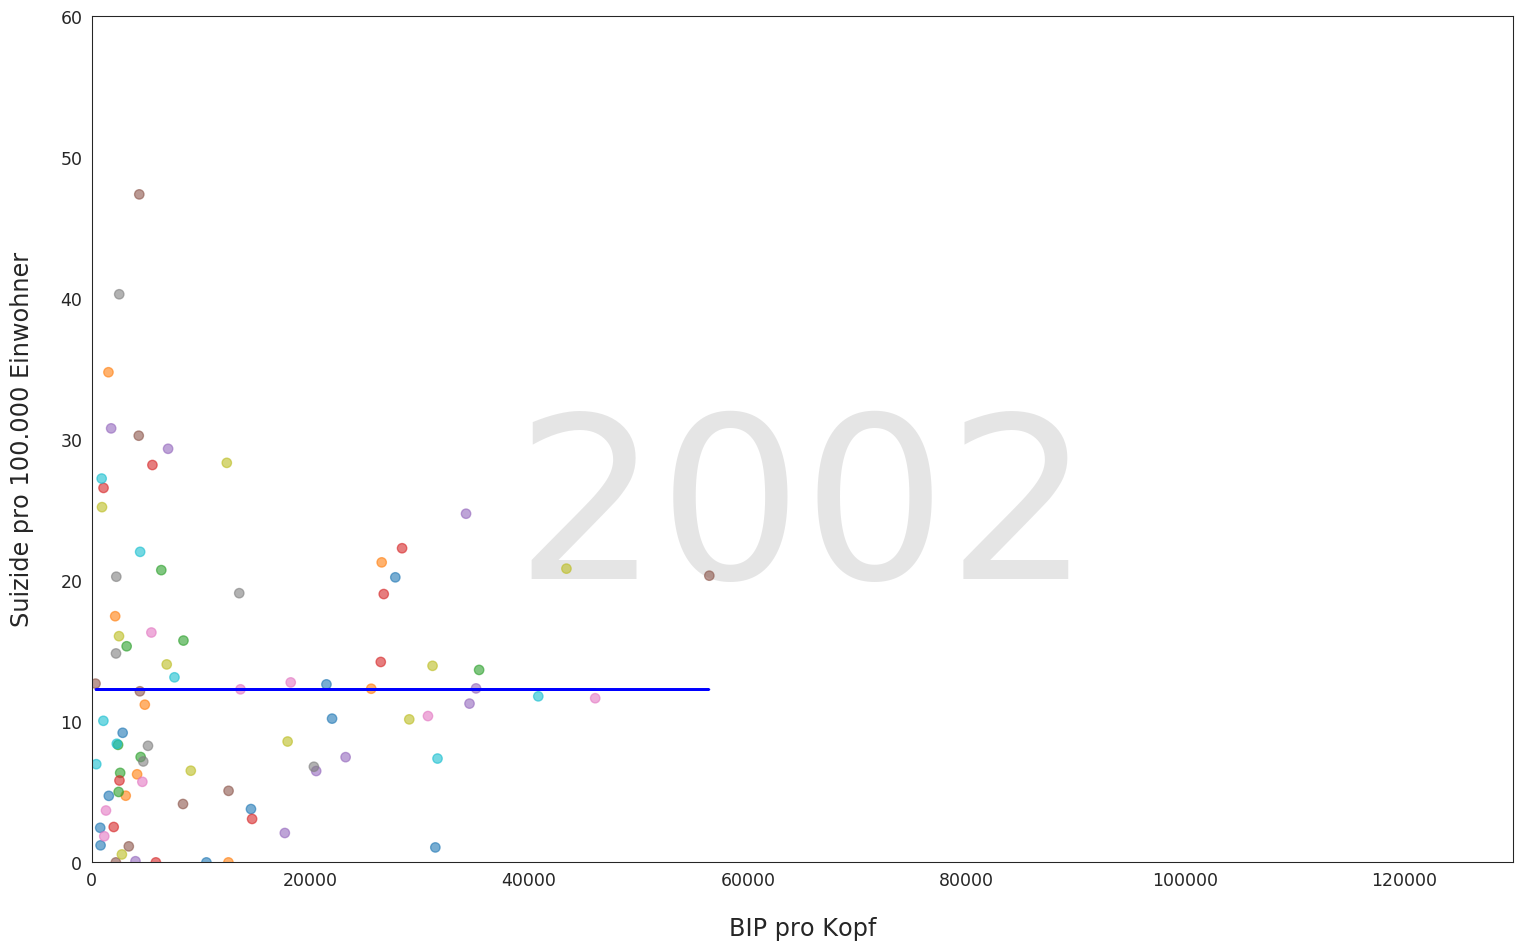

ß0: 12.072 ß1: 0.000
P-wert: 0.850 R2: 0.000


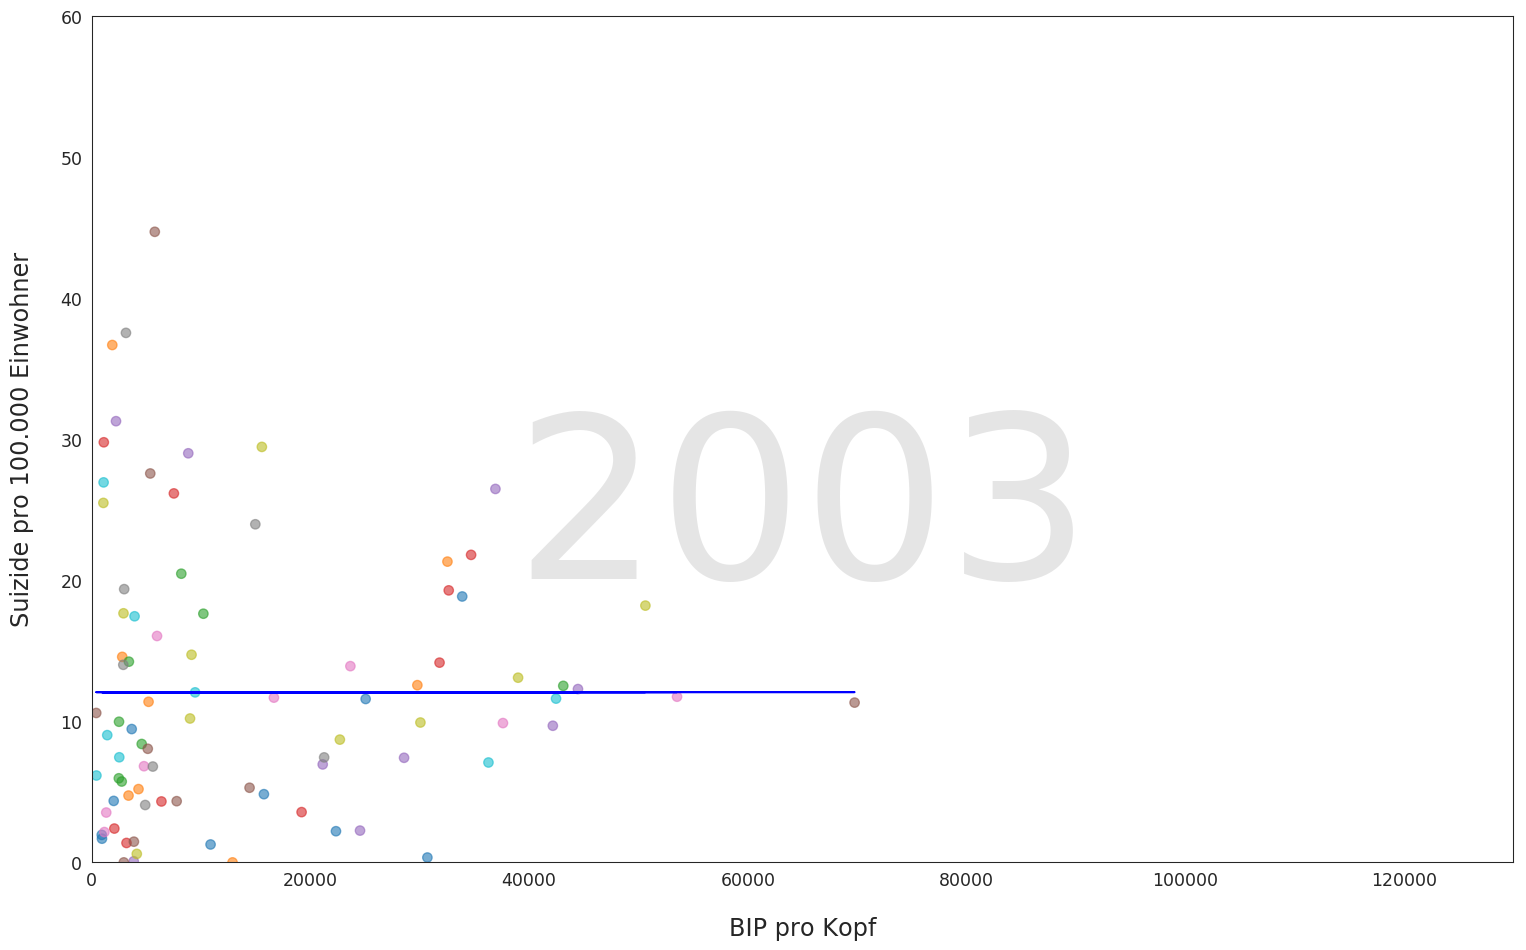

ß0: 10.955 ß1: 0.000
P-wert: 0.487 R2: 0.006


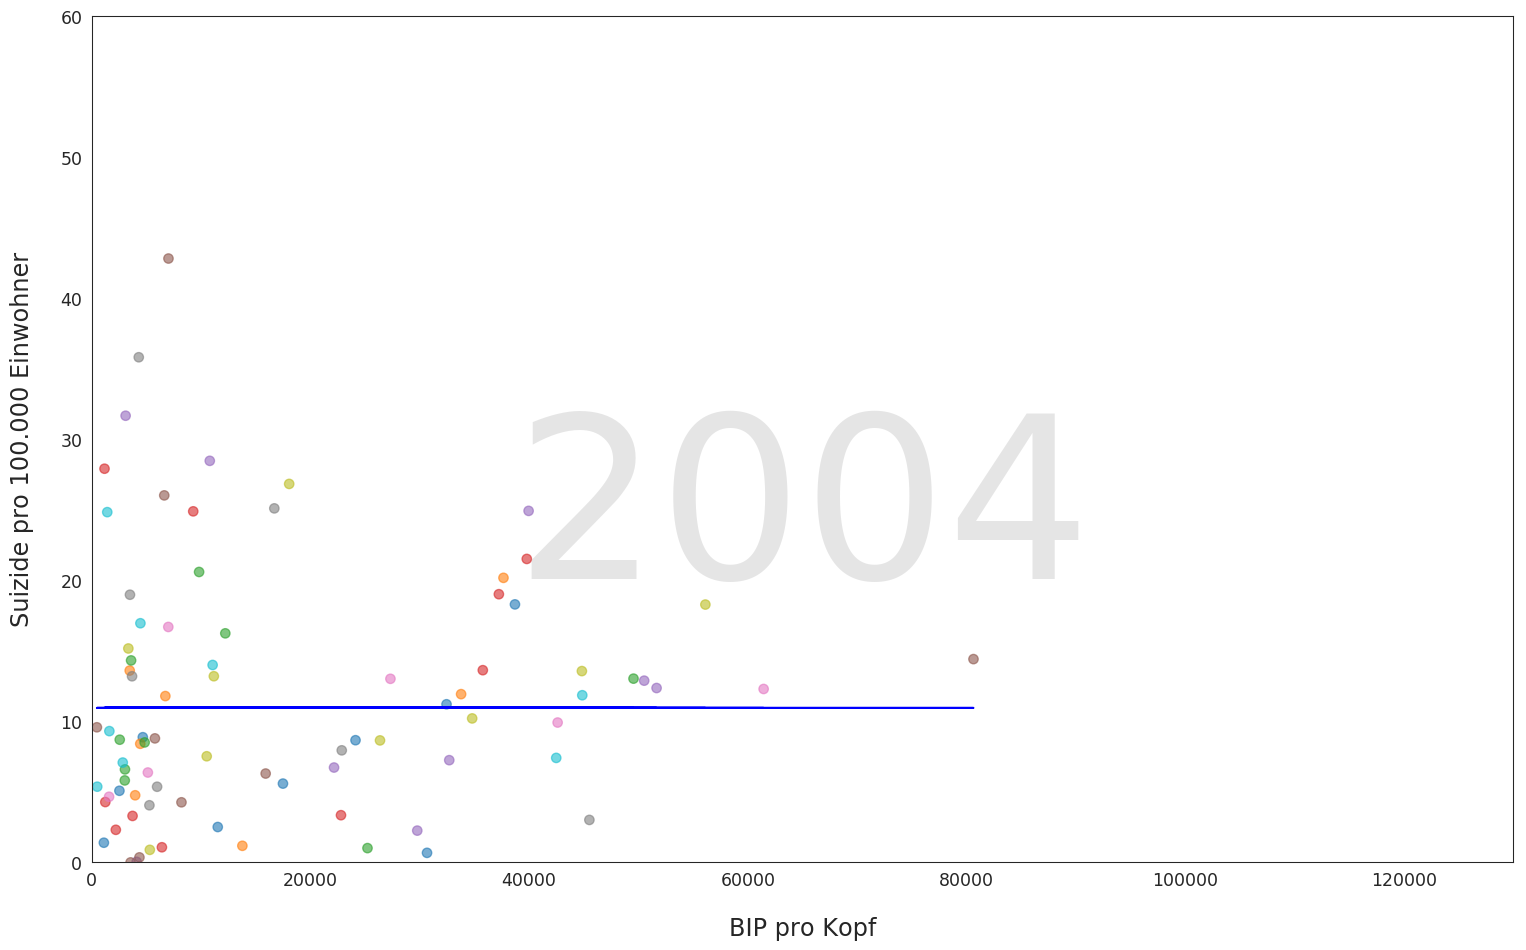

ß0: 11.484 ß1: -0.000
P-wert: 0.960 R2: 0.000


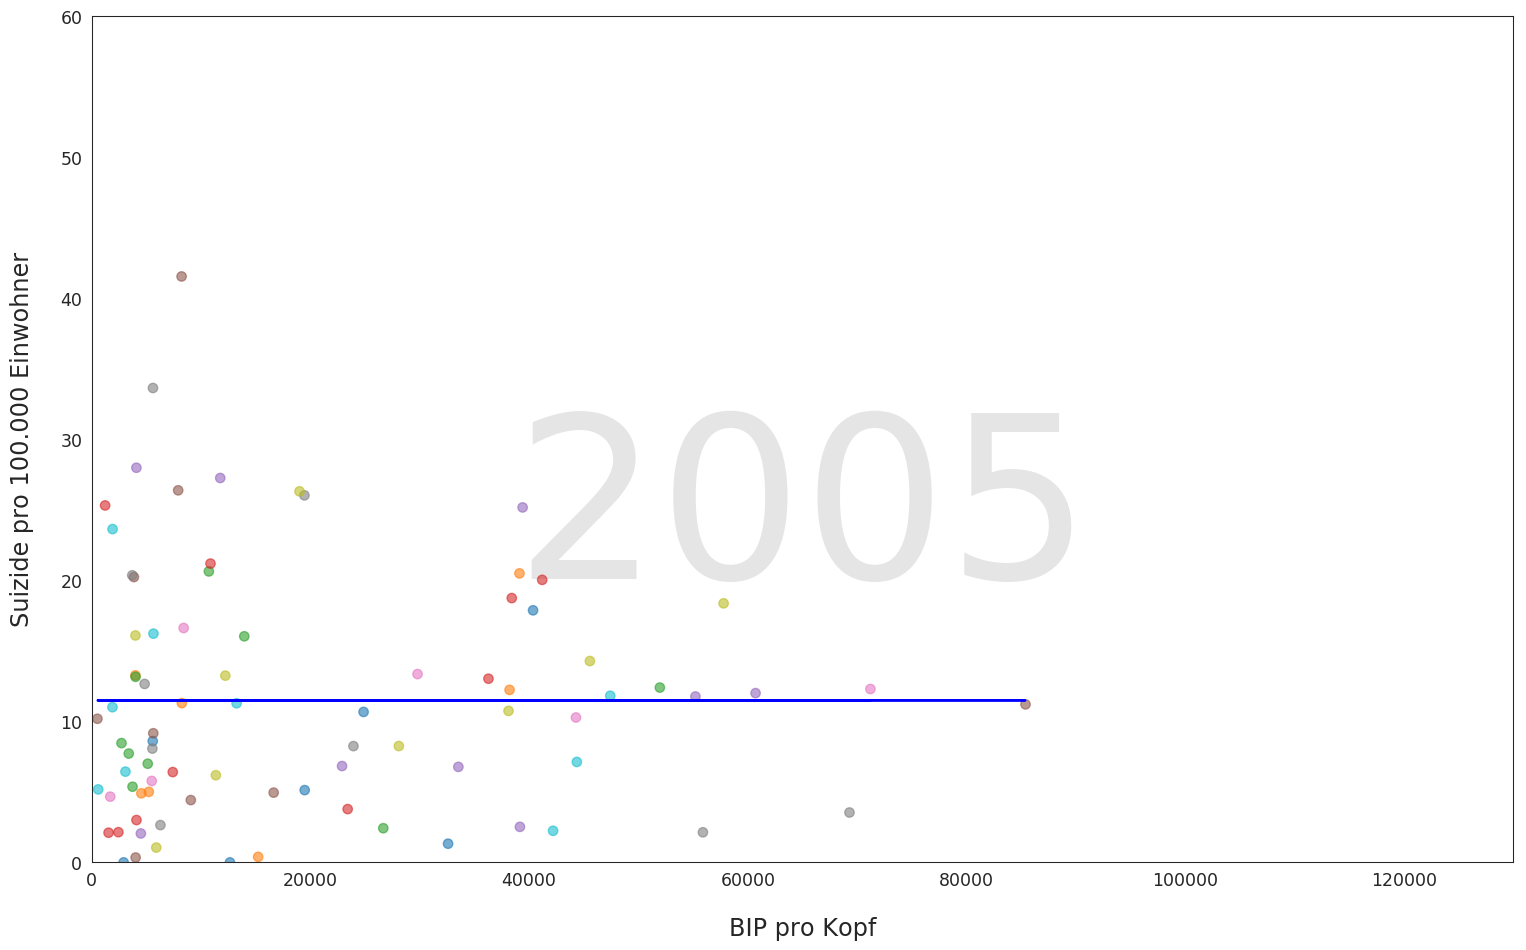

ß0: 10.658 ß1: 0.000
P-wert: 0.652 R2: 0.002


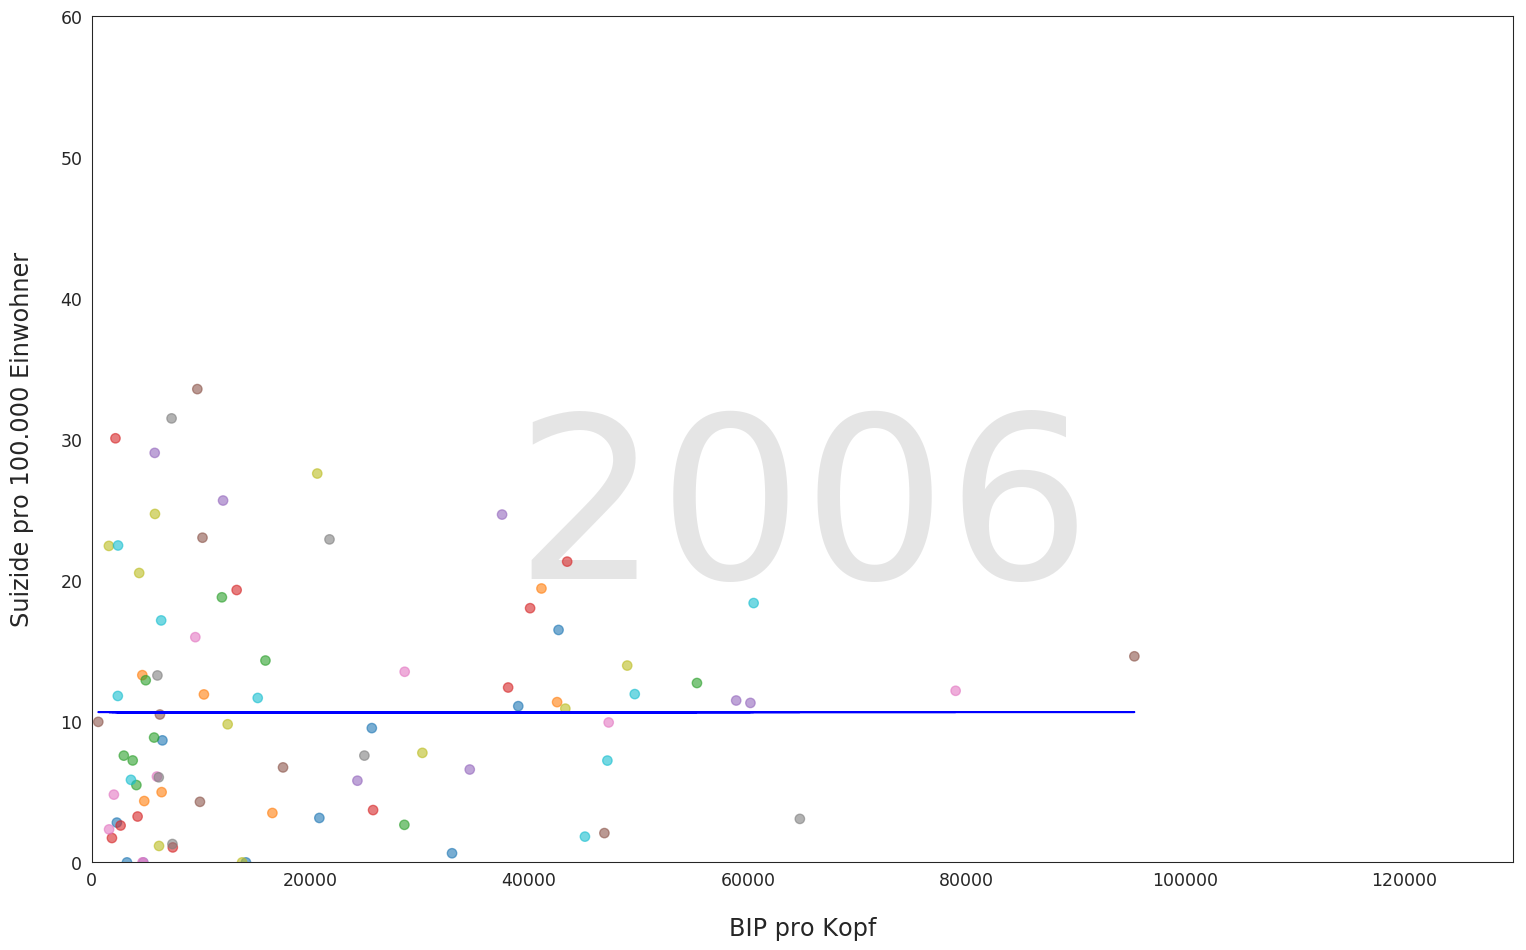

ß0: 10.755 ß1: 0.000
P-wert: 0.614 R2: 0.003


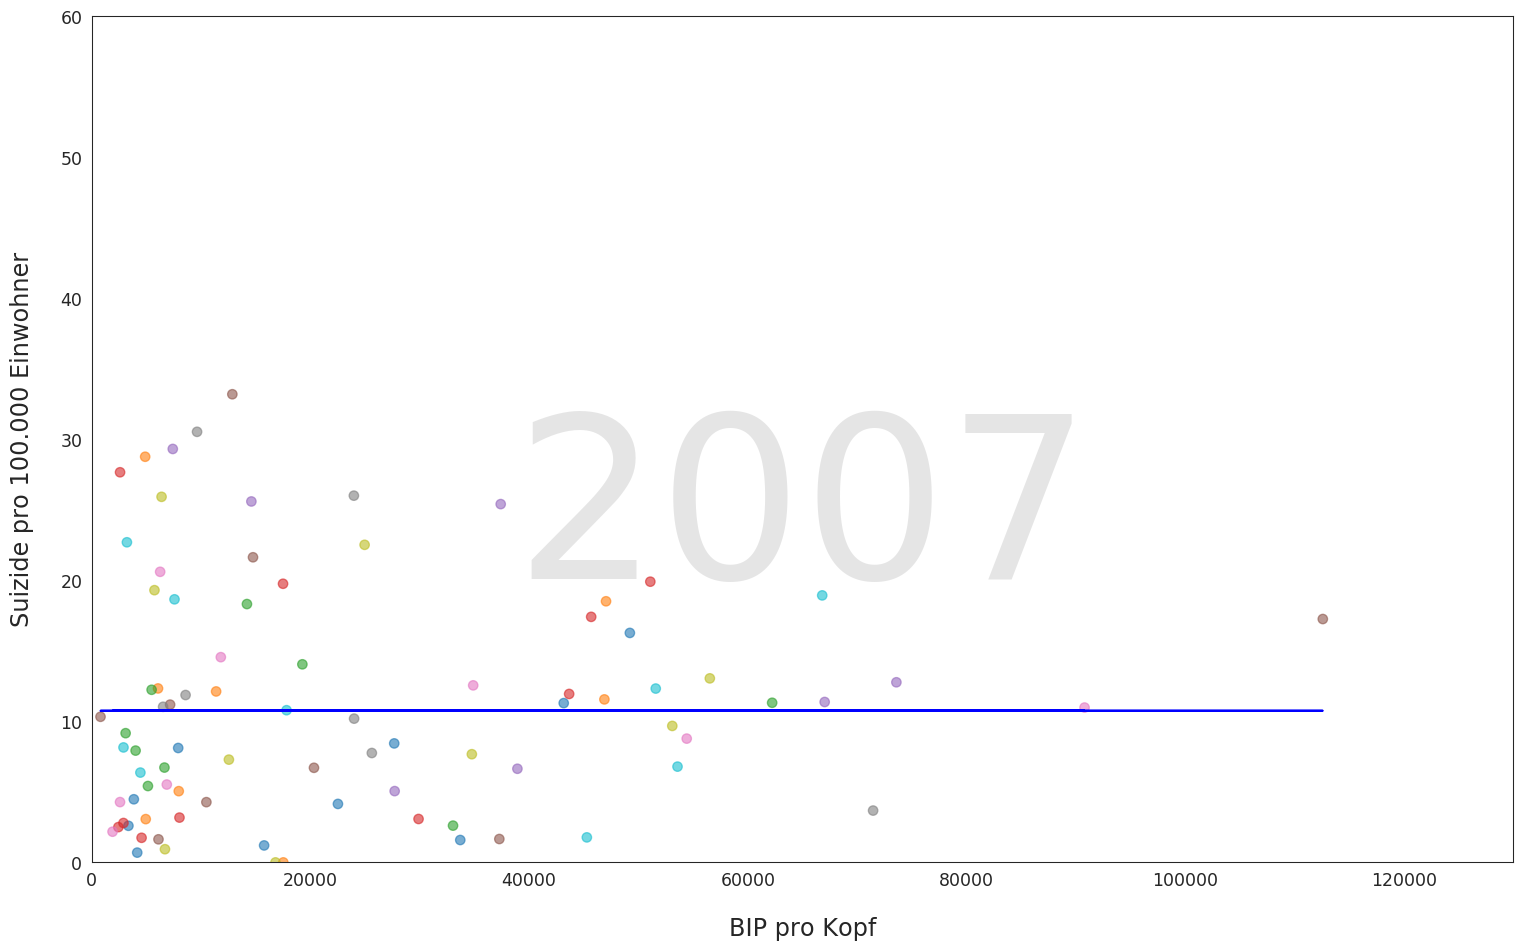

ß0: 11.327 ß1: 0.000
P-wert: 0.936 R2: 0.000


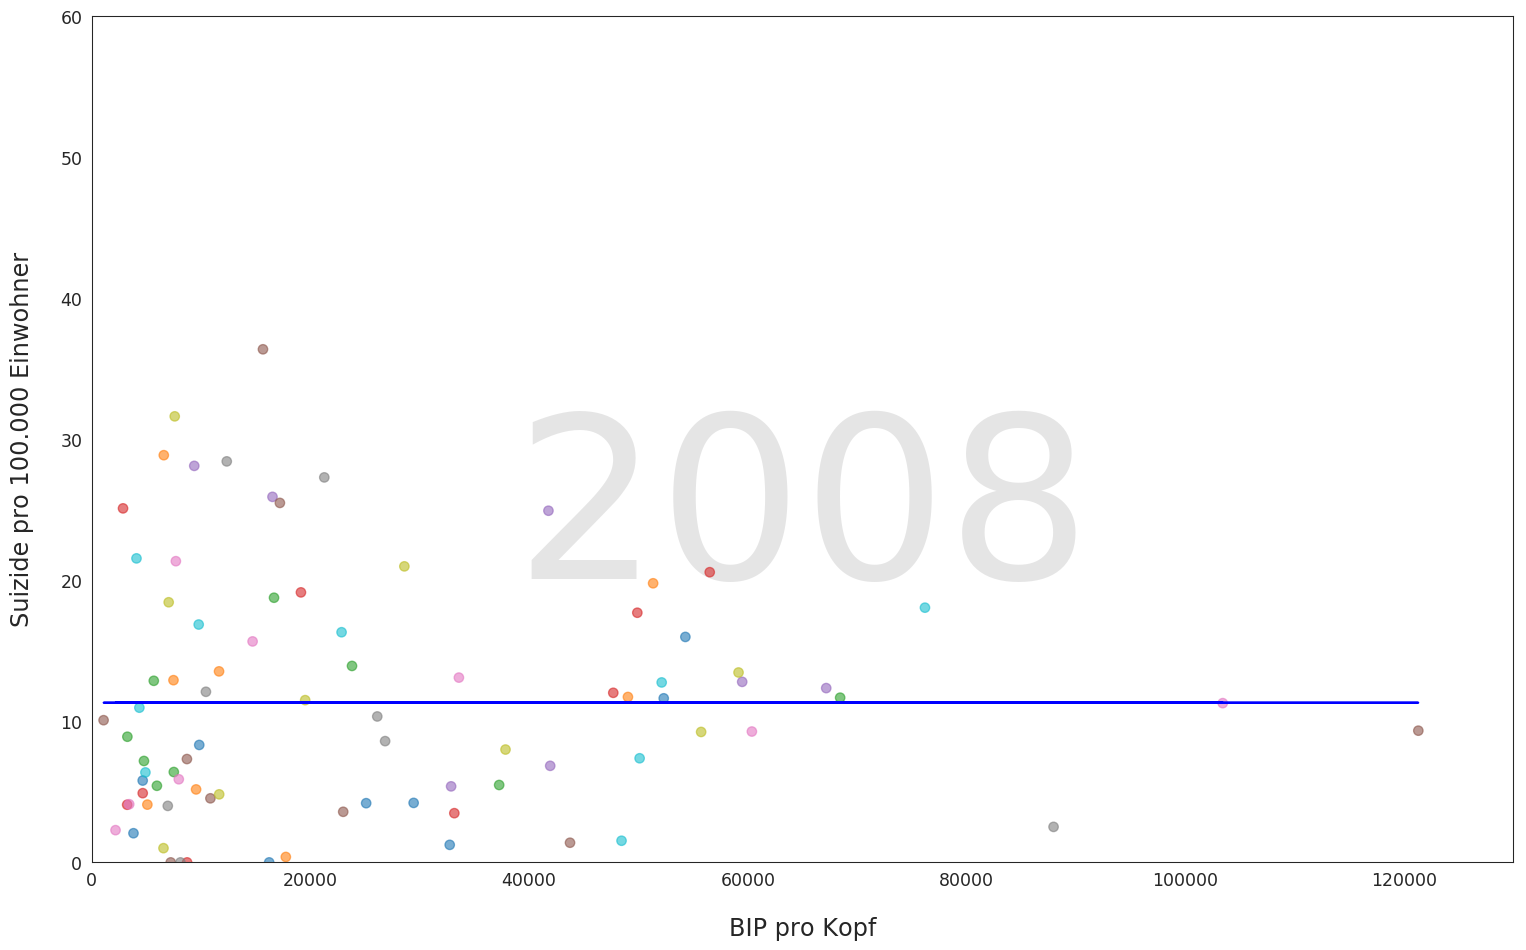

ß0: 10.532 ß1: 0.000
P-wert: 0.548 R2: 0.004


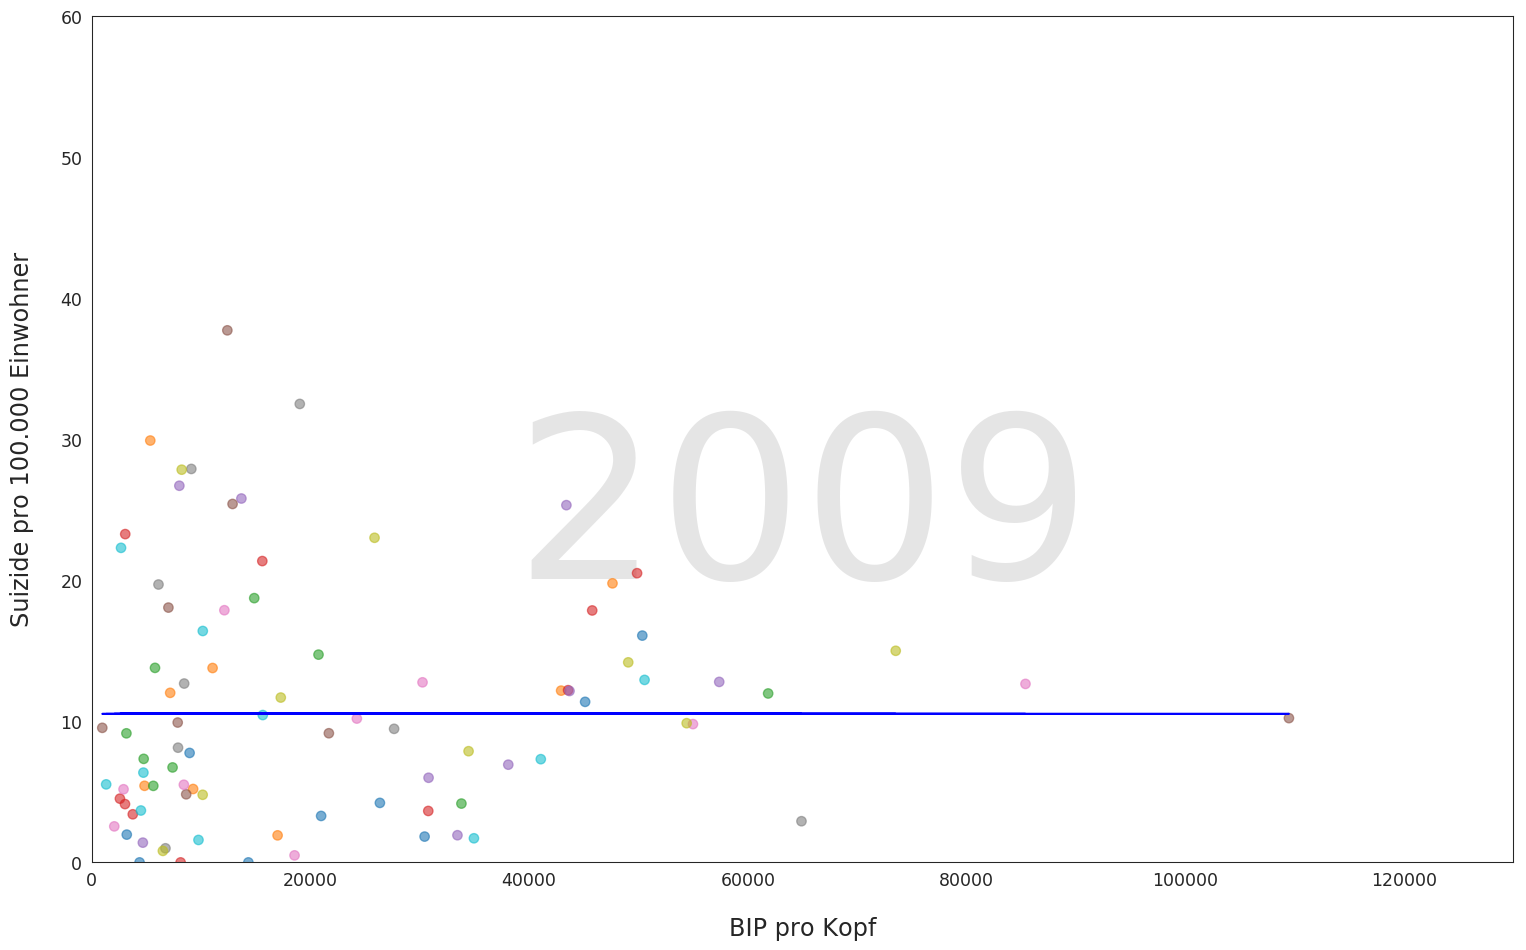

ß0: 10.231 ß1: 0.000
P-wert: 0.502 R2: 0.005


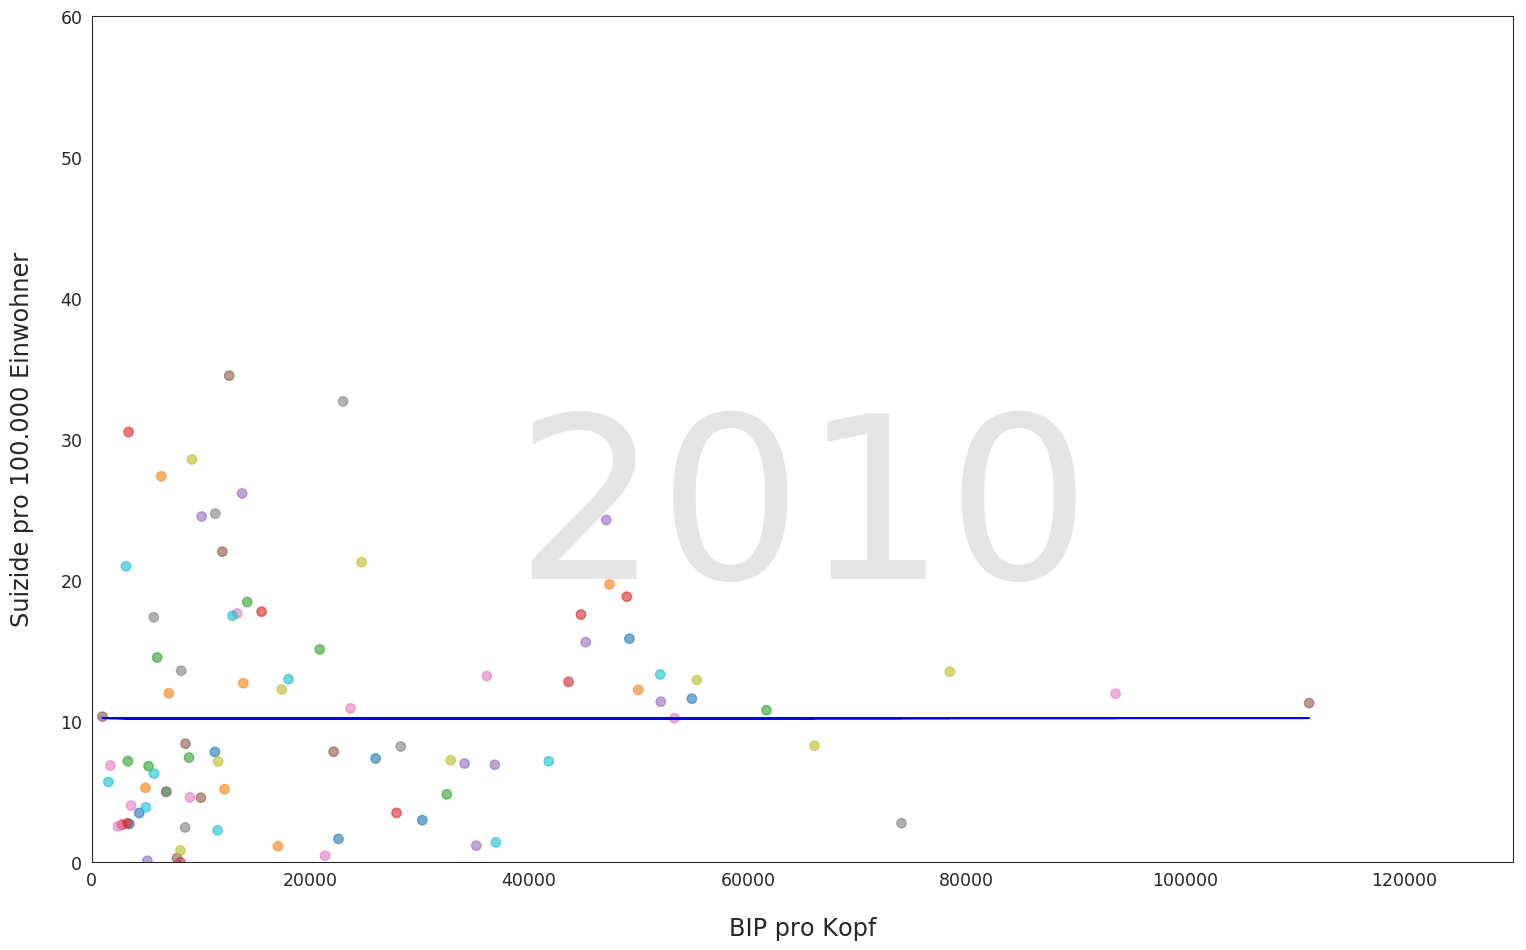

ß0: 9.977 ß1: 0.000
P-wert: 0.386 R2: 0.009


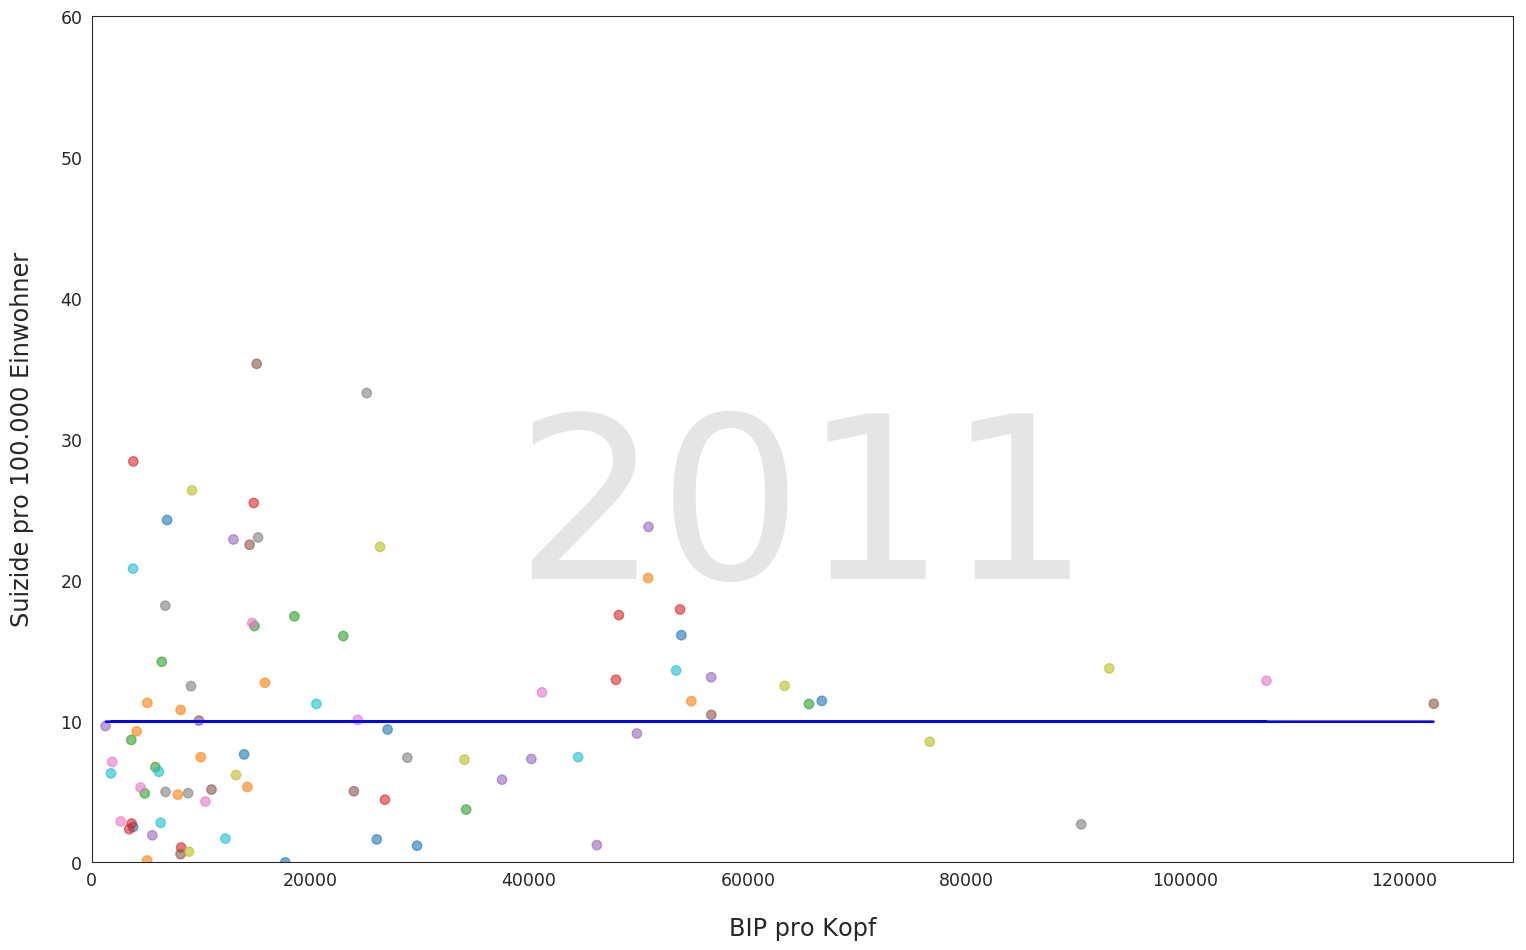

ß0: 10.681 ß1: 0.000
P-wert: 0.636 R2: 0.003


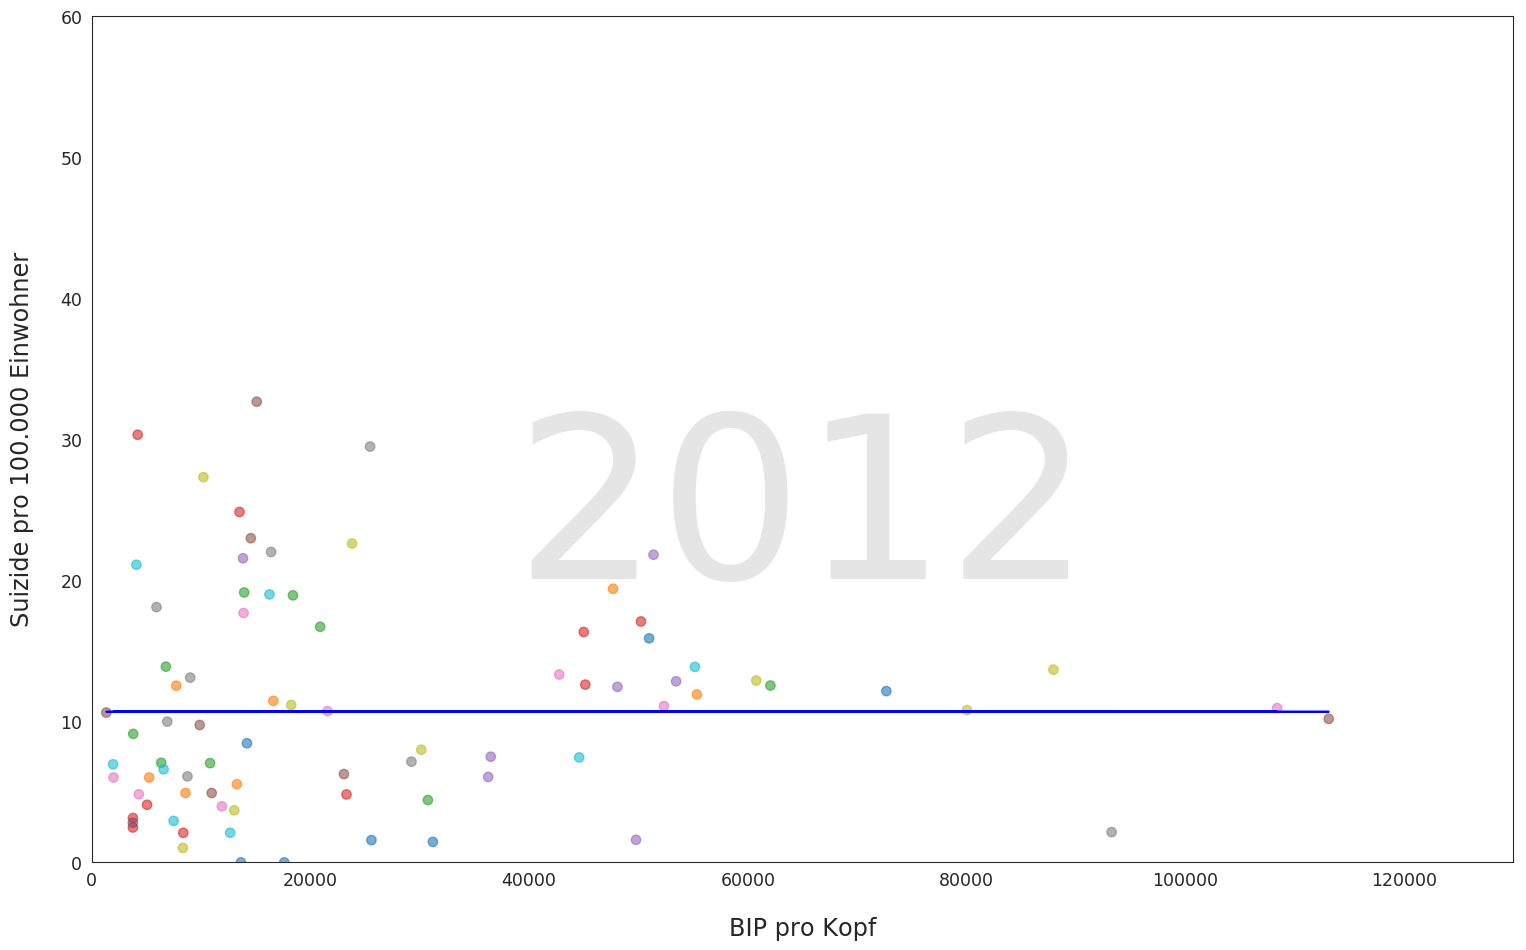

ß0: 10.502 ß1: 0.000
P-wert: 0.619 R2: 0.003


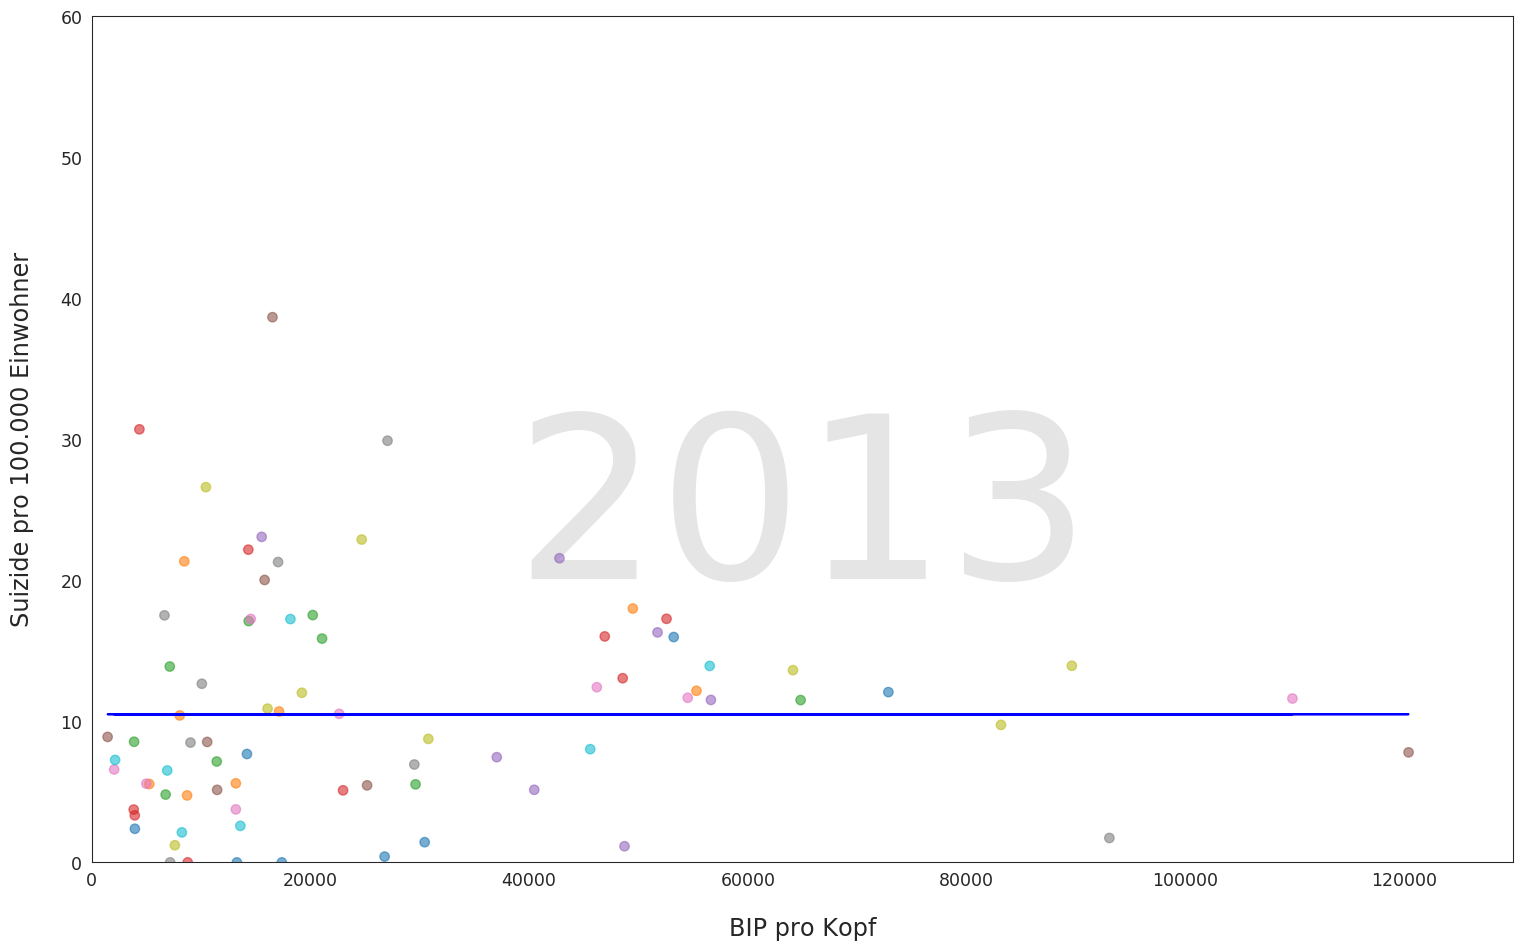

ß0: 9.865 ß1: 0.000
P-wert: 0.309 R2: 0.014


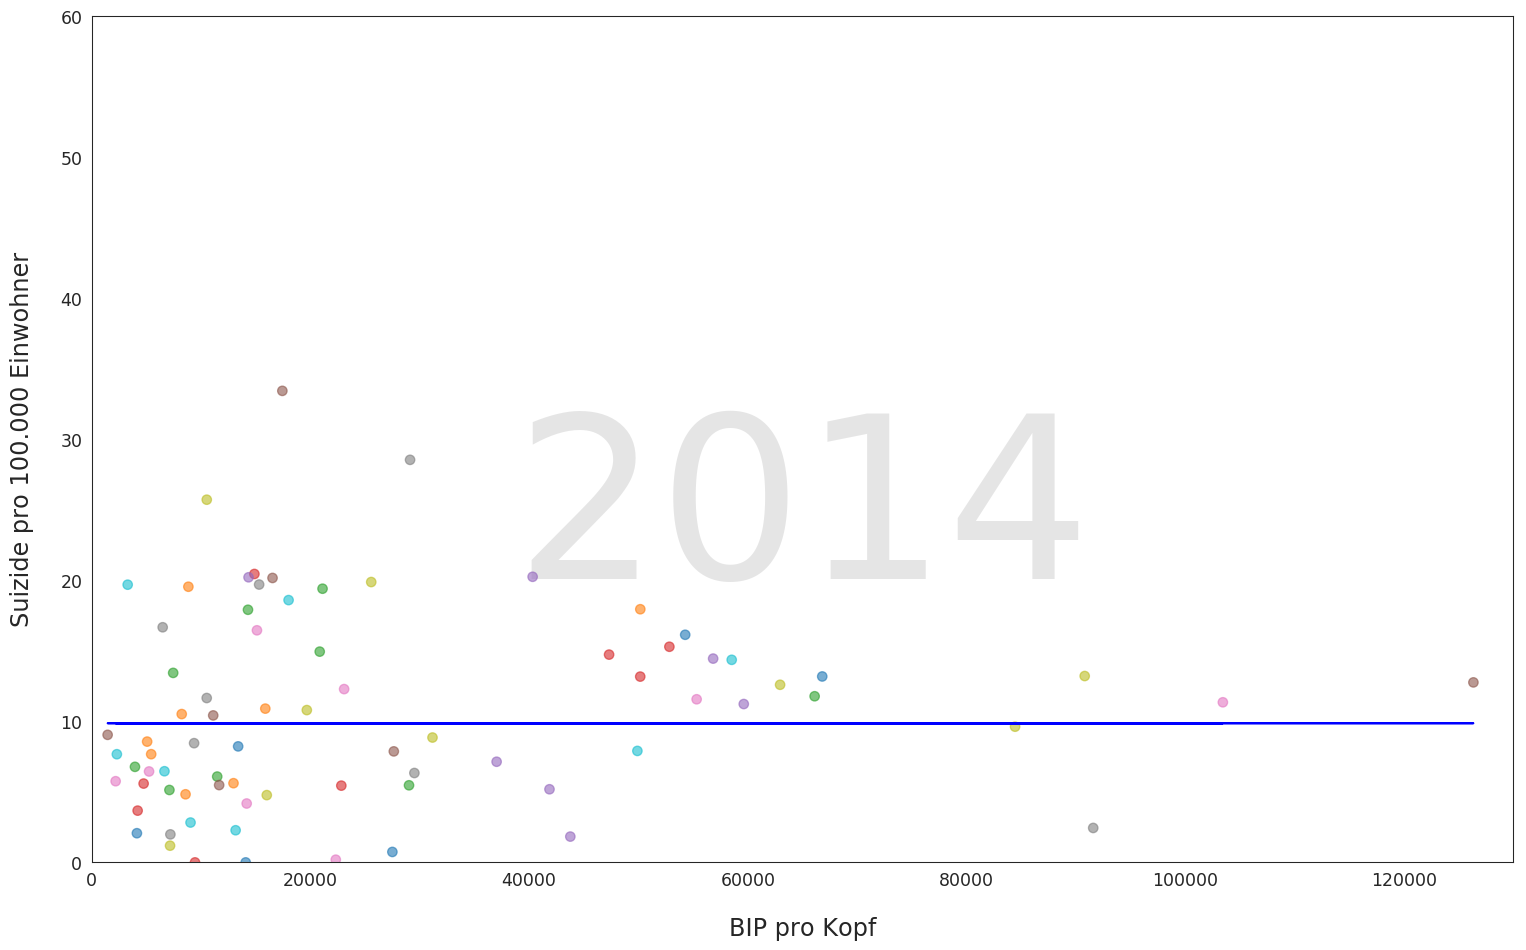

ß0: 9.908 ß1: 0.000
P-wert: 0.317 R2: 0.017


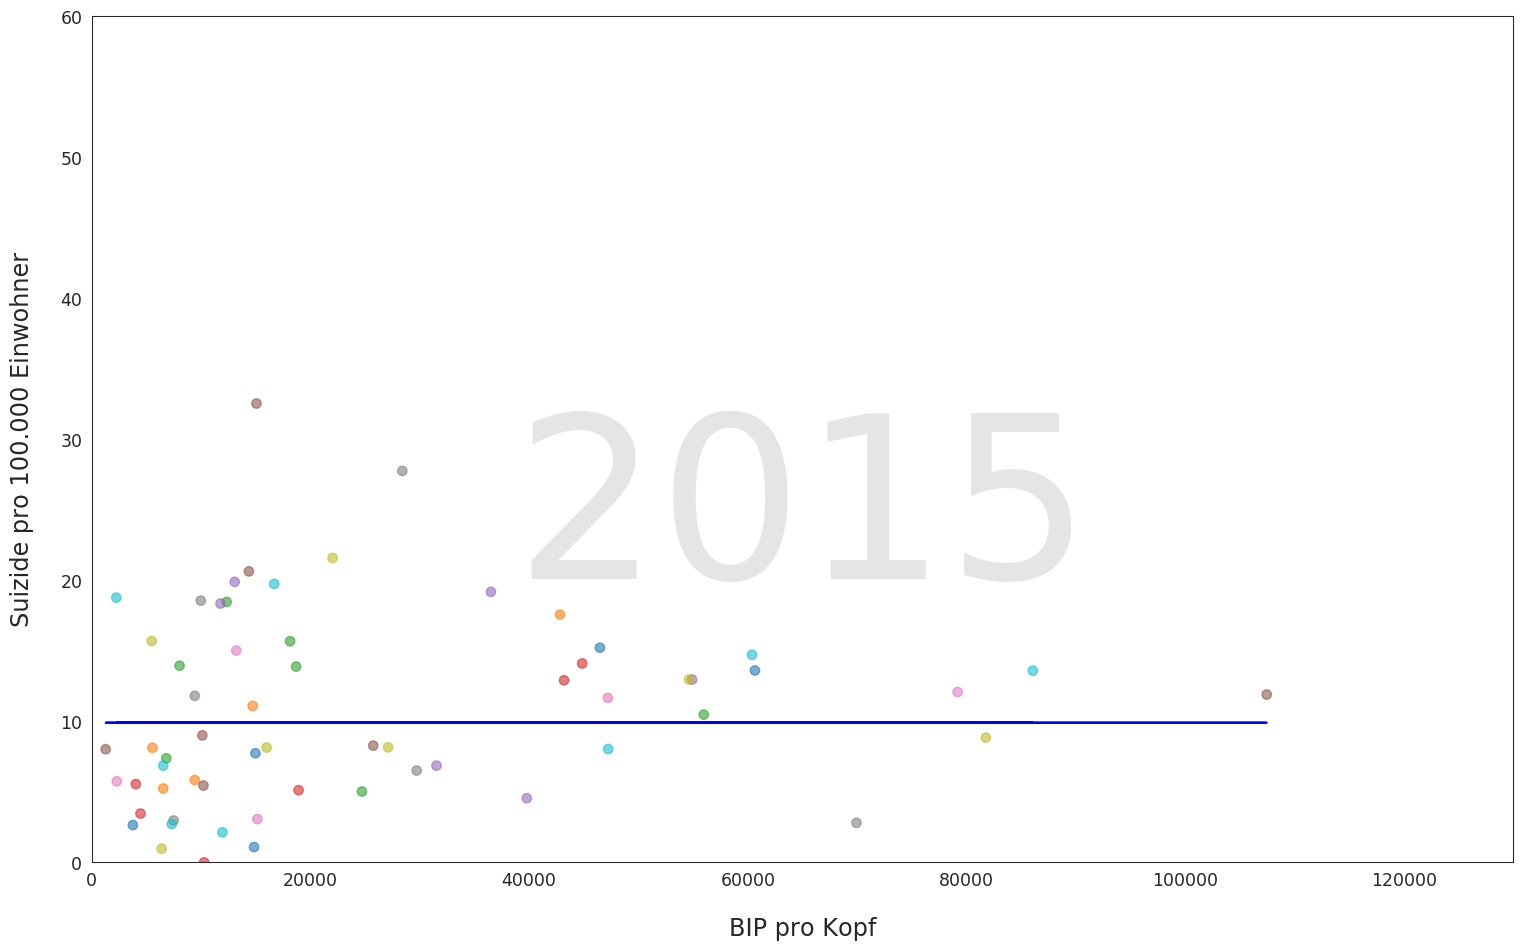

In [60]:
# libraries
import seaborn as sns
from scipy import stats

sns.set_style("white")
my_dpi=96 # 300

scatterplot_data['country']=pd.Categorical(scatterplot_data['country'])

# For each year:
for i in scatterplot_data.year.sort_values().unique():
    # initialize a figure
    fig = plt.figure(figsize=(16, 10), dpi=my_dpi)

    # Change color with c and alpha. I map the color to the X axis value.
    tmp=scatterplot_data[ scatterplot_data.year == i ]
    plt.scatter(tmp['gdp_per_capita ($)'], tmp['suicides/100k pop'], s=50 , c=tmp['country'].cat.codes, cmap="tab10", alpha=0.6)

    # Add titles (main and on axis)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("BIP pro Kopf", fontsize=18, labelpad=20)
    plt.ylabel("Suizide pro 100.000 Einwohner", fontsize=18, labelpad=20)
    plt.title(str(i), fontsize=170, y=0.4, zorder=-1, color="grey", alpha=0.2, verticalalignment="center")
    plt.xlim(0, 130000)
    plt.ylim(0, 60)
    
    #plt.plot(tmp['gdp_per_capita ($)'], np.poly1d(np.polyfit(tmp['gdp_per_capita ($)'], tmp['suicides/100k pop'], 1))(tmp['gdp_per_capita ($)']))
    slope, intercept, r_value, p_value, std_err = stats.linregress(tmp['gdp_per_capita ($)'], tmp['suicides/100k pop'])
    line = slope*tmp['suicides/100k pop']+intercept
    print("ß0: {:.3f}".format(intercept),"ß1: {:.3f}".format(slope))
    print("P-wert: {:.3f}".format(p_value), "R2: {:.3f}".format(r_value**2))

    plt.plot(tmp['gdp_per_capita ($)'], line, color='blue')

    # Save it
    filename='images/Gapminder_step'+str(i)+'.png'
    plt.tight_layout()
    #plt.savefig(filename, dpi=my_dpi)    
    plt.show()


In [61]:
## Konvertierte die Bilder in ein Video, wobei delay = 40, und quality = 100 (max): Funktioniert nicht gut
# convert -delay 40 -quality 100 Gapminder*.png scatterplot-bip-und-suizidraten.mpeg
## Konvertiere in GIF
# convert -delay 40 -quality 100 Gapminder*.png out.gif
# convert -delay 40 -loop 1 -quality 100 Gapminder*.png scatterplot-bip-und-suizidraten.gif
## Da Videos mit imagemagick nicht so gut funktioniert, nutze diesen Befehl aus https://stackoverflow.com/a/37478183/6072503
# ffmpeg -framerate 3/2 -pattern_type glob -i '*.png' -c:v libx264 -r 30 -pix_fmt yuv420p scatterplot-bip-und-suizidraten.mp4
## für AVI Format https://stackoverflow.com/a/4841042/6072503
# ffmpeg -framerate 3/2 -pattern_type glob -i '*.png' -c:v ffv1 -qscale:v 0 scatterplot-bip-und-suizidraten.avi


In [62]:
## Die Bilder auf GWDG archivieren
# tar -czvf img.tar.gz images